In [105]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
np.random.seed(42)

In [108]:
nfl = pd.read_csv('/content/drive/MyDrive/DS Mentorship/NFL.csv')
nfl.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485675  0.060758       NaN       NaN    2009  
1      0.551088      0.448912  0.546433  0.004655 -0.032244  0.036899    2009  
2      0.510793      0.489207  0.551088 -0.040295       NaN       NaN    2009  
3      0.461217      0.538783  0.510793 -0.049576  0.106663 -0.156239    2009  
4      0.558929      0.441071  0.461217  0.097712       NaN       NaN    2009  

[5 rows x 102 columns]

In [109]:
# sweetviz version 2.1.3
!pip install sweetviz

In [110]:
import sweetviz as sv

In [111]:
#report = sv.analyze(nfl)
#report

In [112]:
#report.show_html()

In [113]:
!ls '/content/drive/MyDrive/DS Mentorship/SWEETVIZ_REPORT.html'

'/content/drive/MyDrive/DS Mentorship/SWEETVIZ_REPORT.html'


In [114]:
from IPython.display import display , HTML


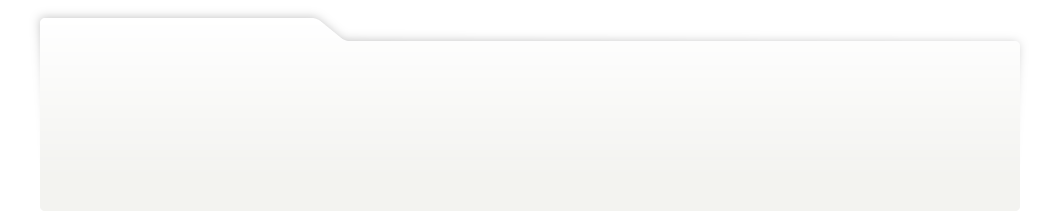
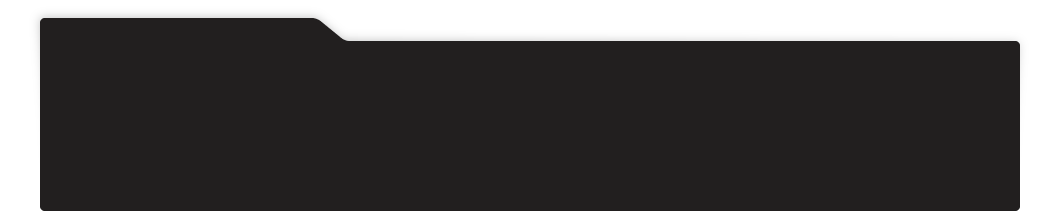
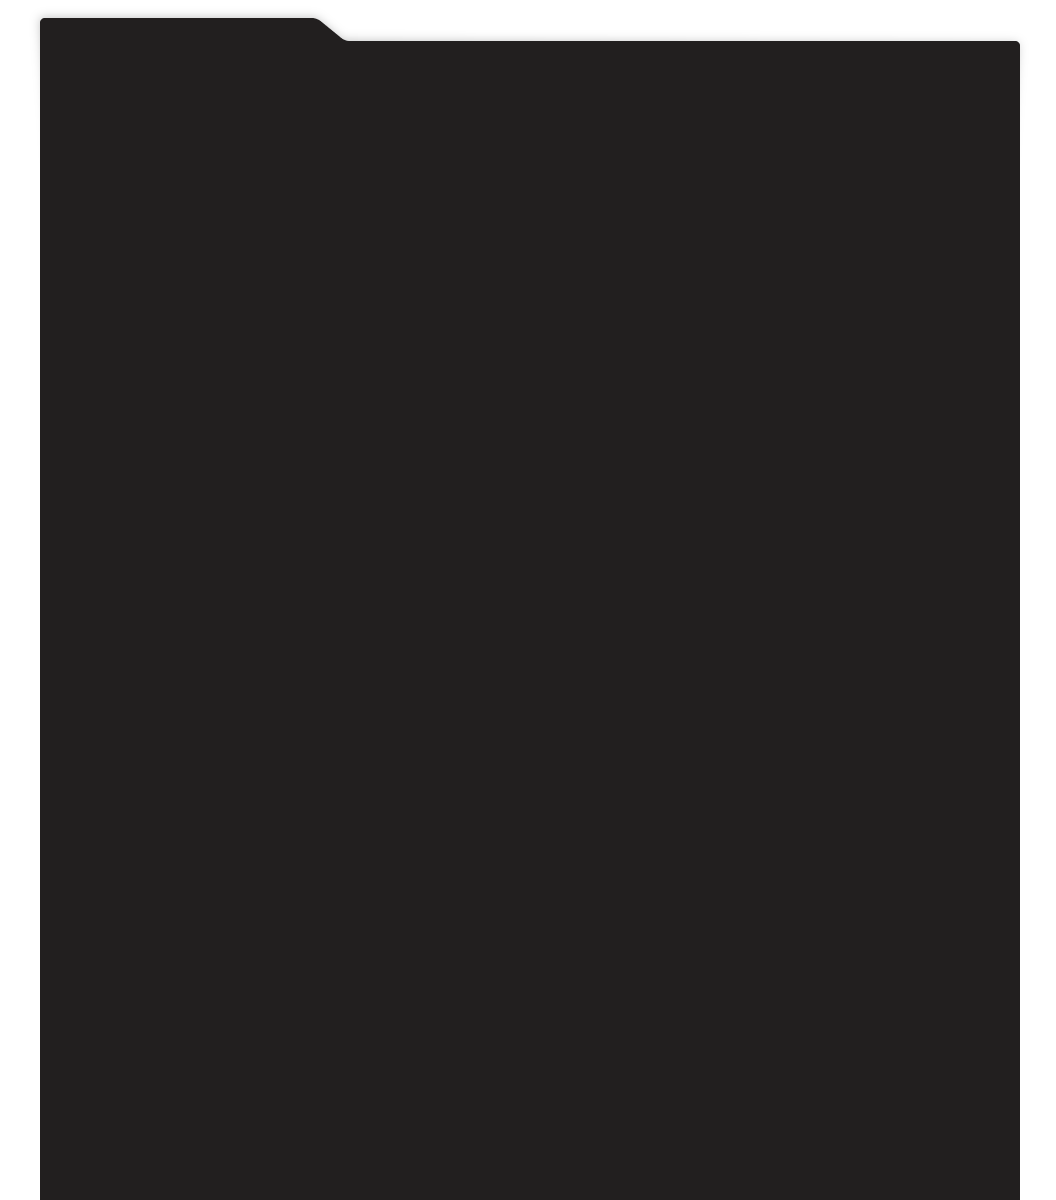
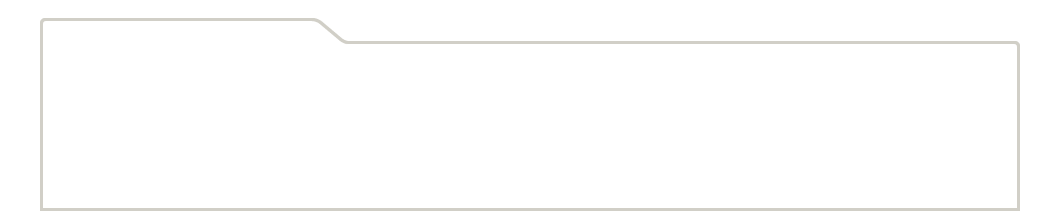
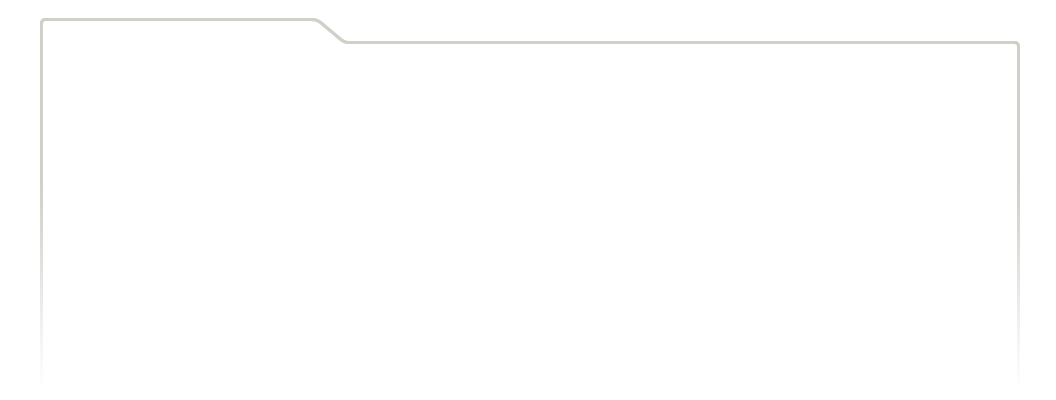
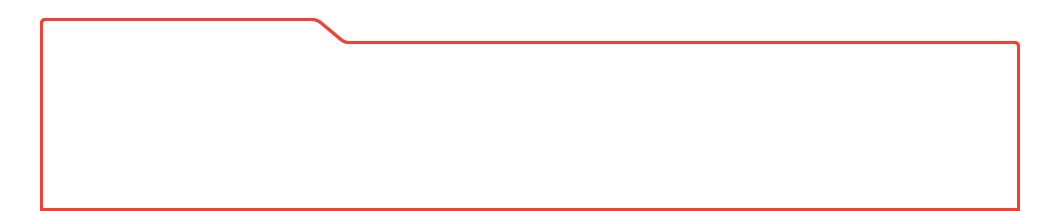
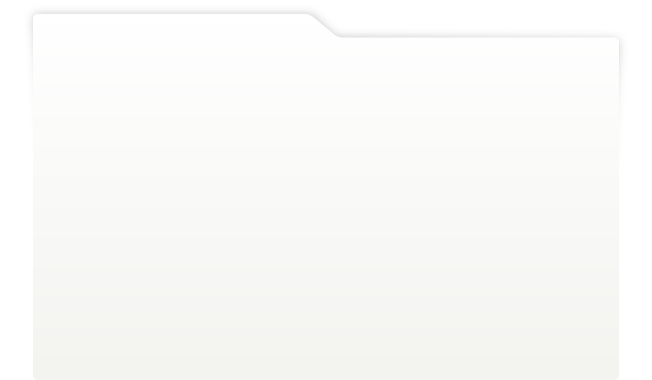
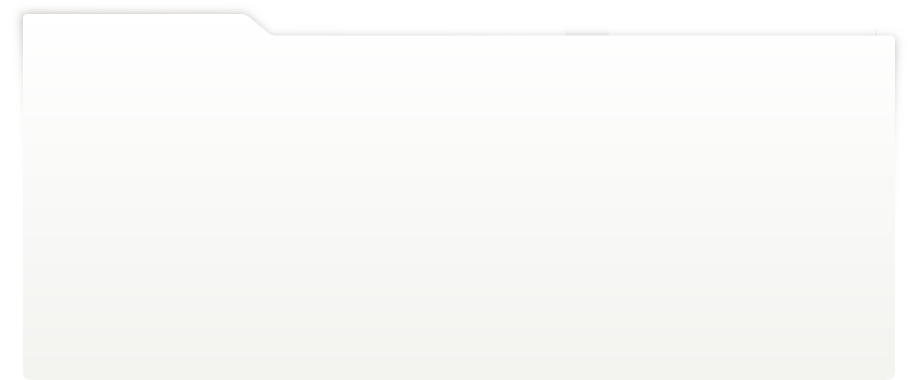
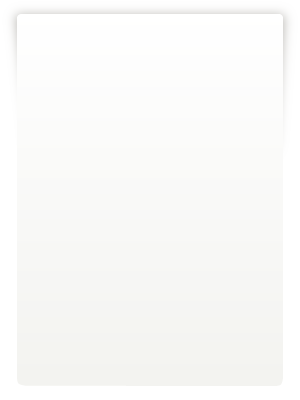
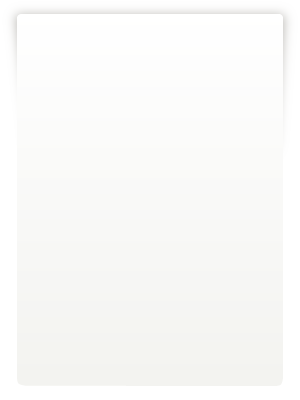
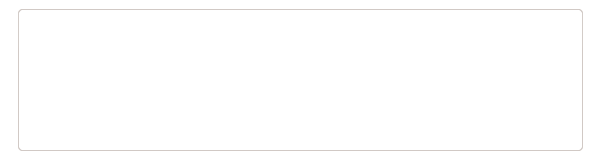
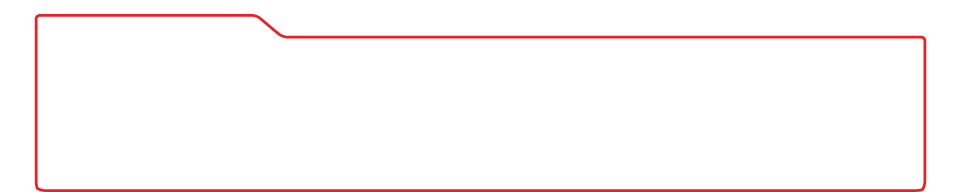
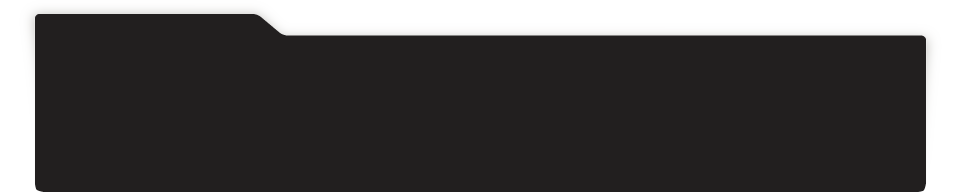
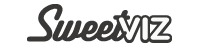
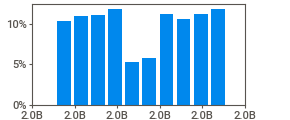
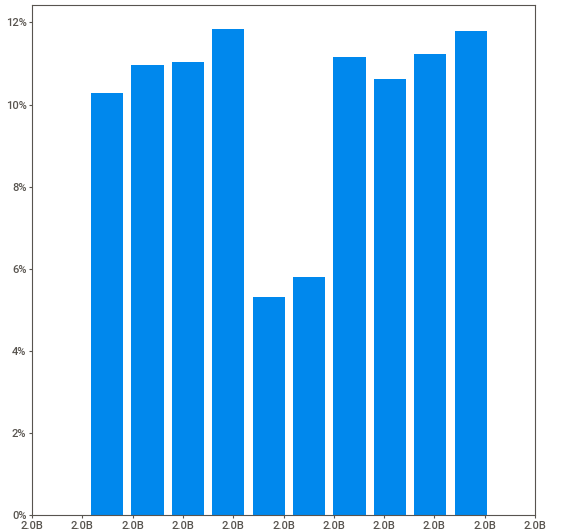
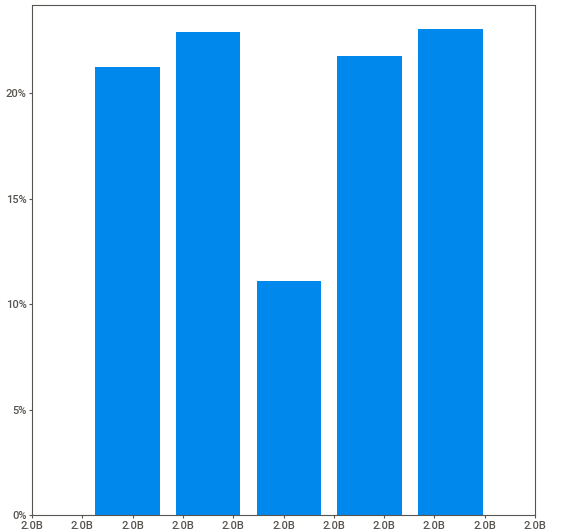
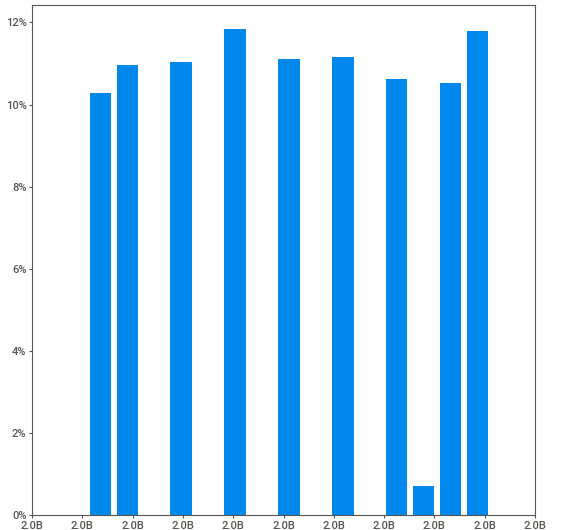
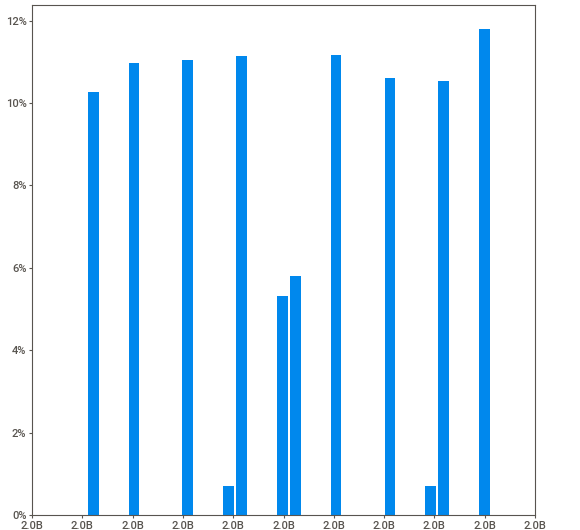
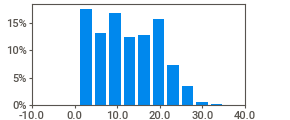
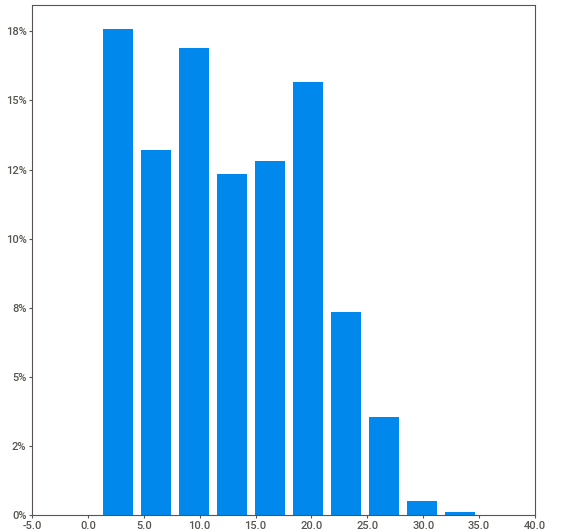
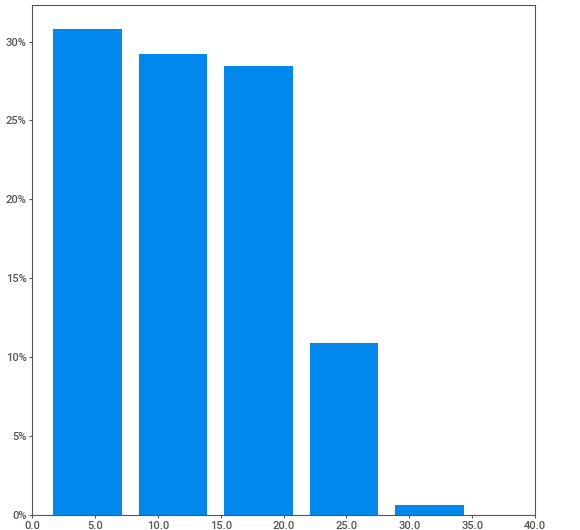
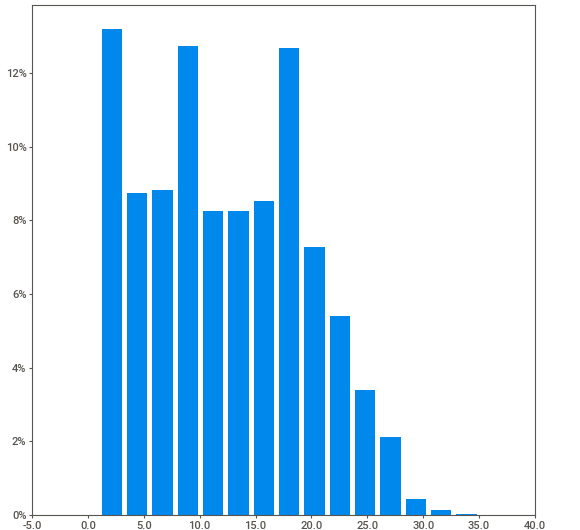
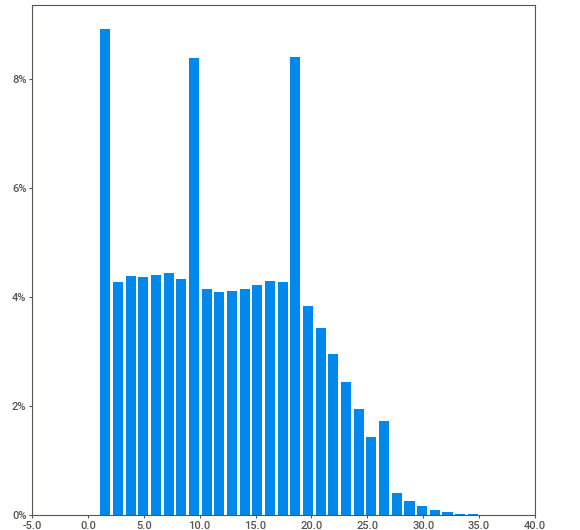
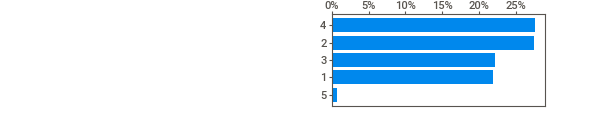
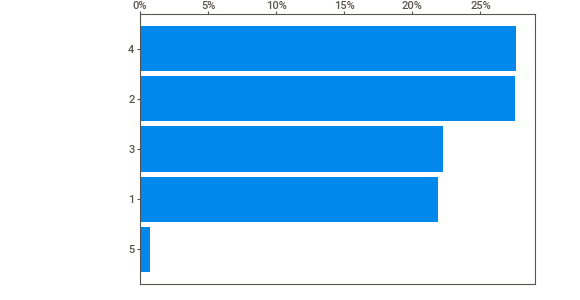
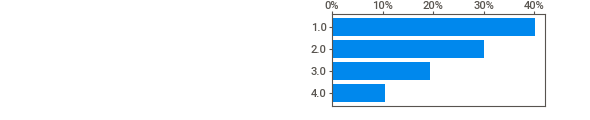
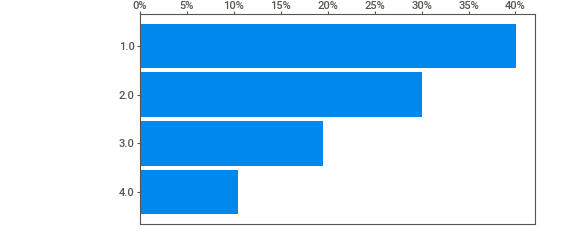
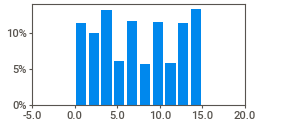
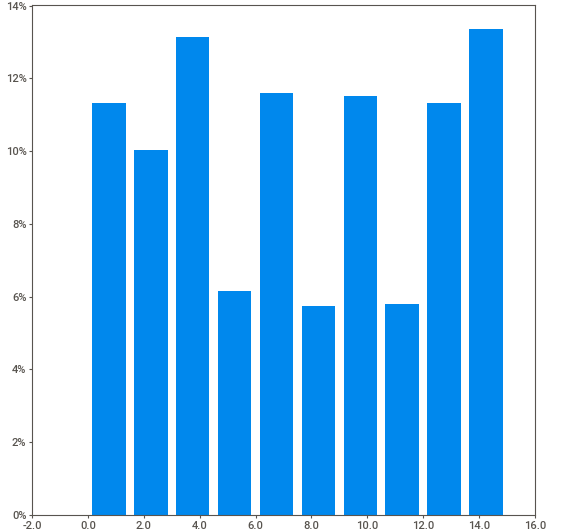
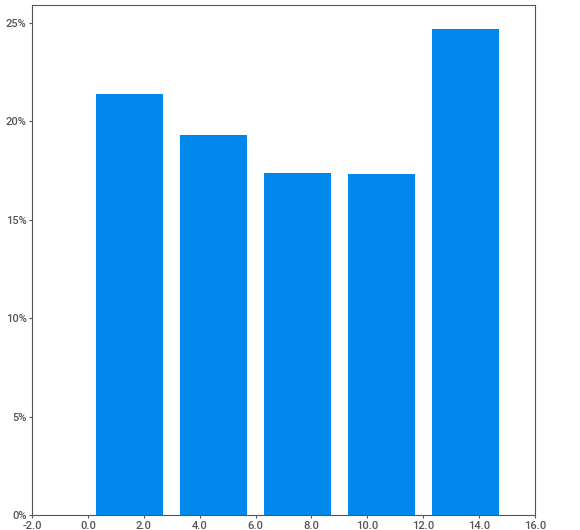
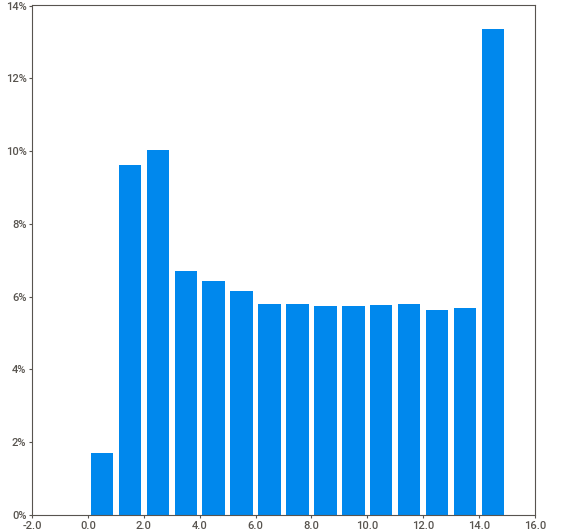
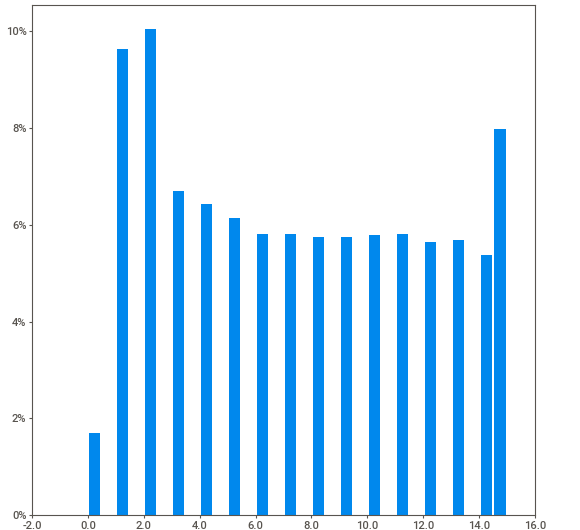
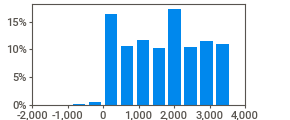
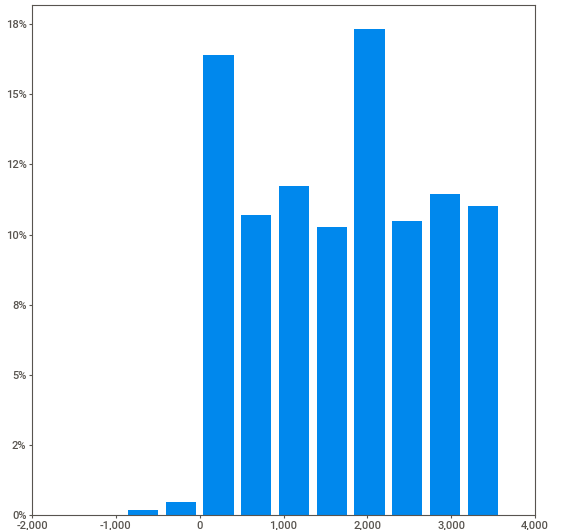
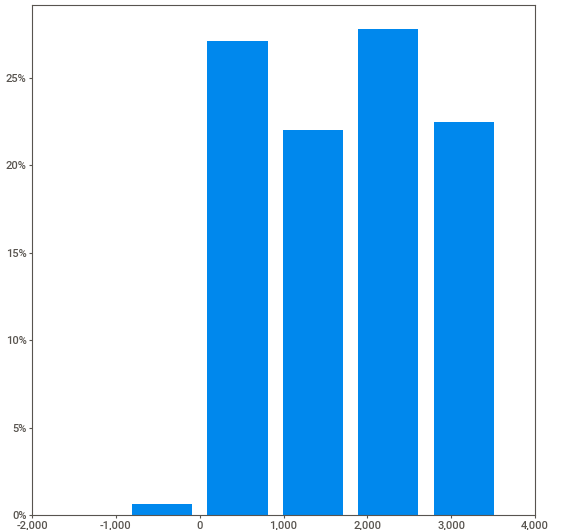
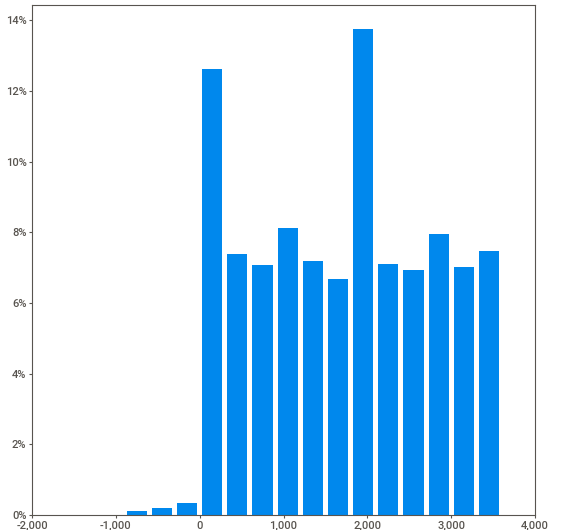
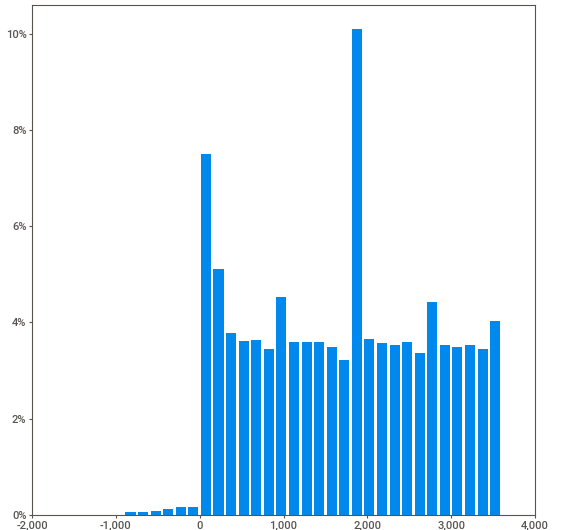
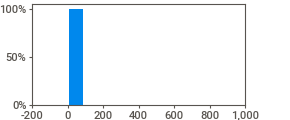
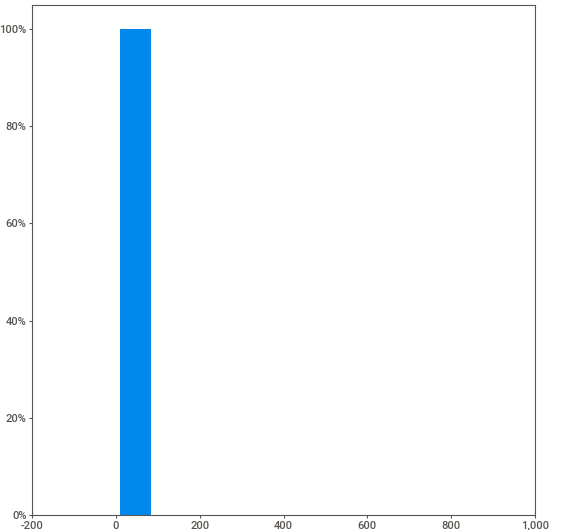
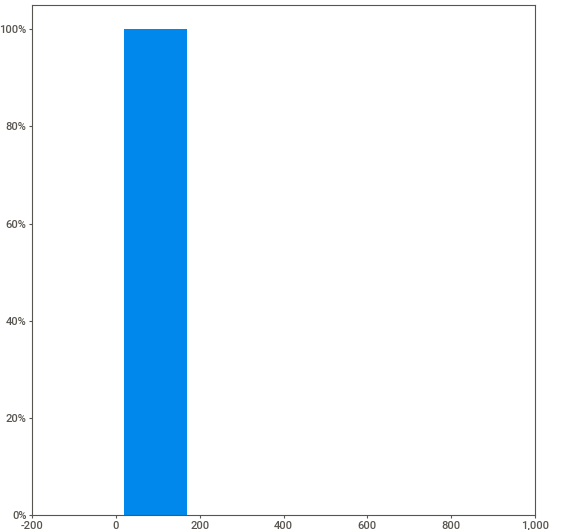
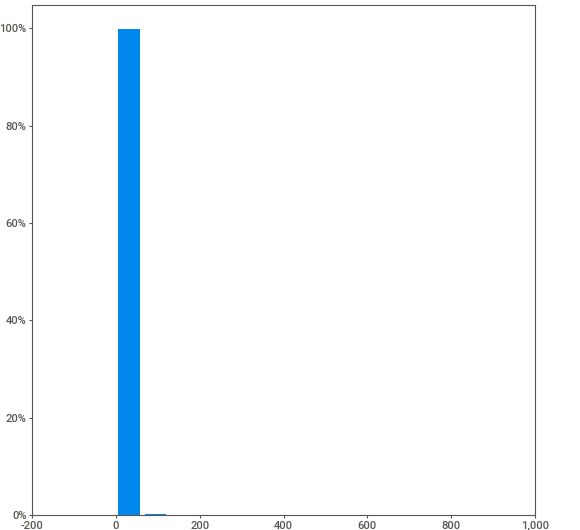
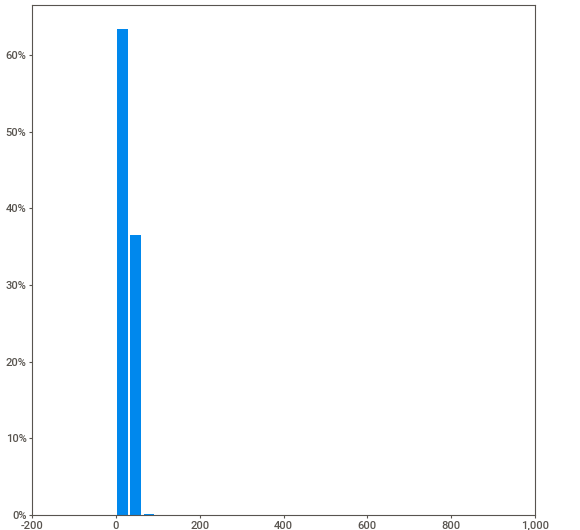
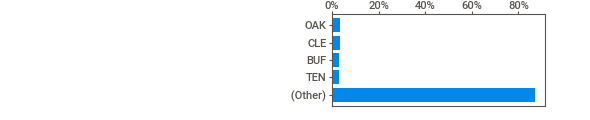
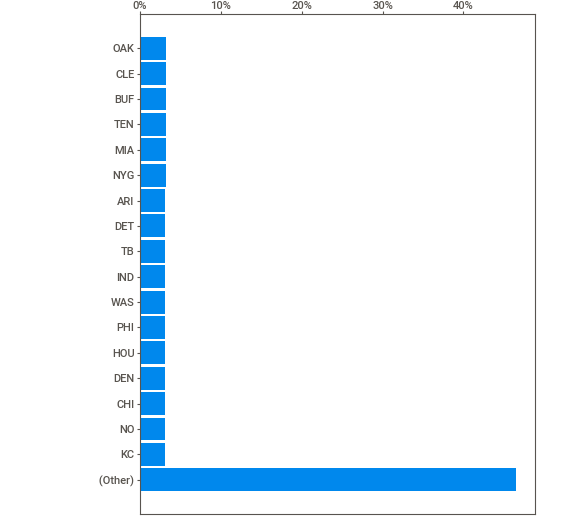
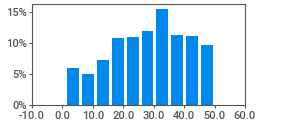
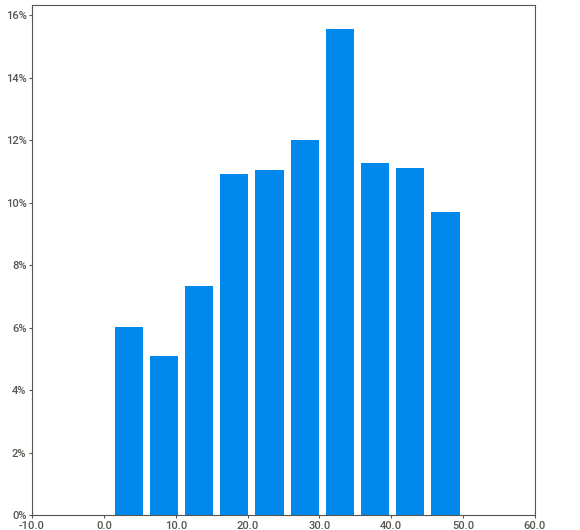
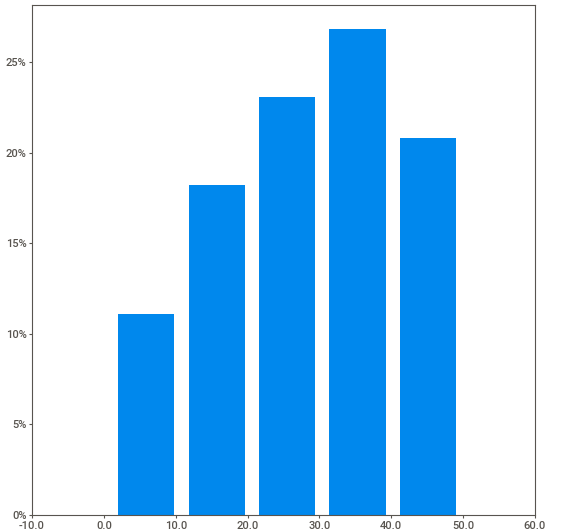
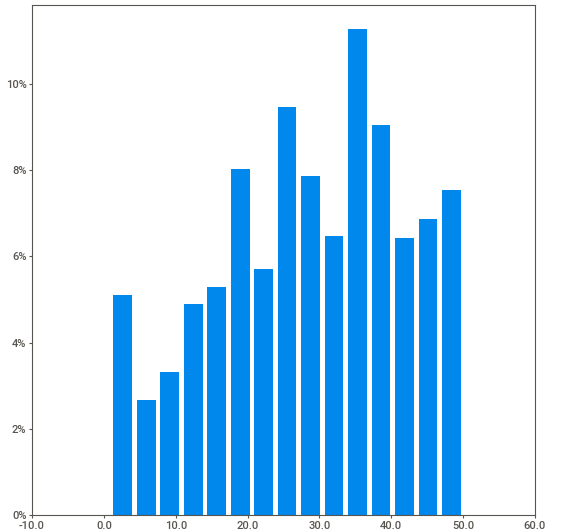
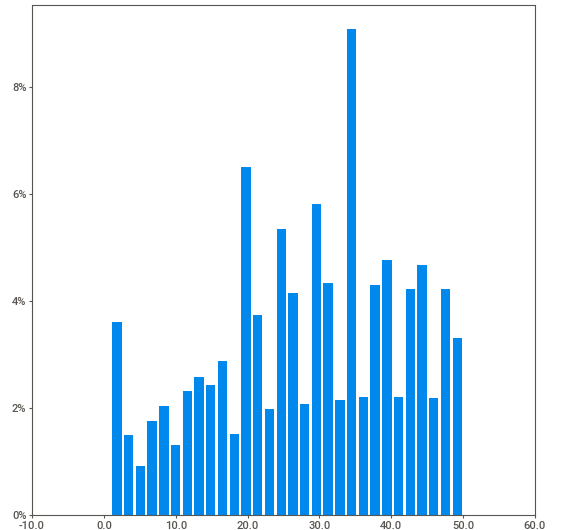
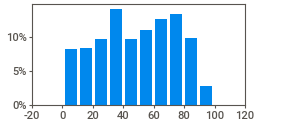
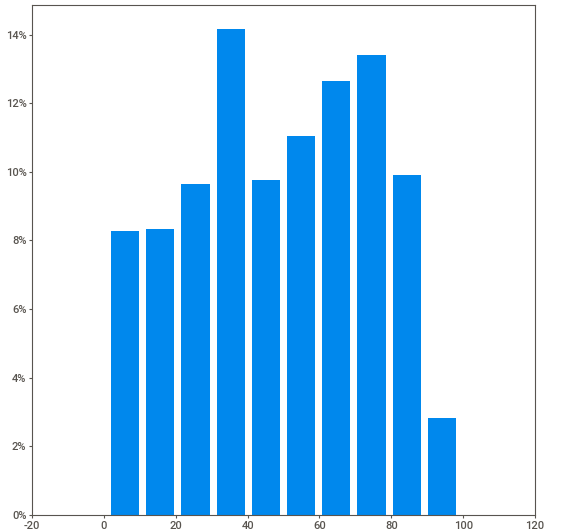
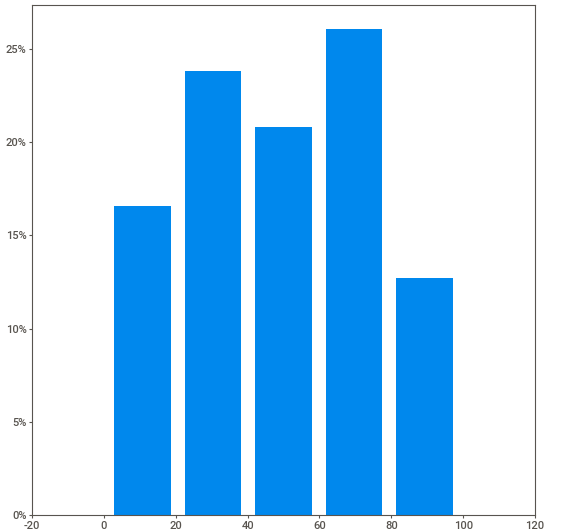
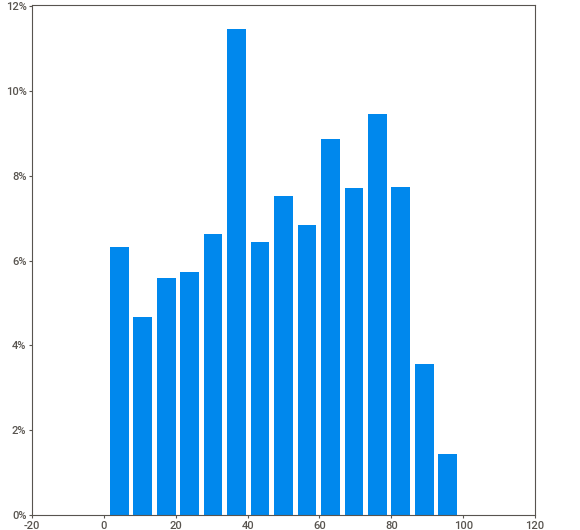
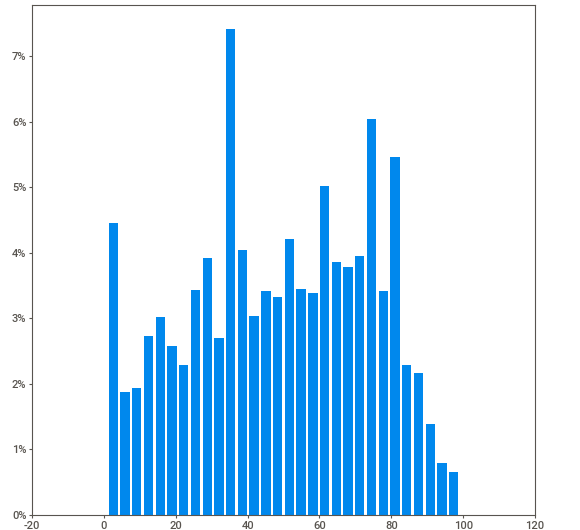
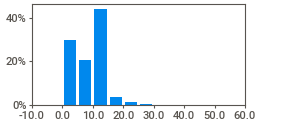
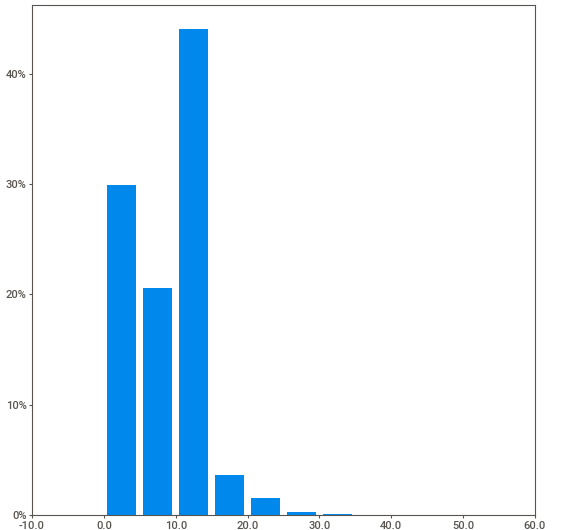
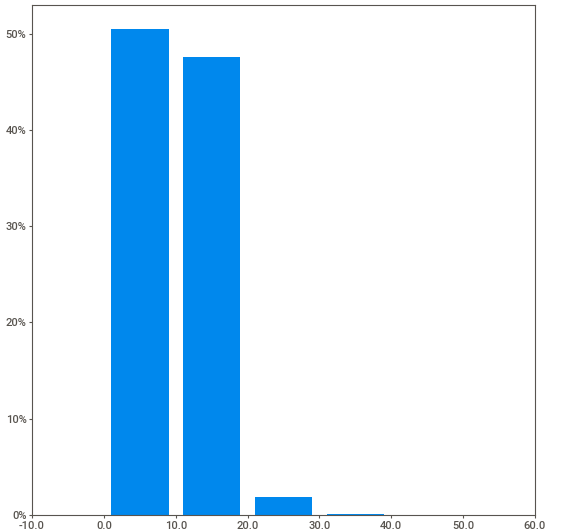
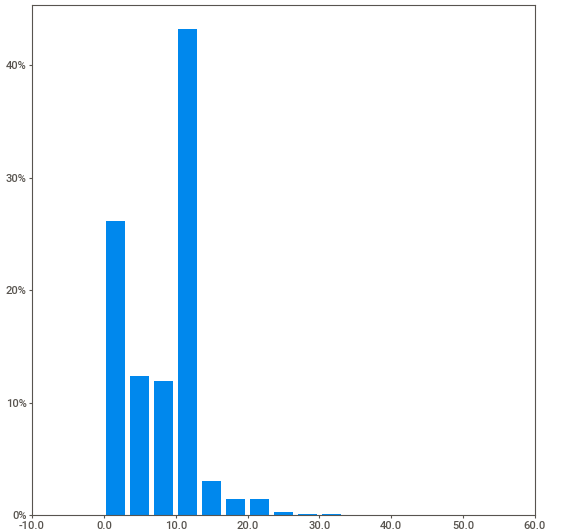
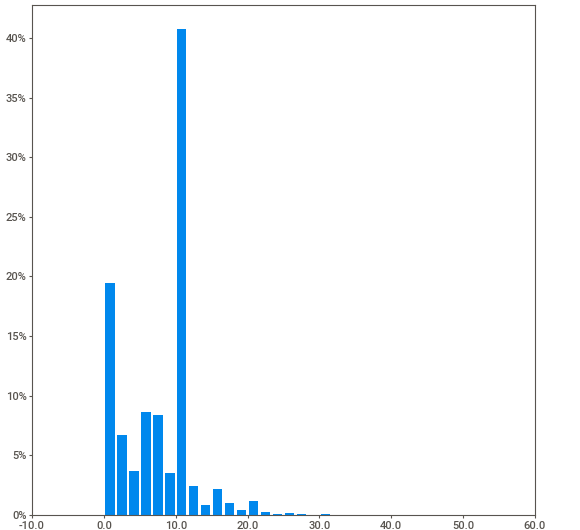
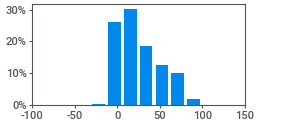
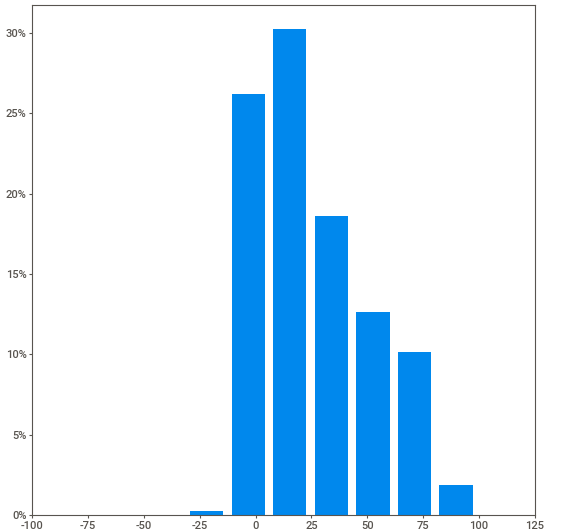
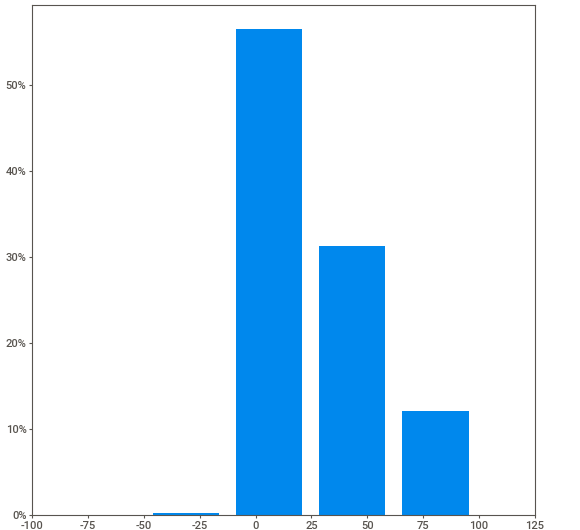
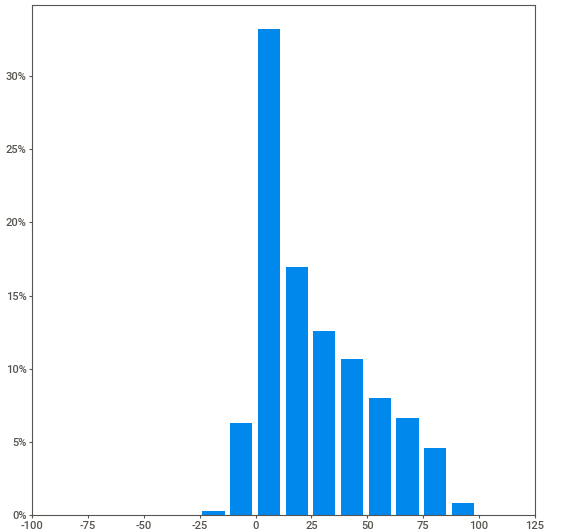
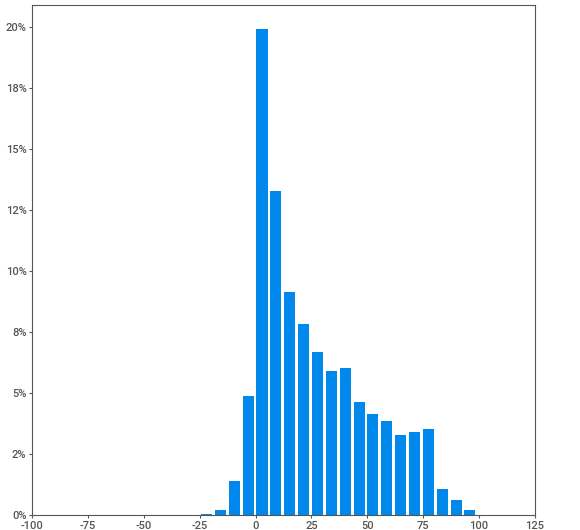
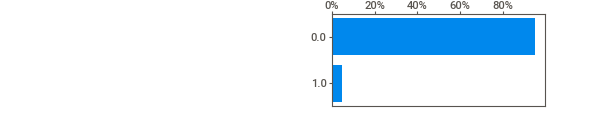
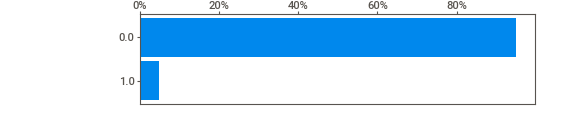
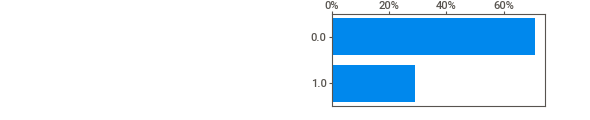
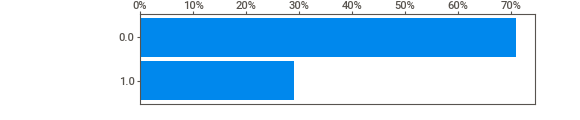
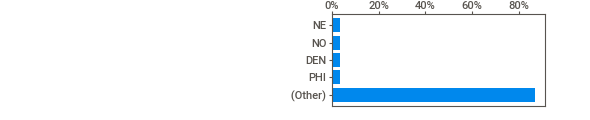
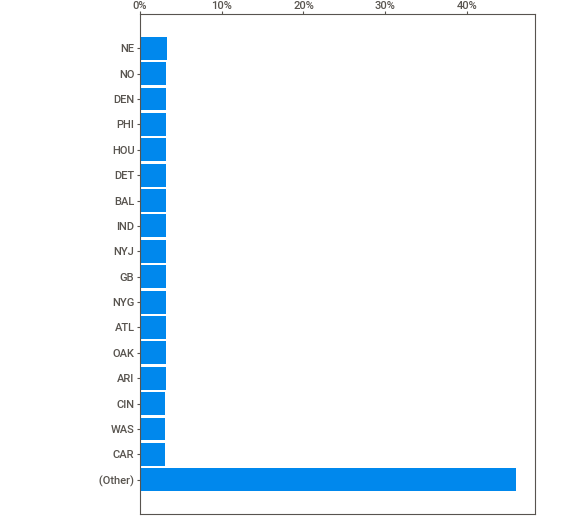
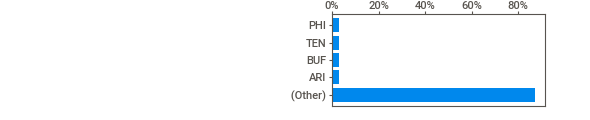
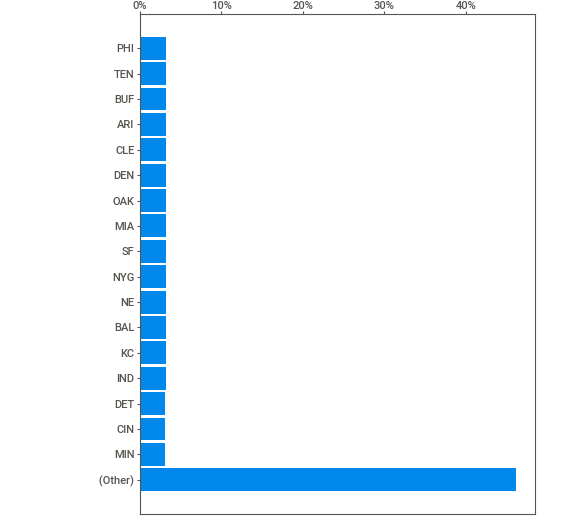
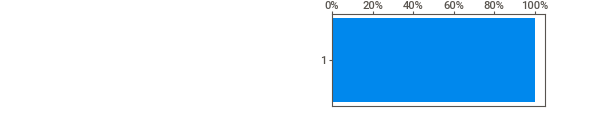
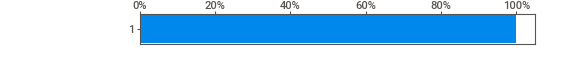
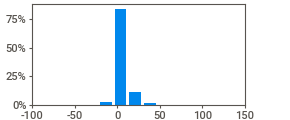
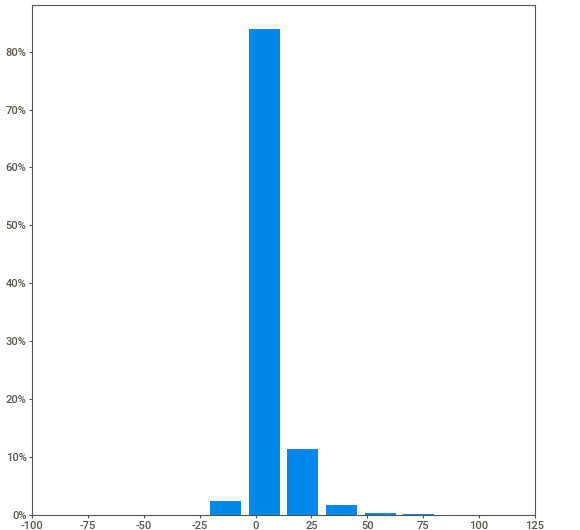
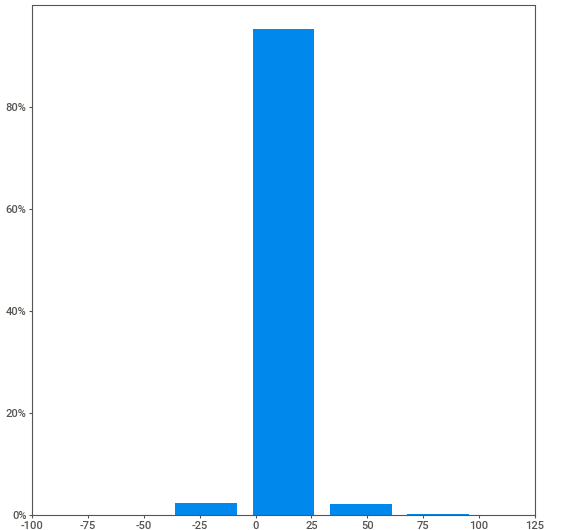
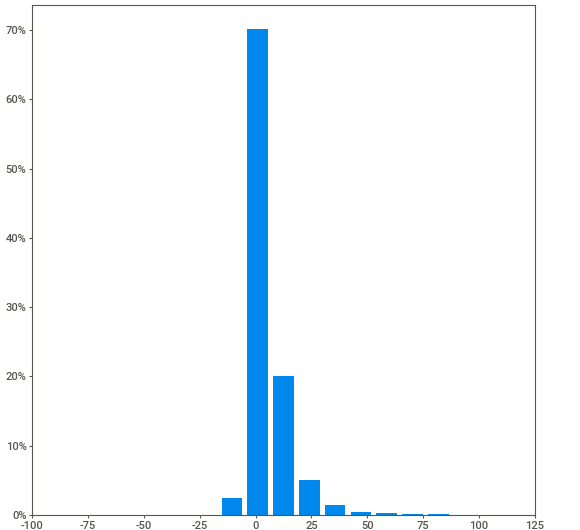
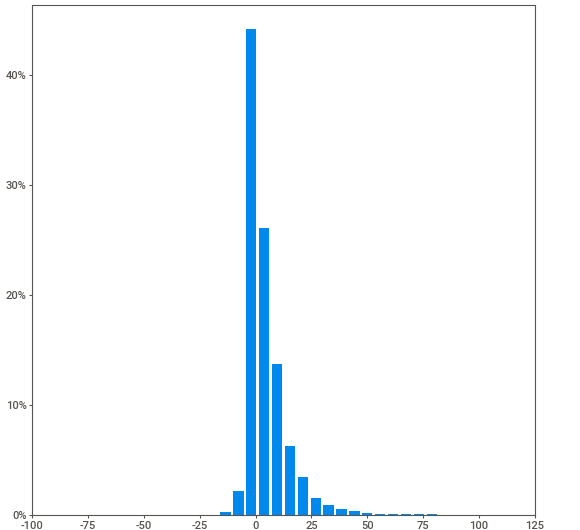
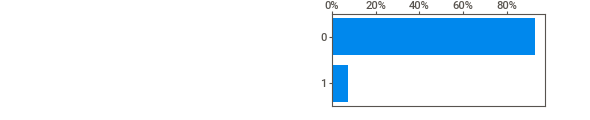
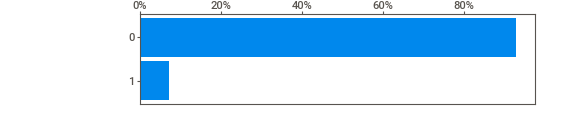
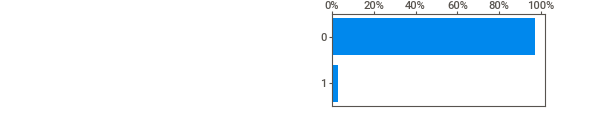
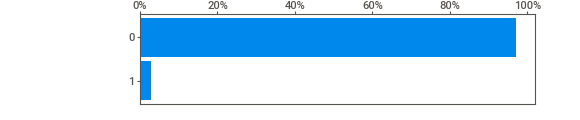
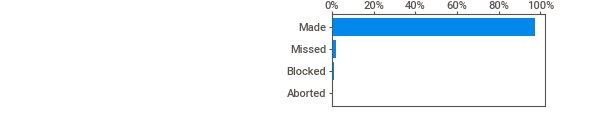
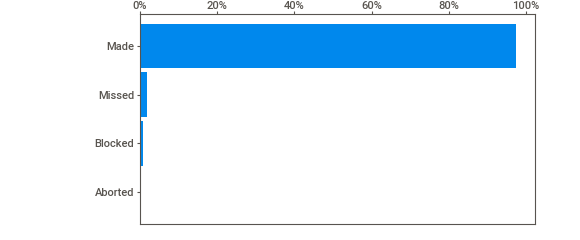
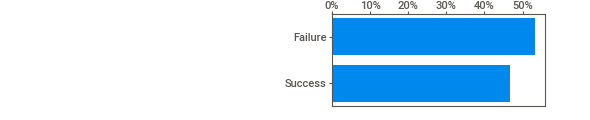
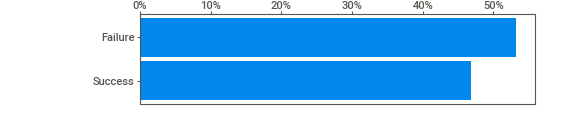
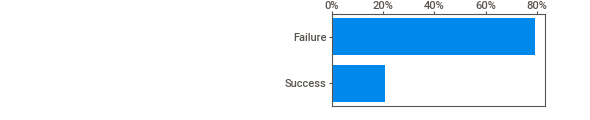
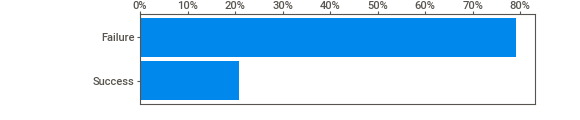
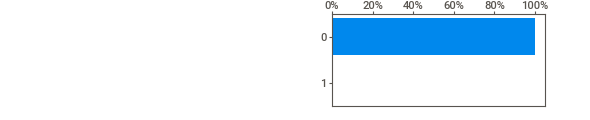
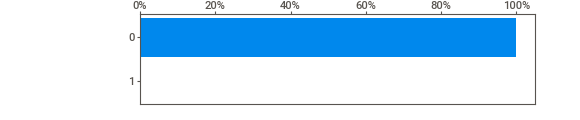
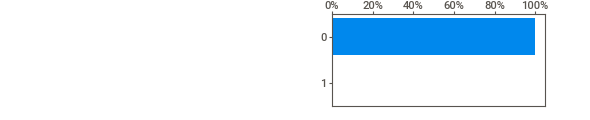
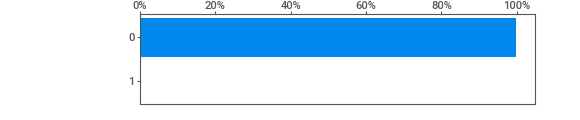
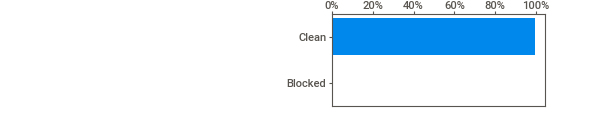
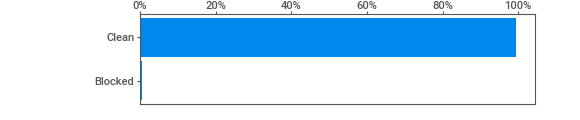
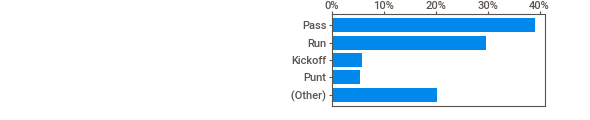
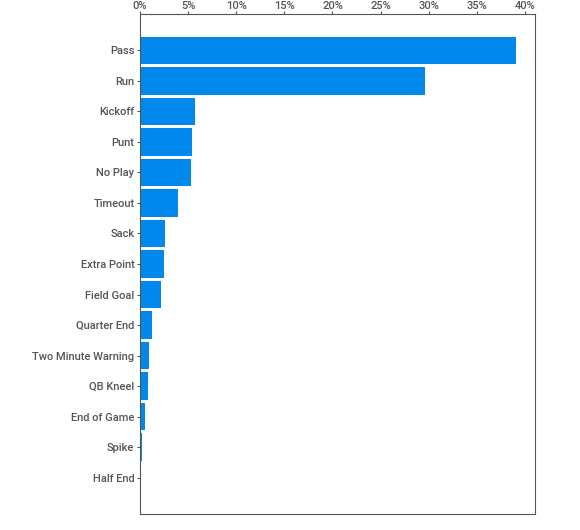
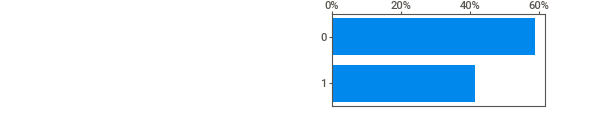
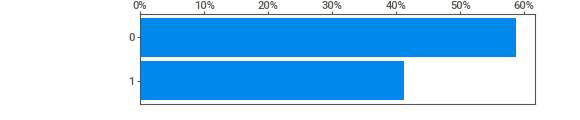
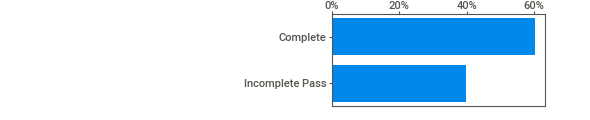
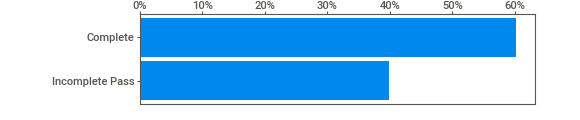
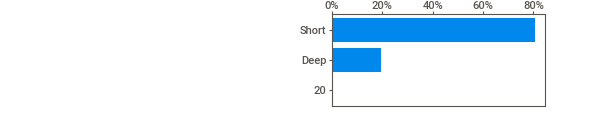
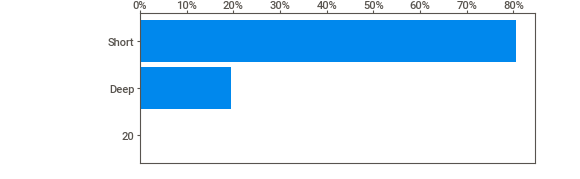
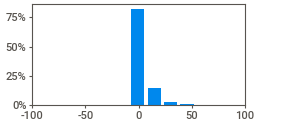
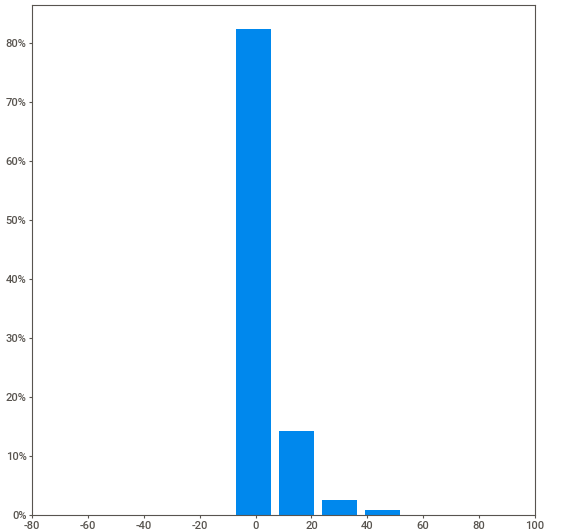
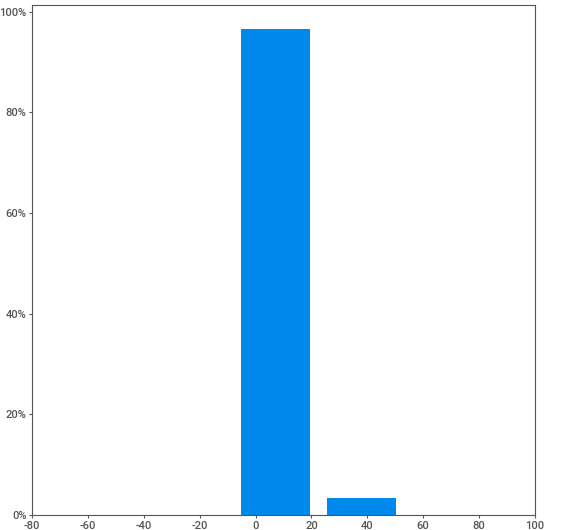
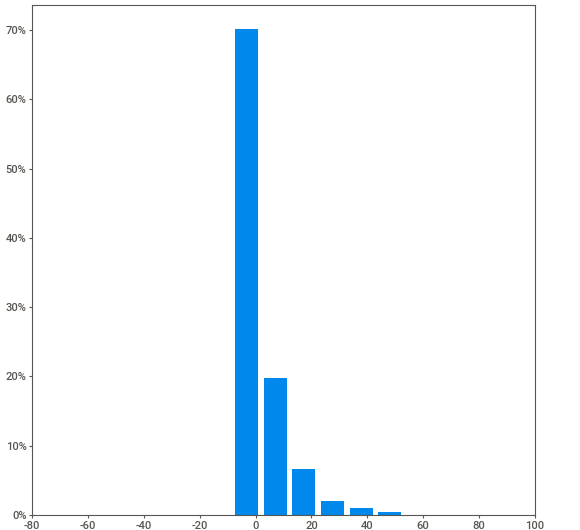
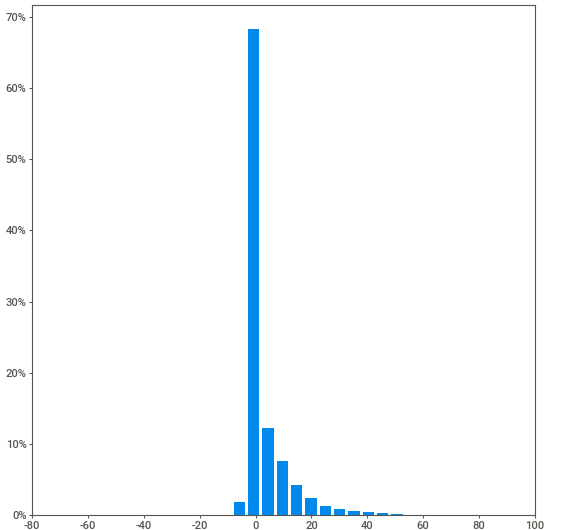
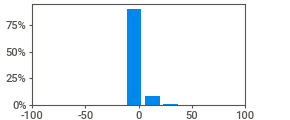
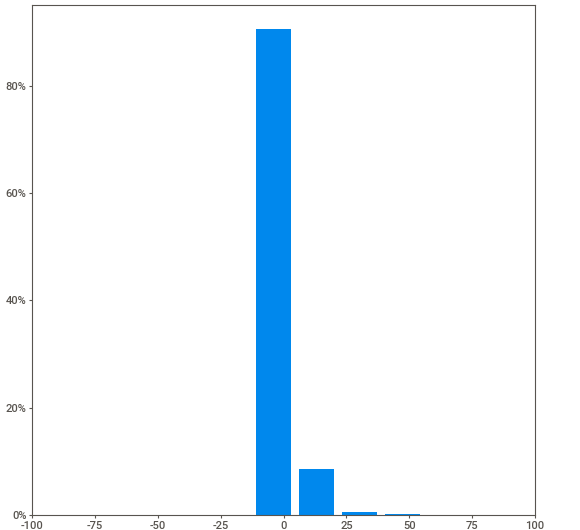
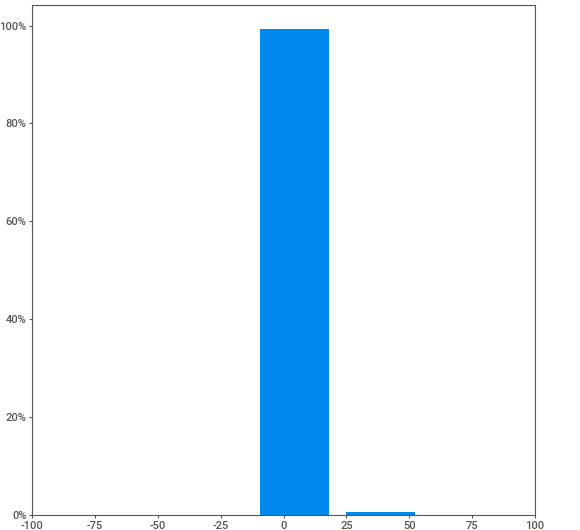
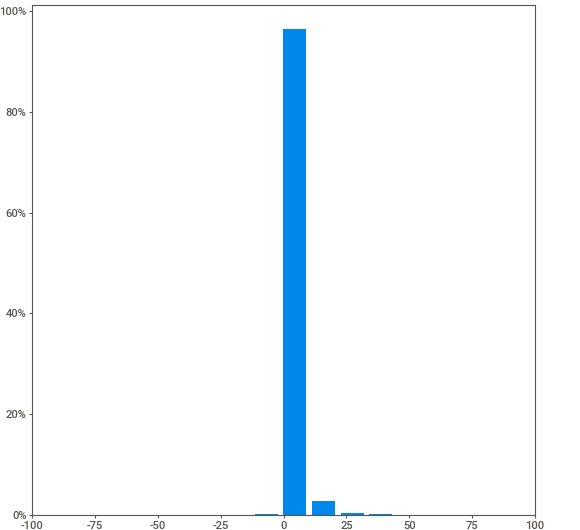
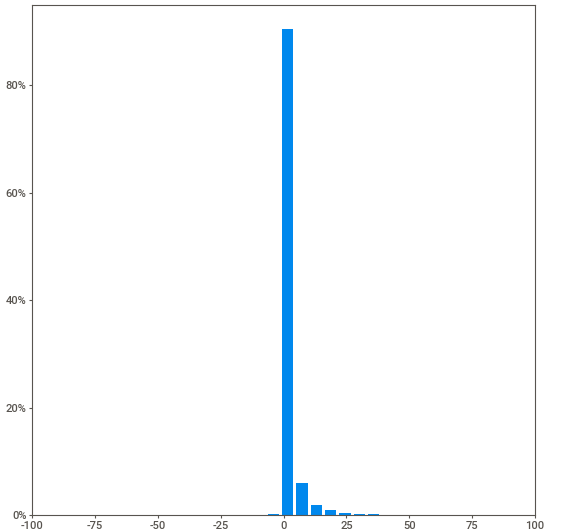
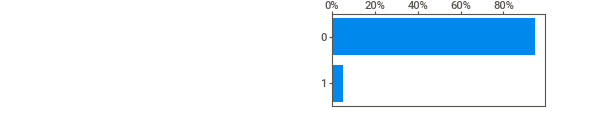
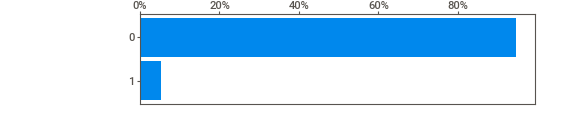
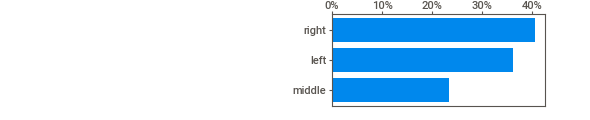
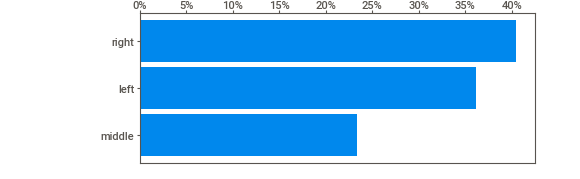
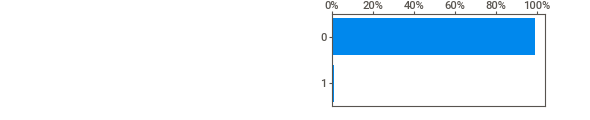
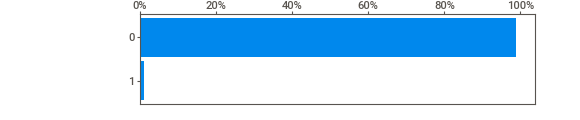
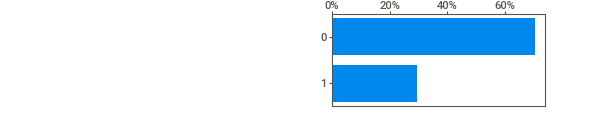
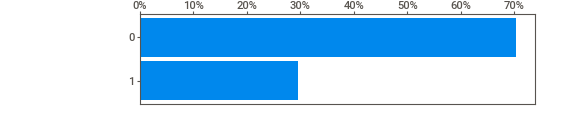
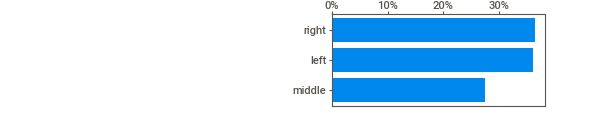
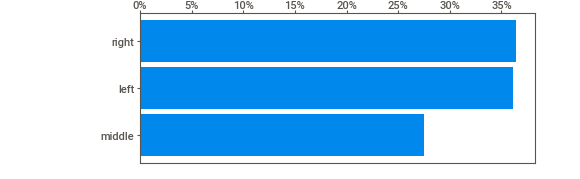
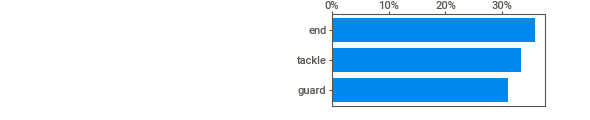
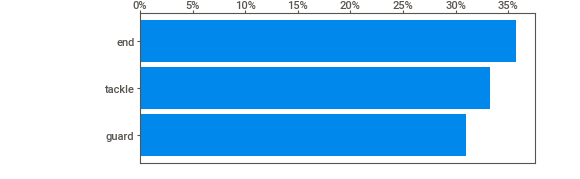
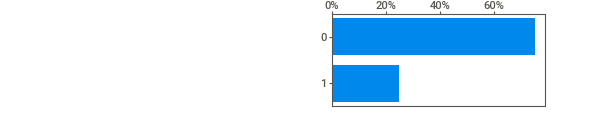
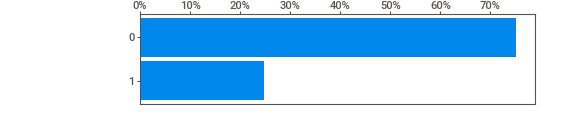
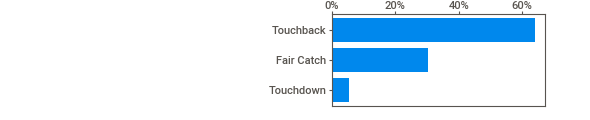
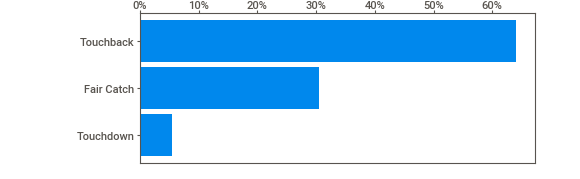
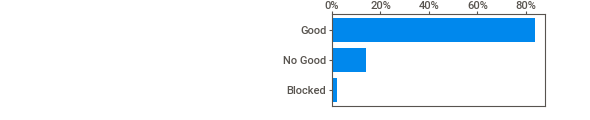
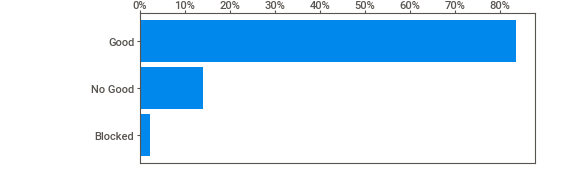
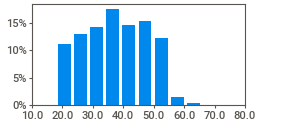
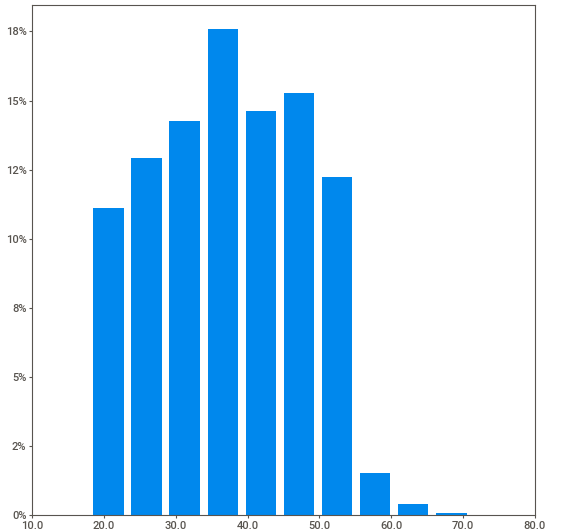
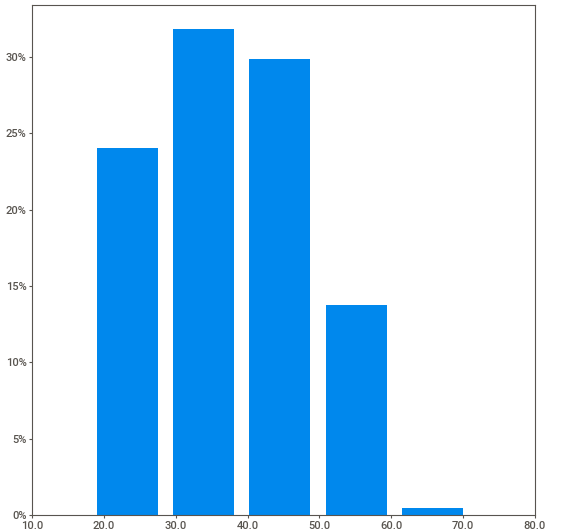
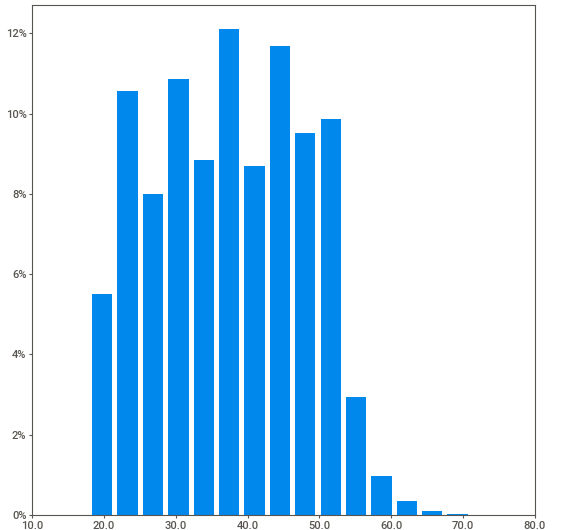
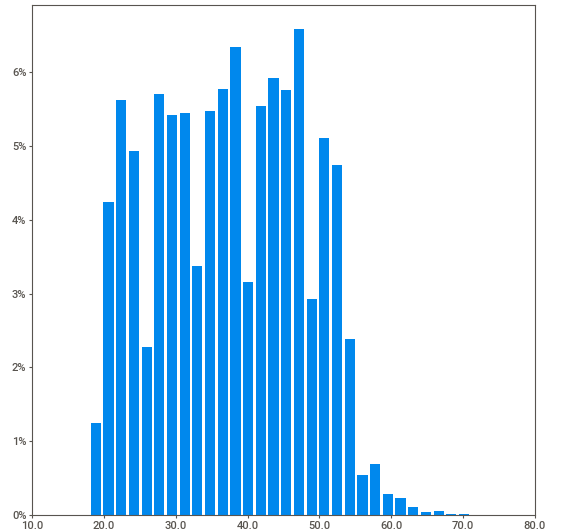
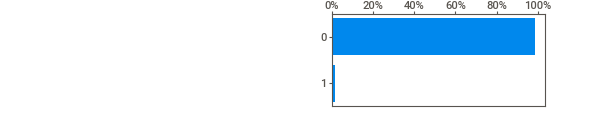
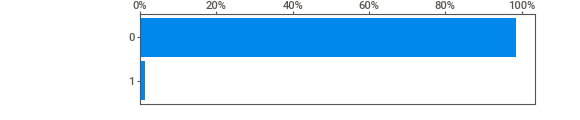
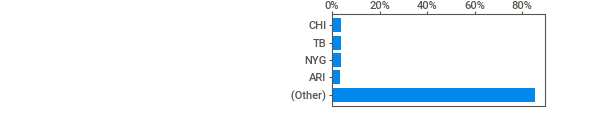
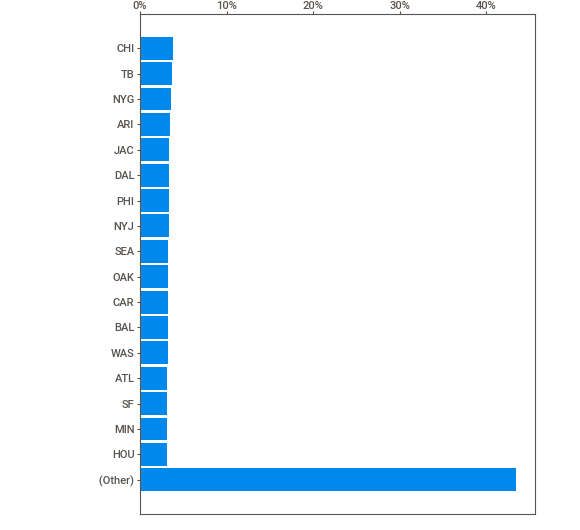
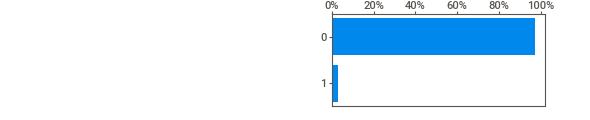
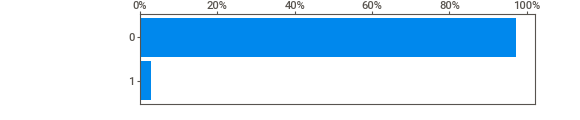
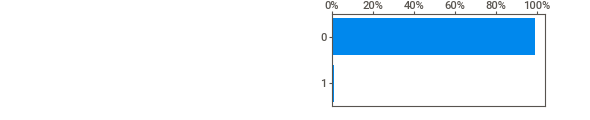
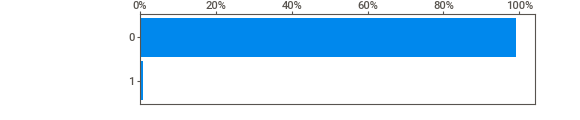
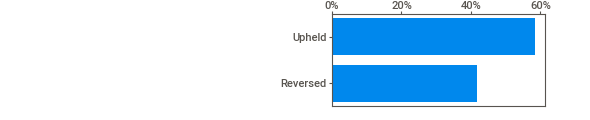
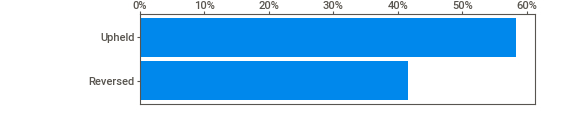
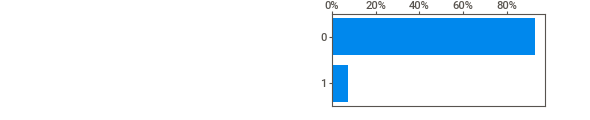
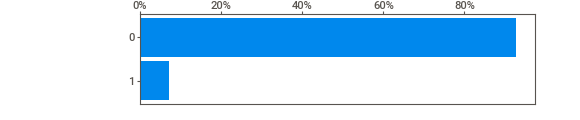
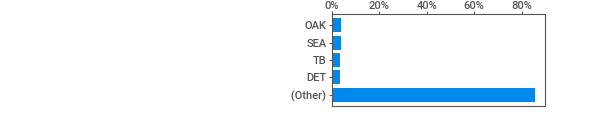
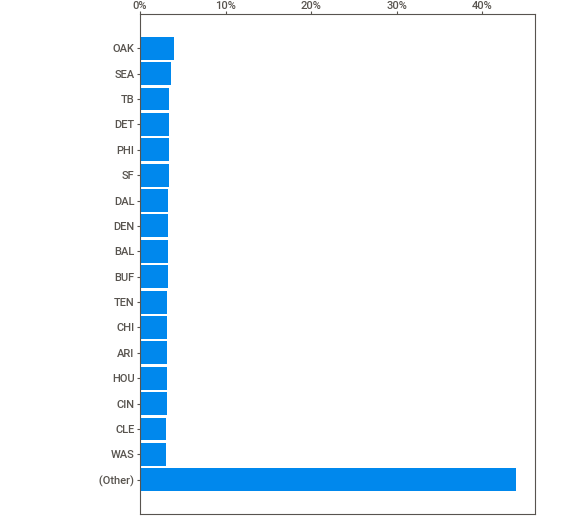
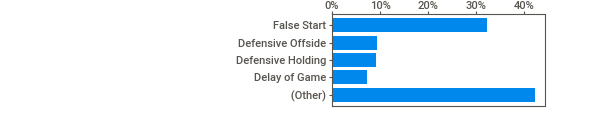
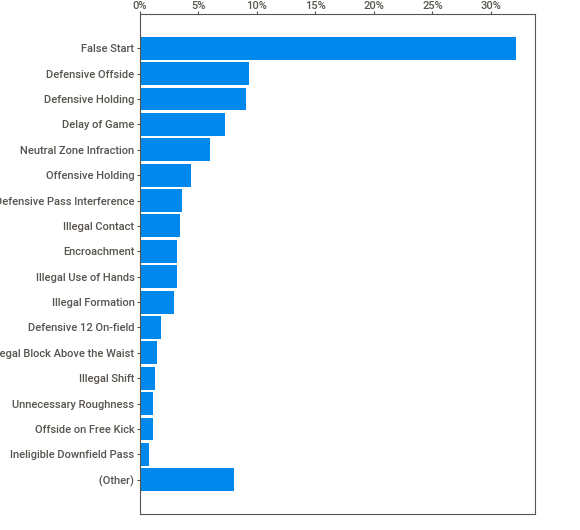
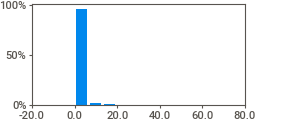
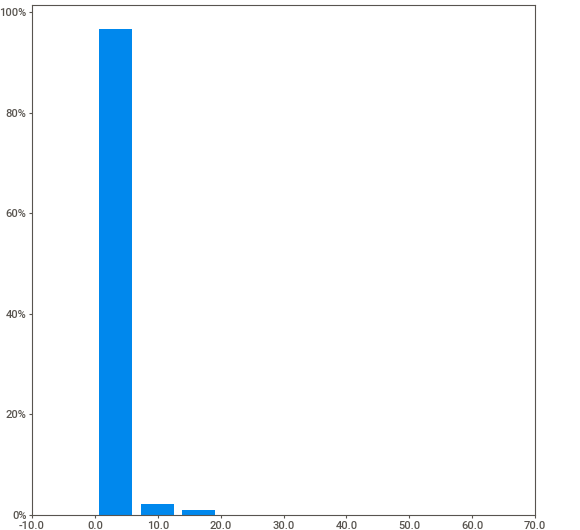
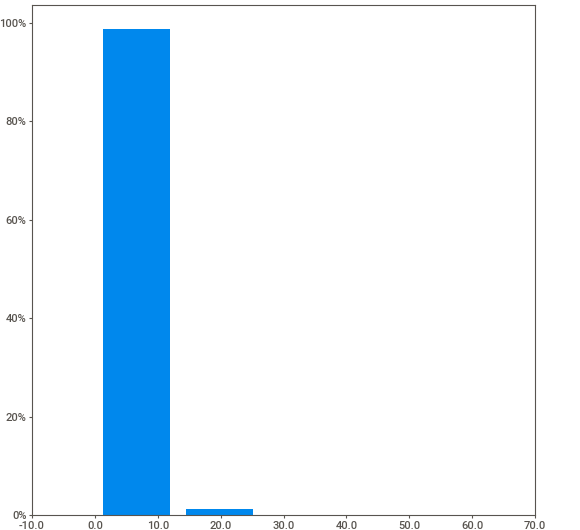
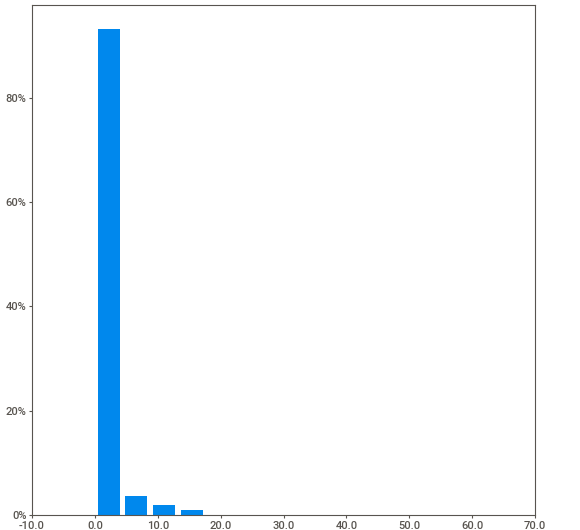
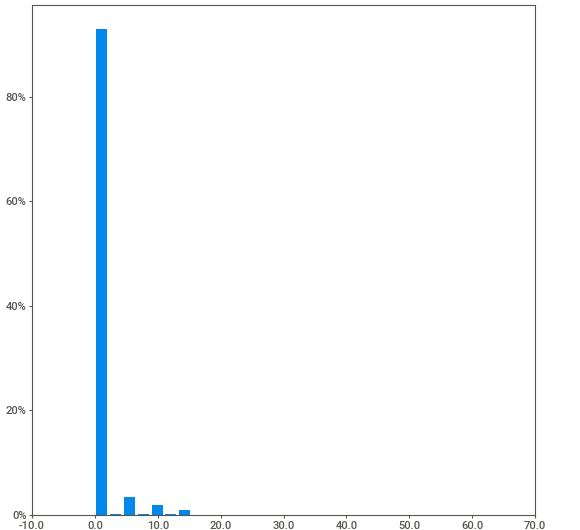
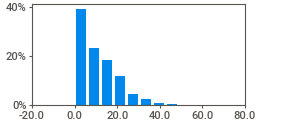
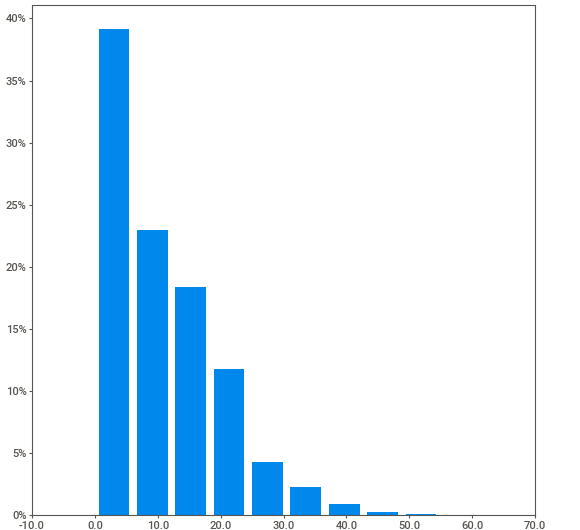
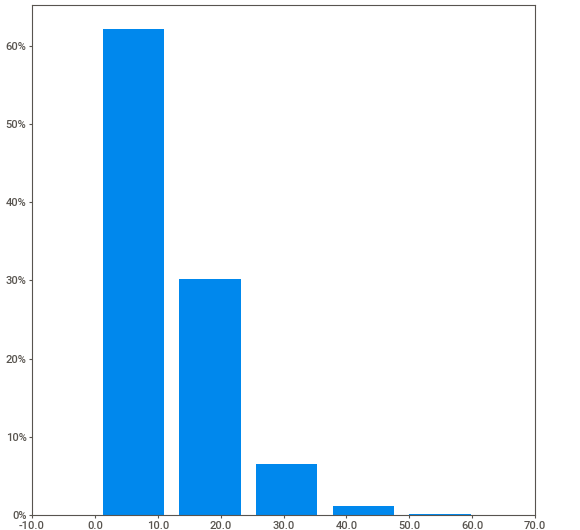
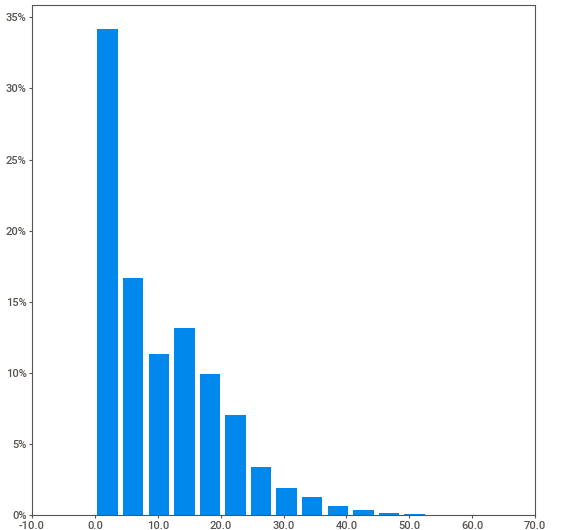
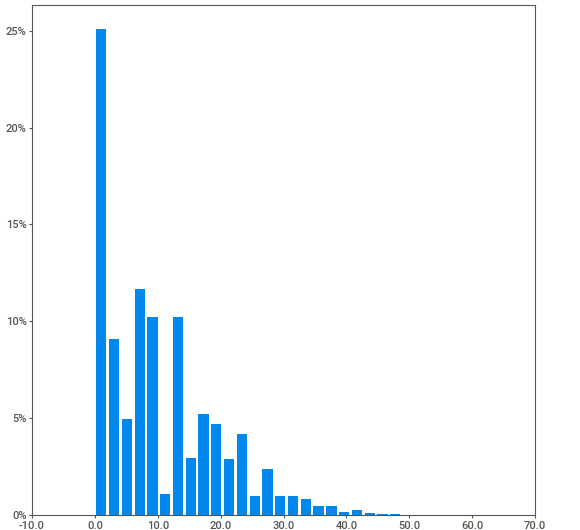
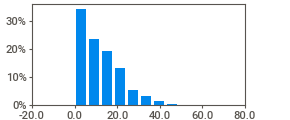
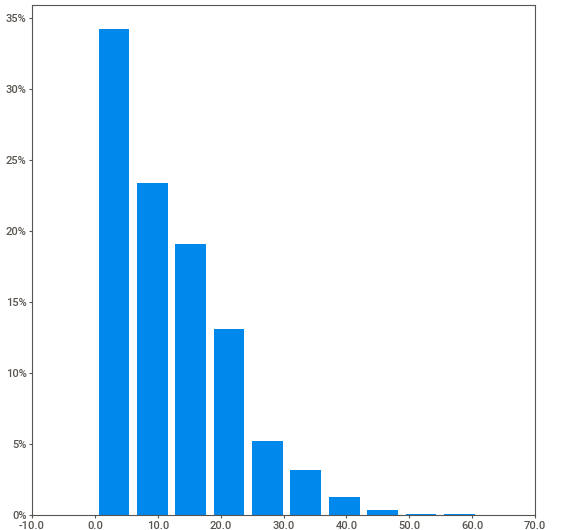
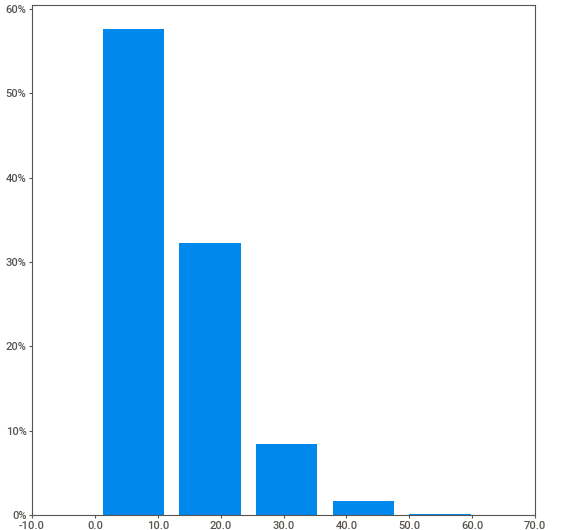
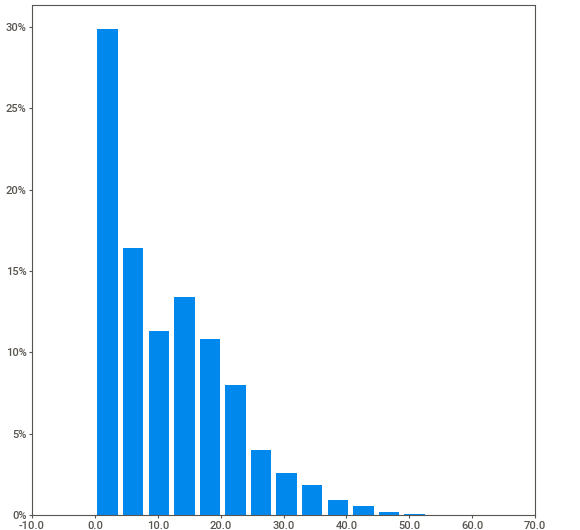
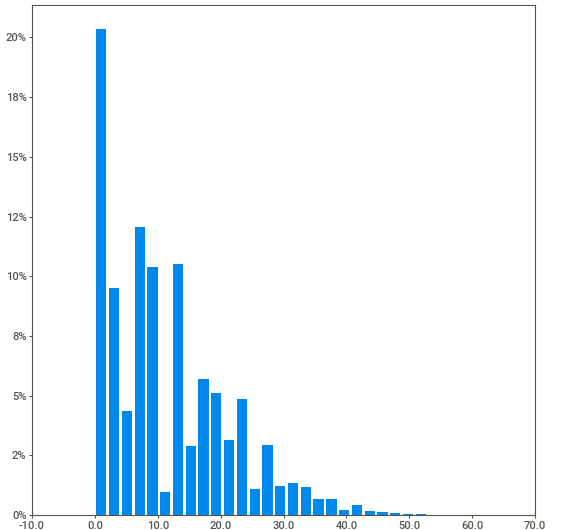
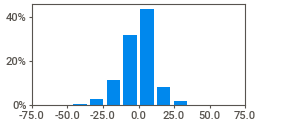
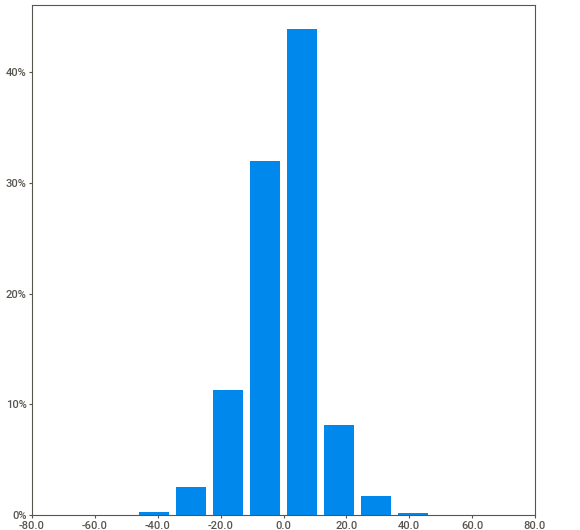
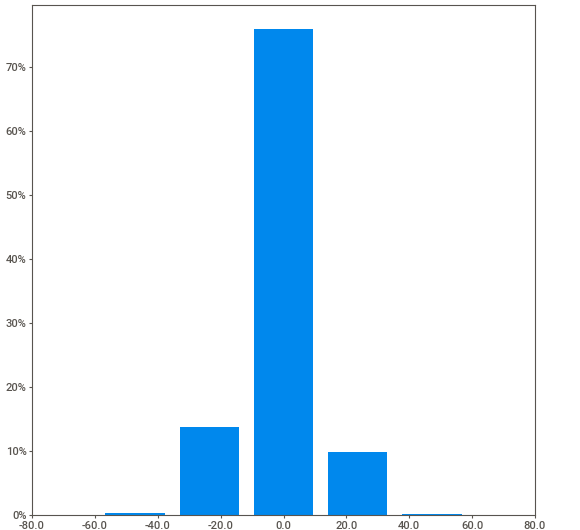
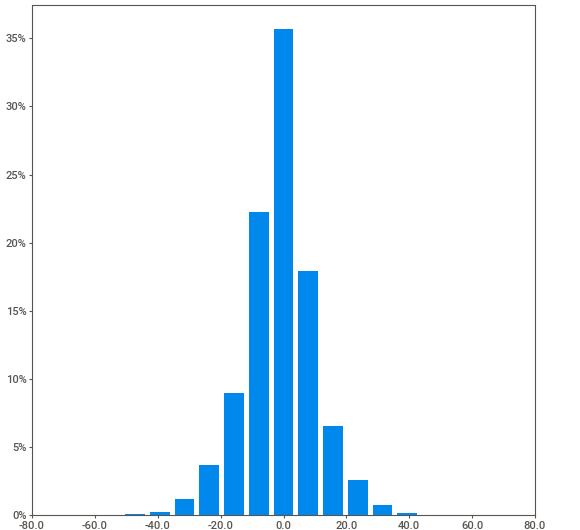
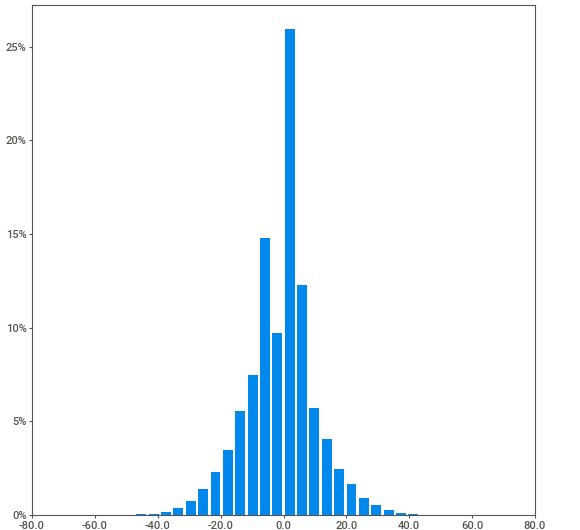
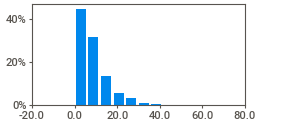
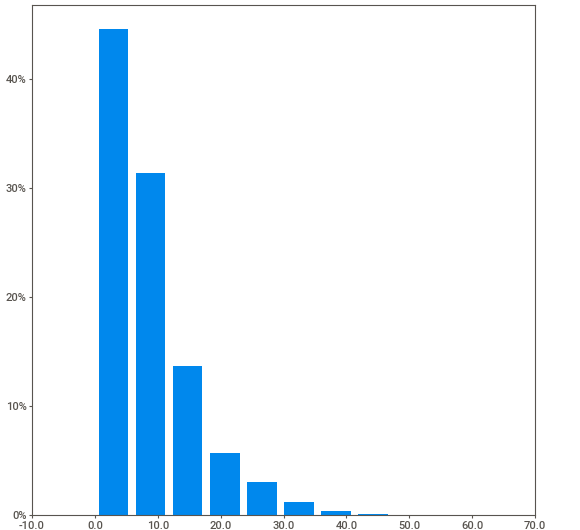
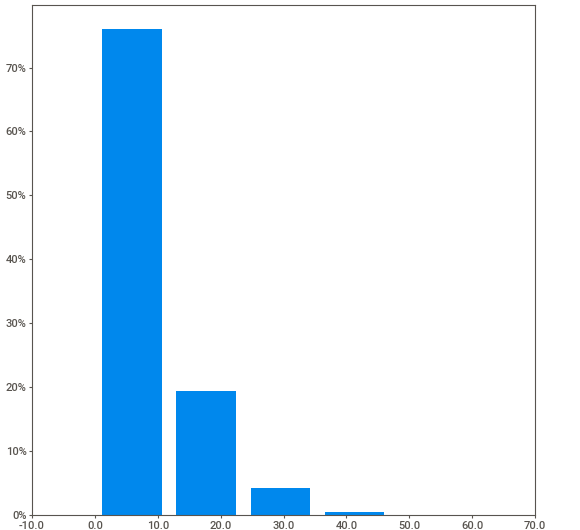
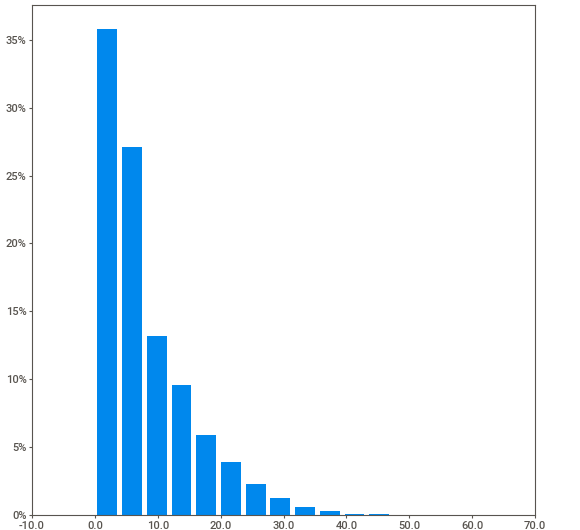
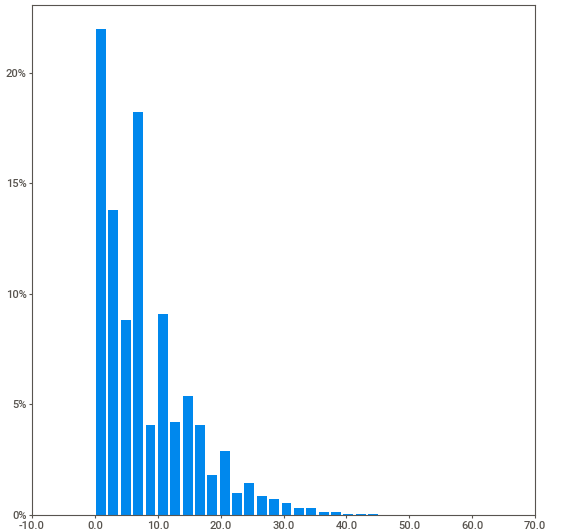
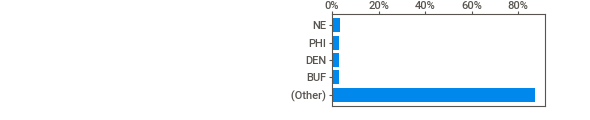
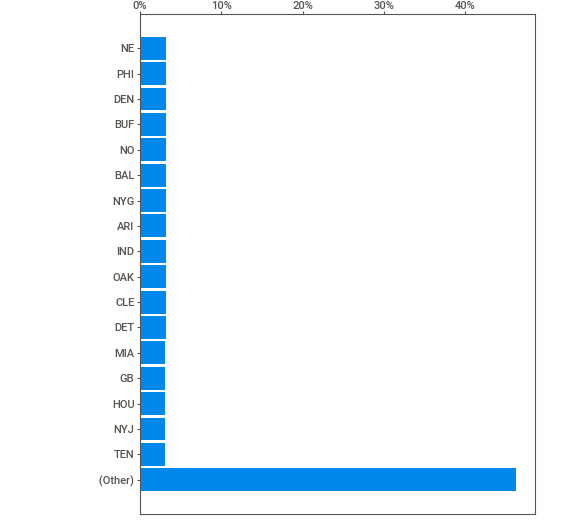
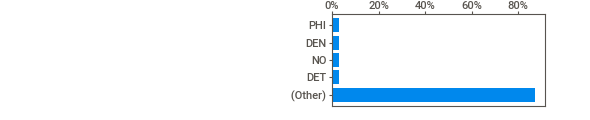
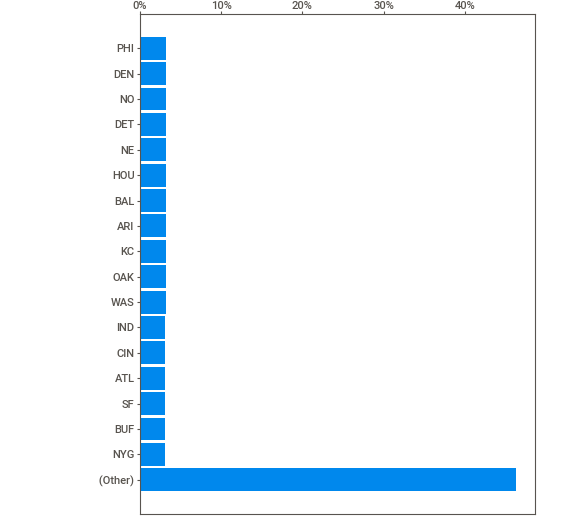
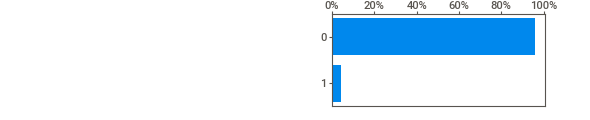
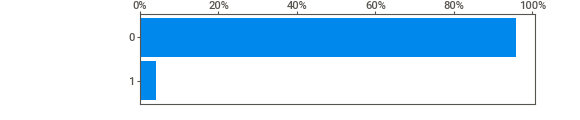
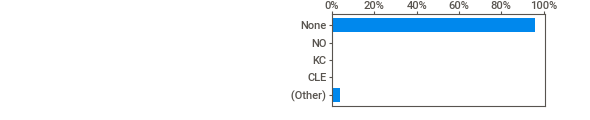
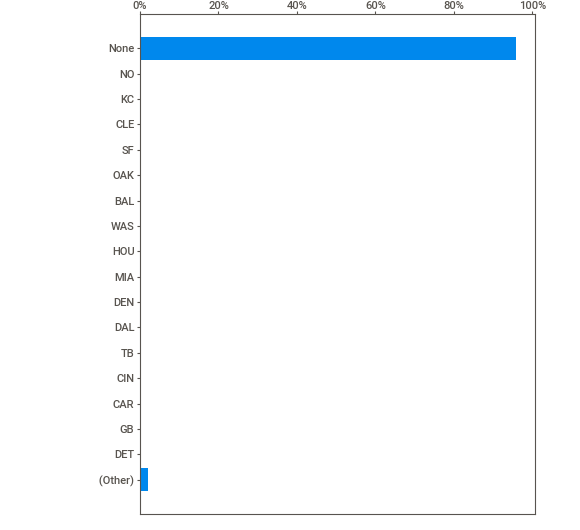
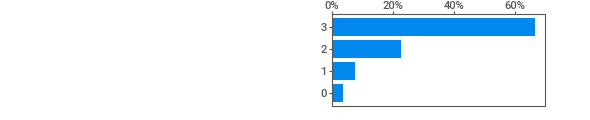
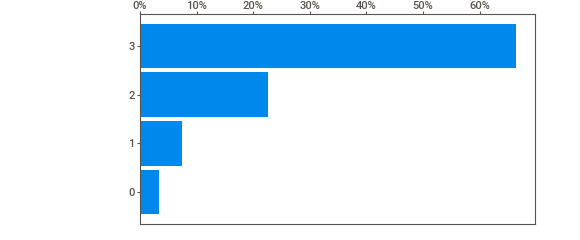
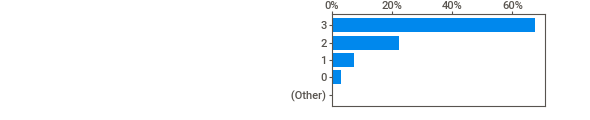
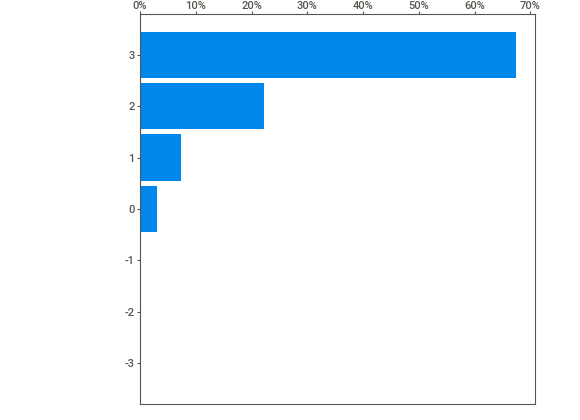
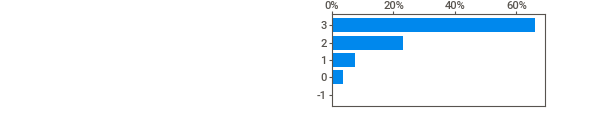
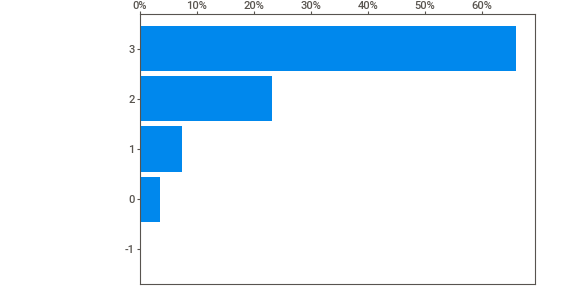
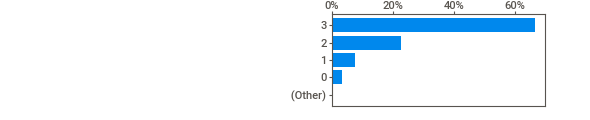
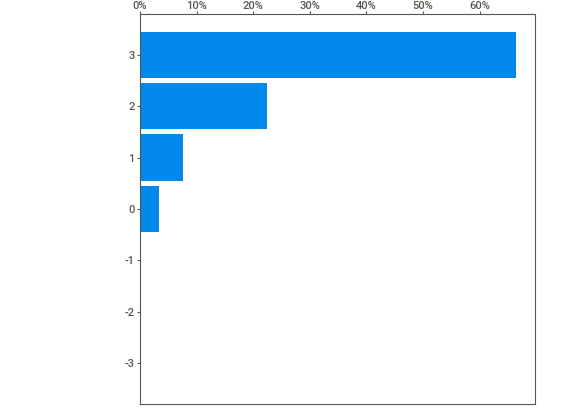
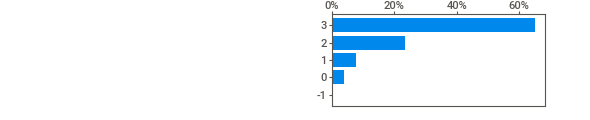
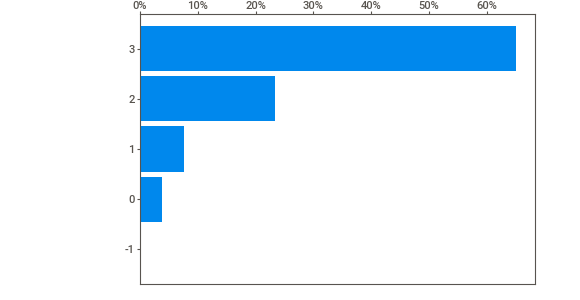
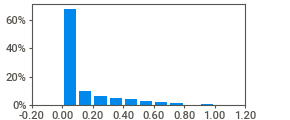
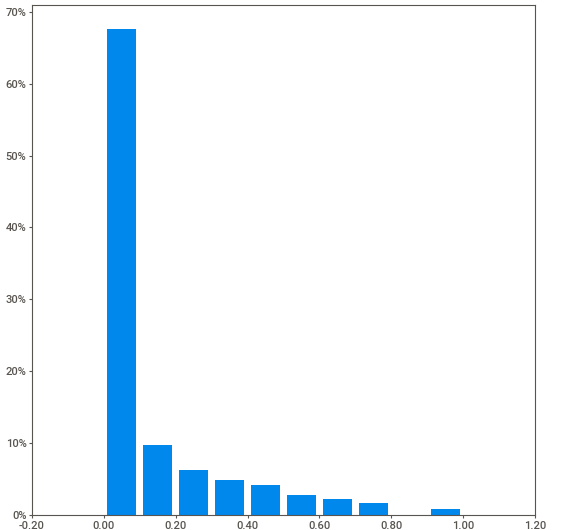
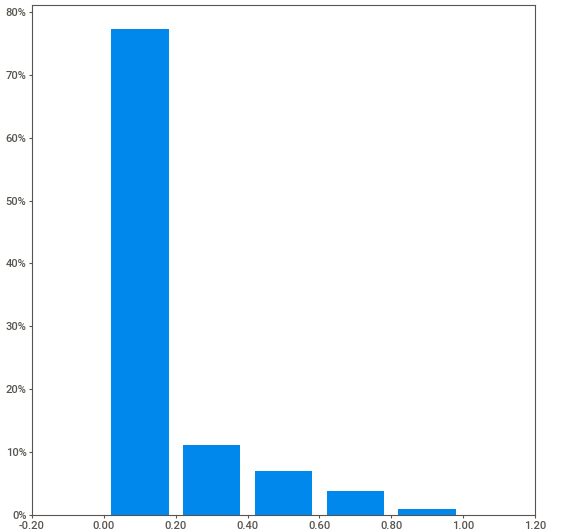
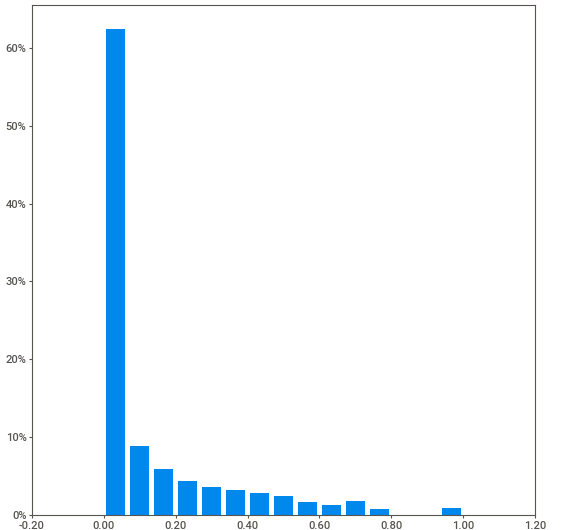
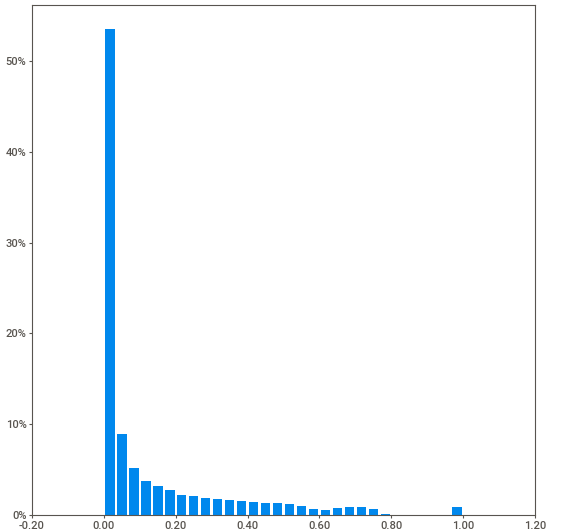
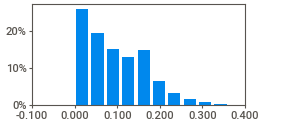
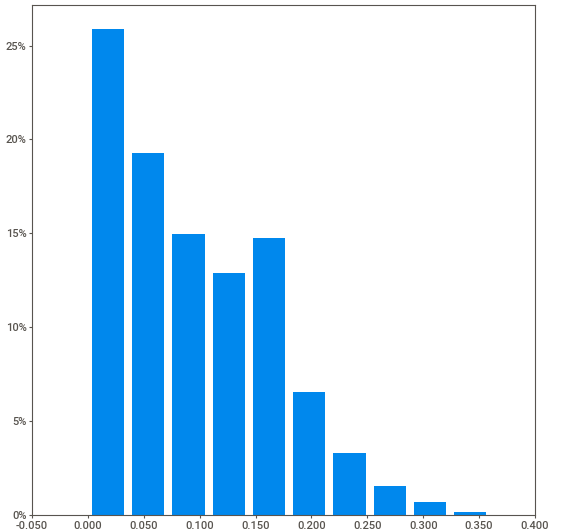
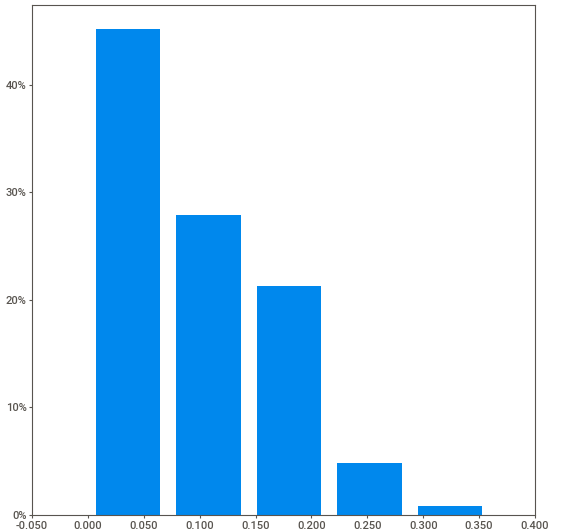
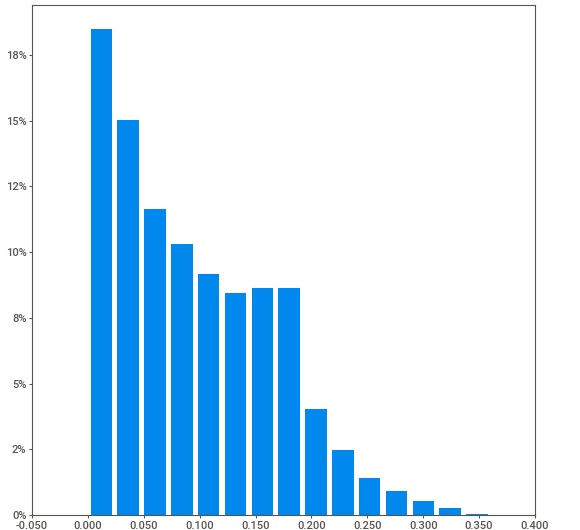
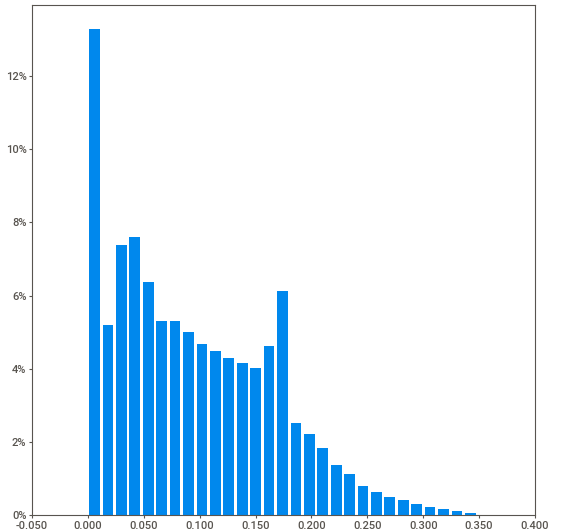
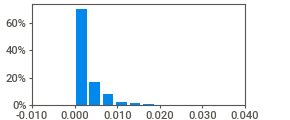
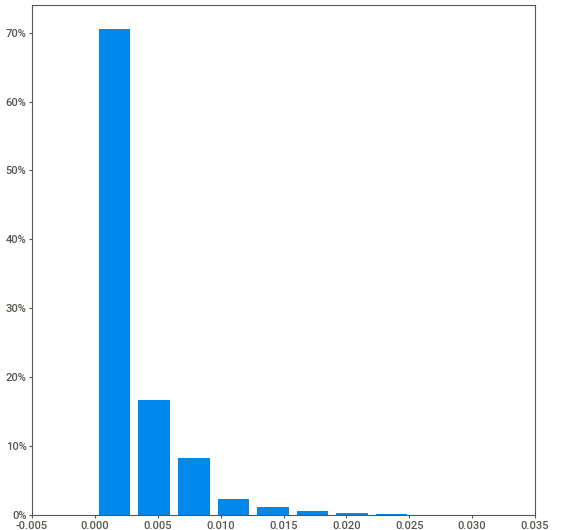
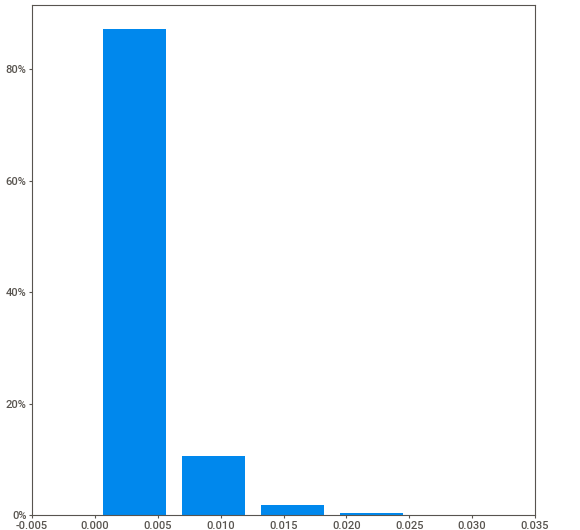
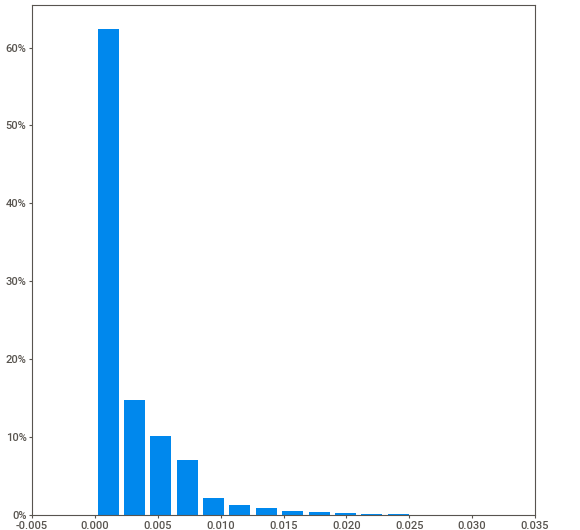
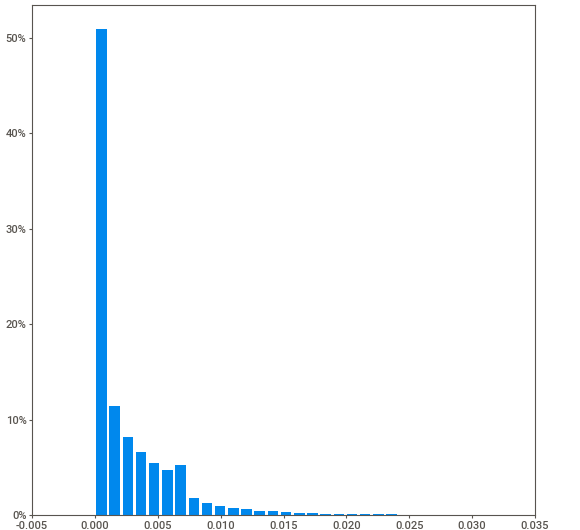
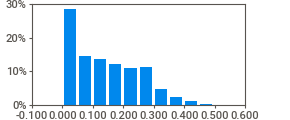
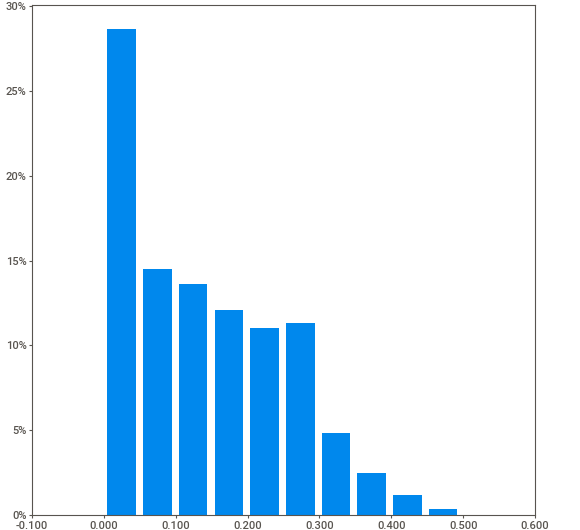
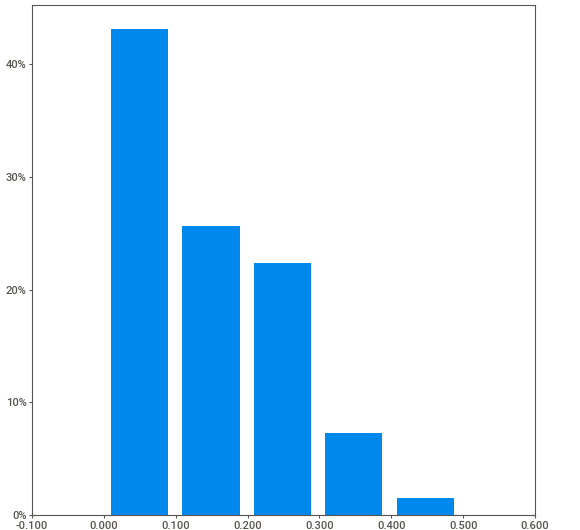
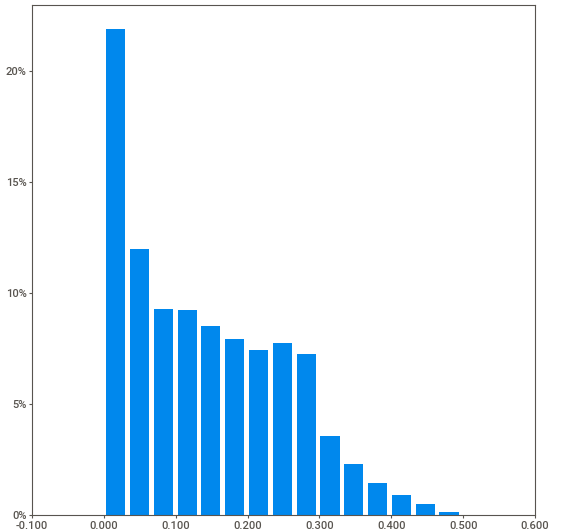
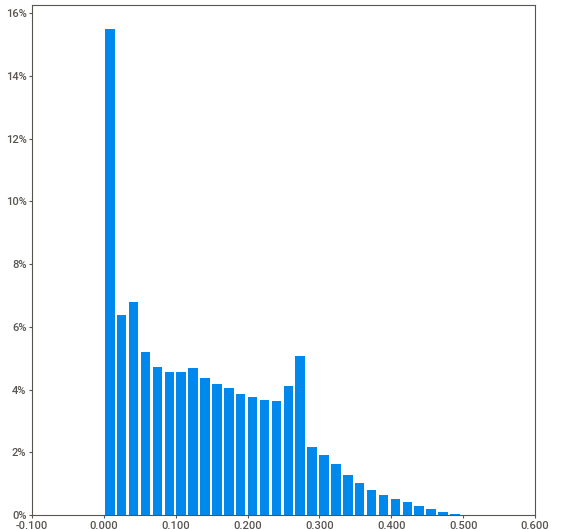
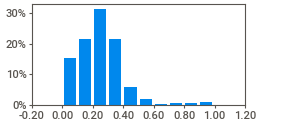
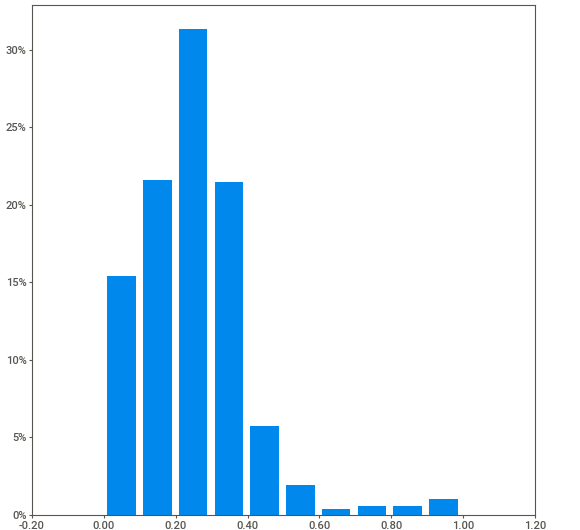
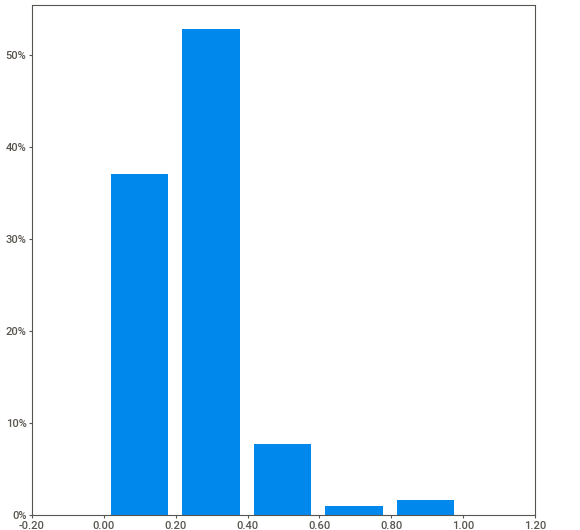
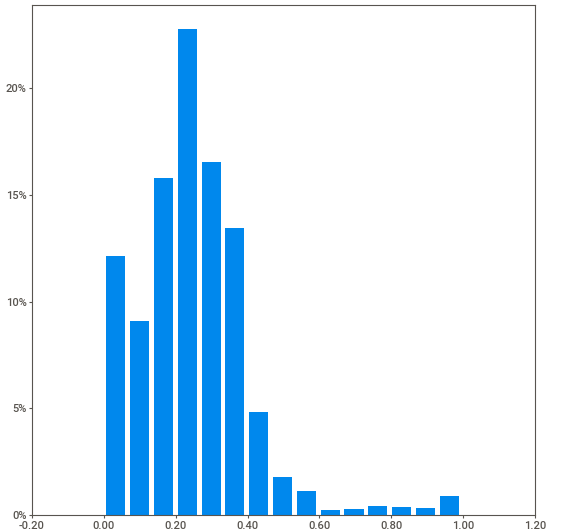
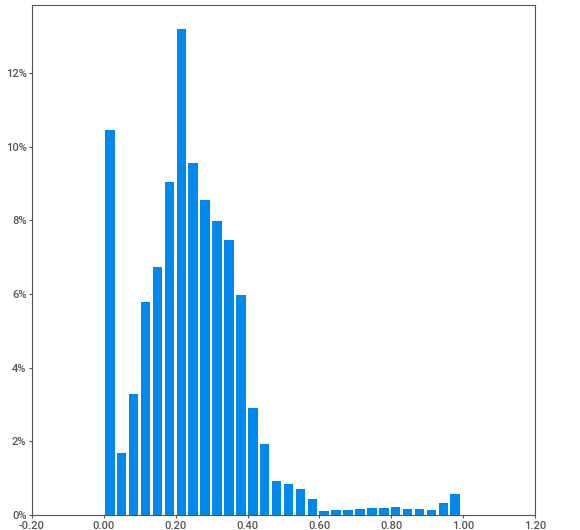
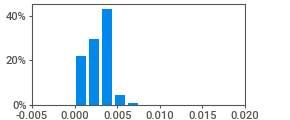
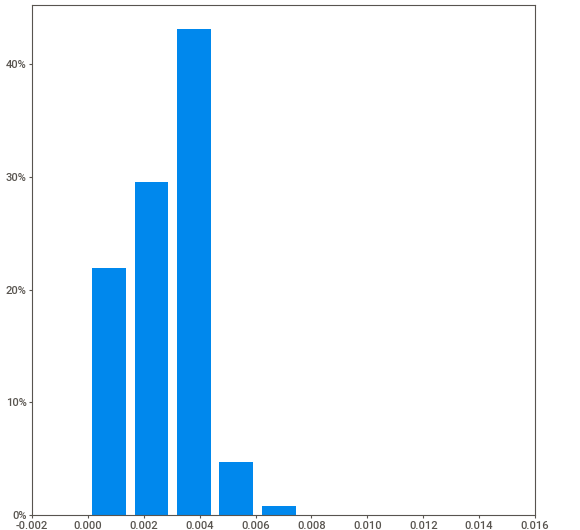
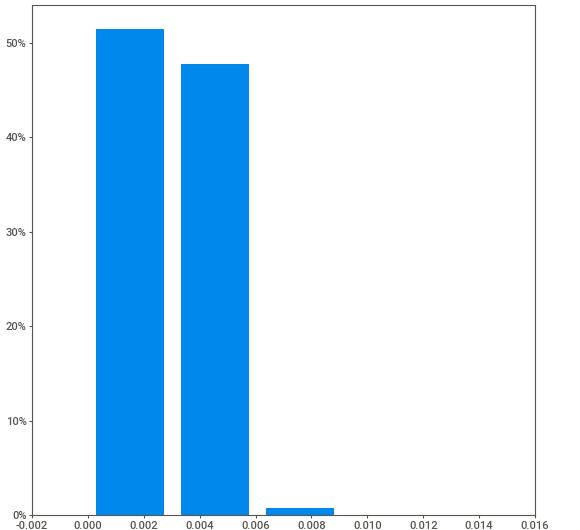
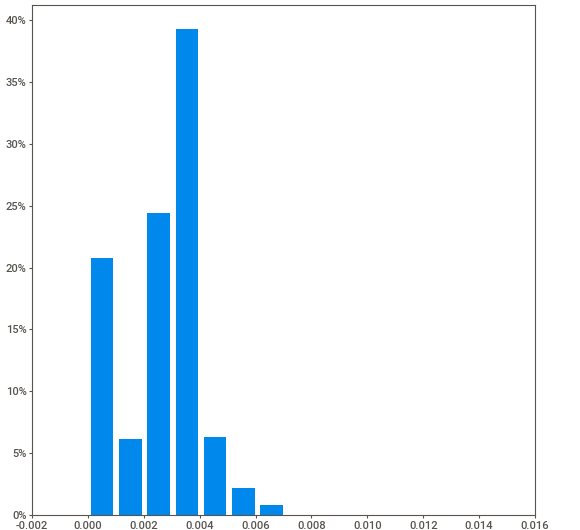
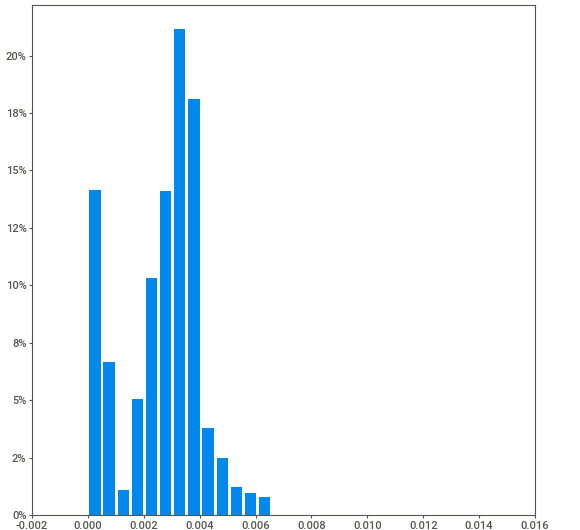
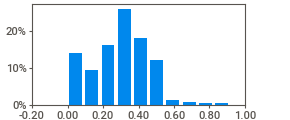
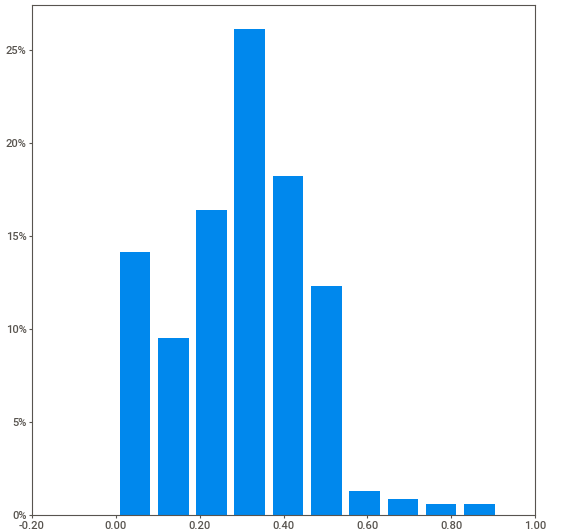
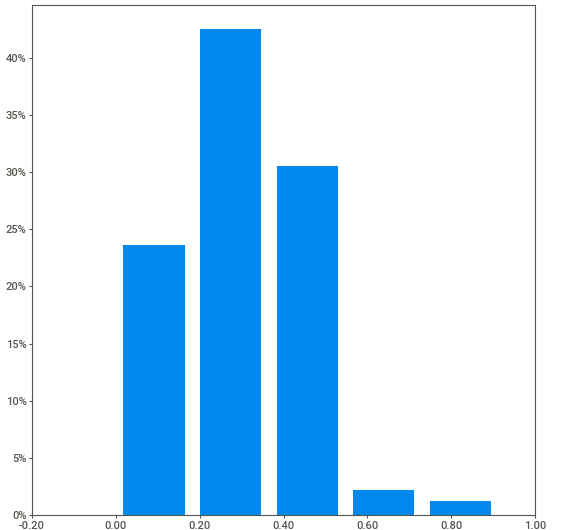
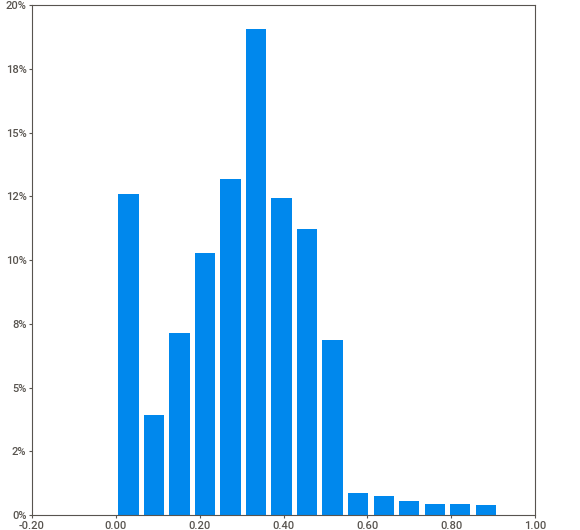
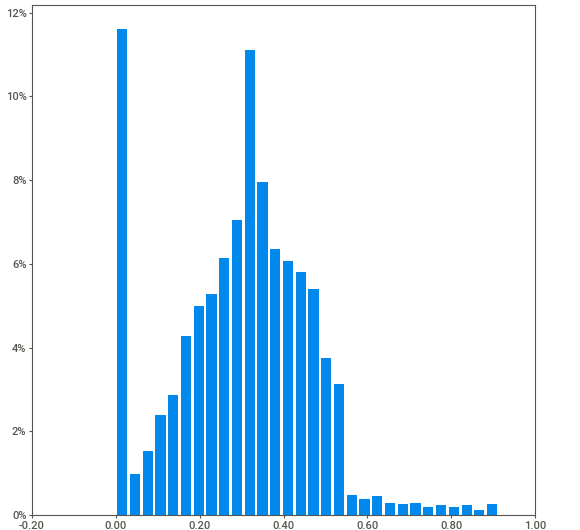
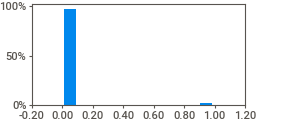
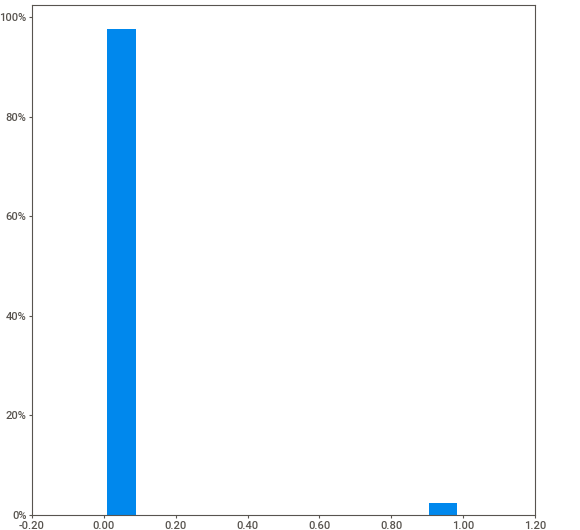
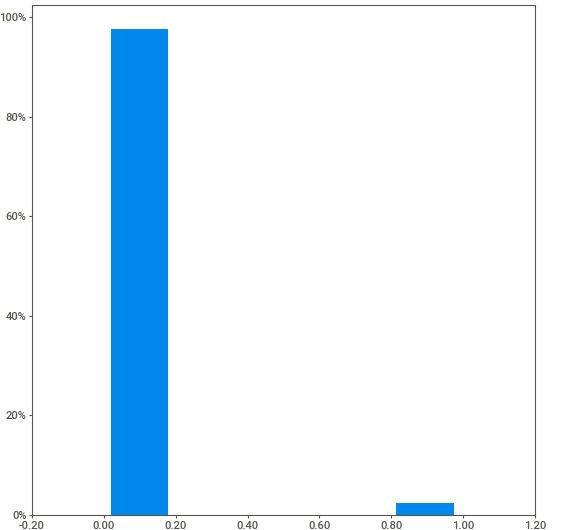
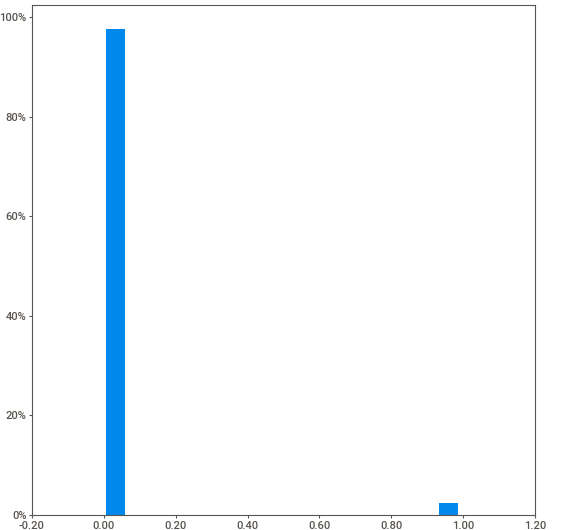
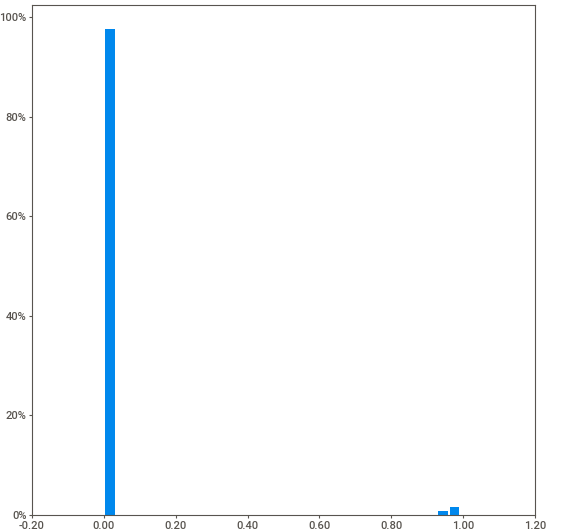
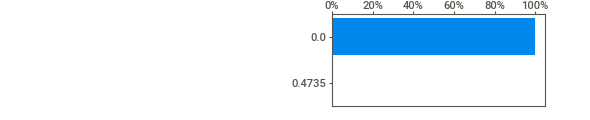
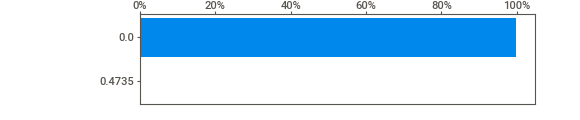
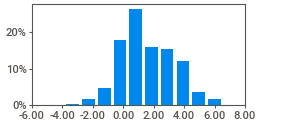
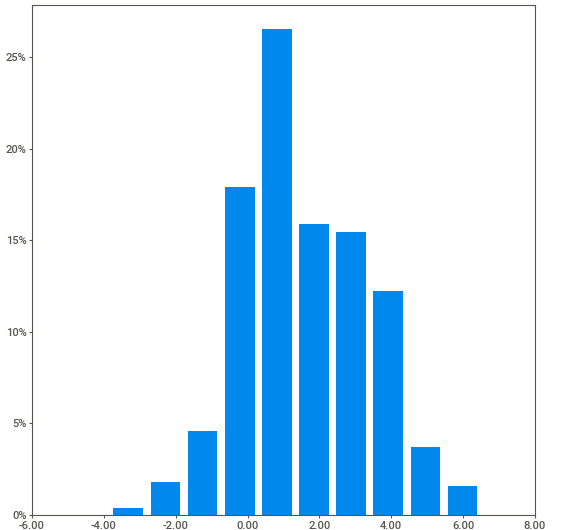
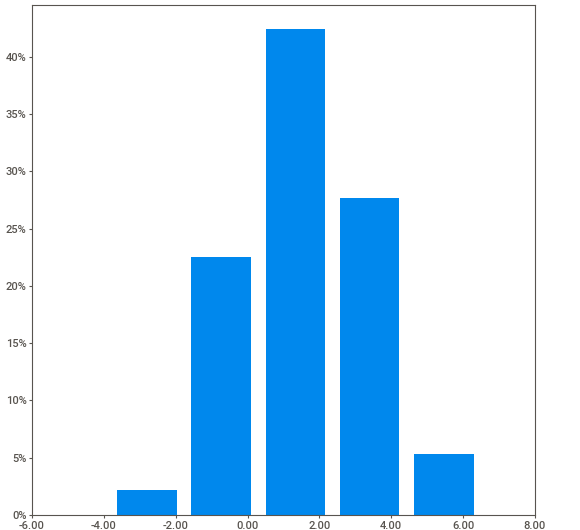
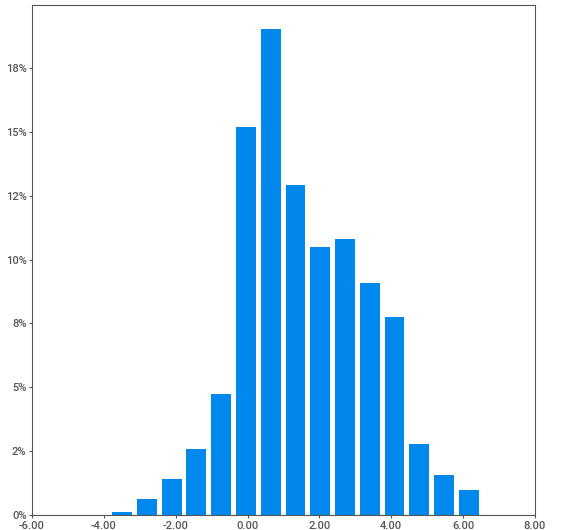
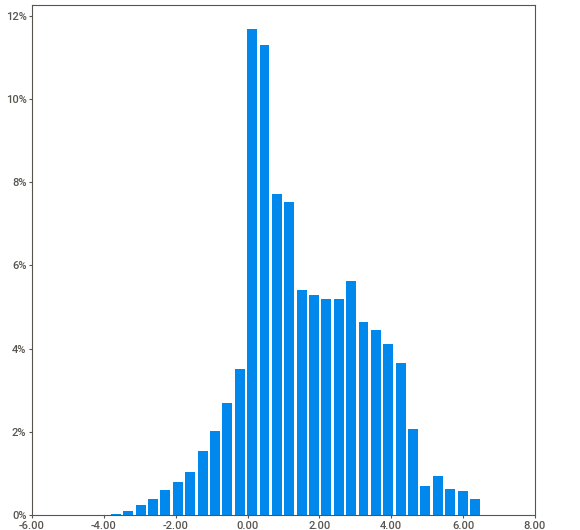
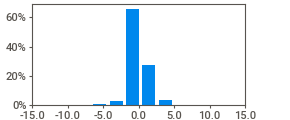
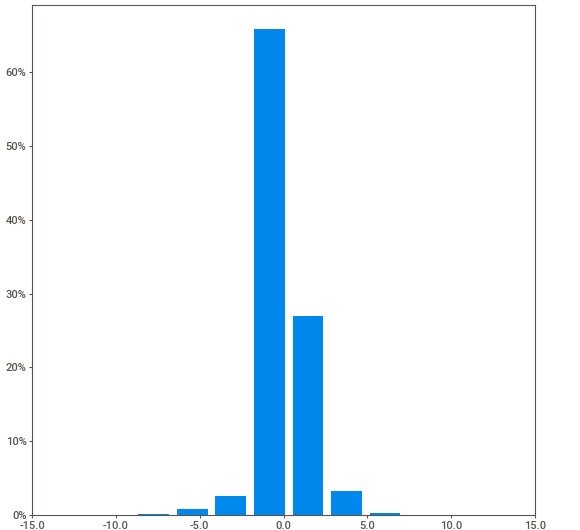
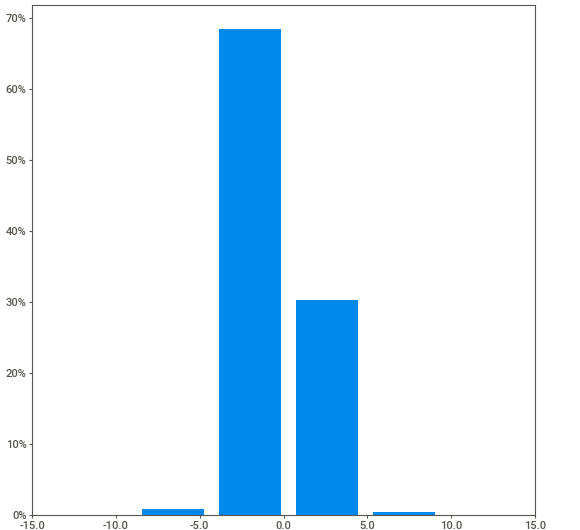
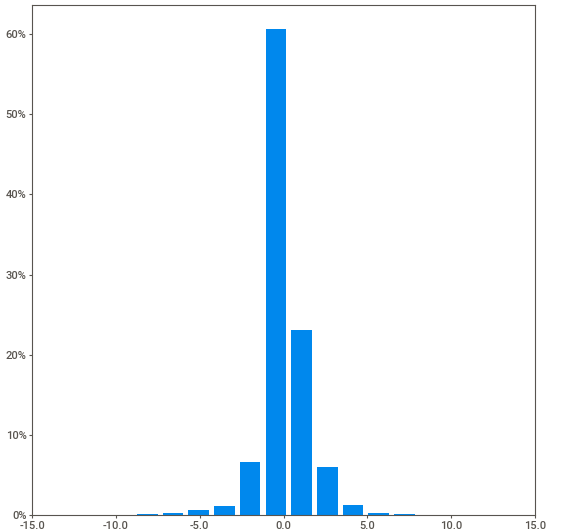
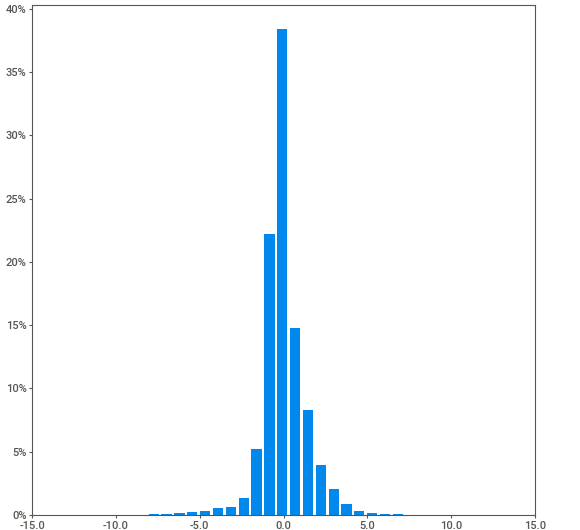
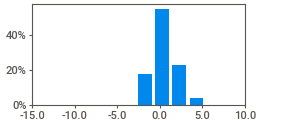
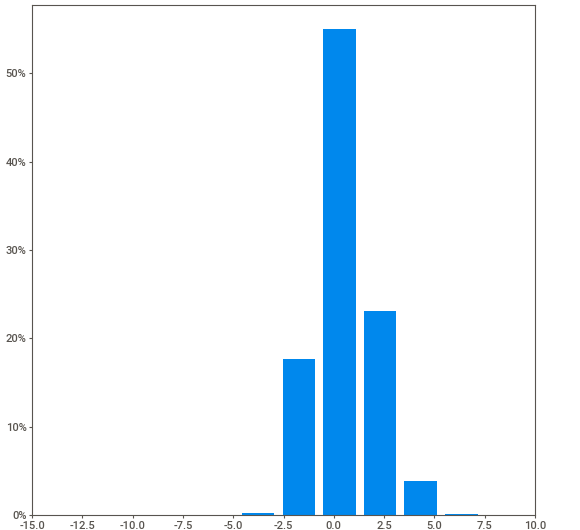
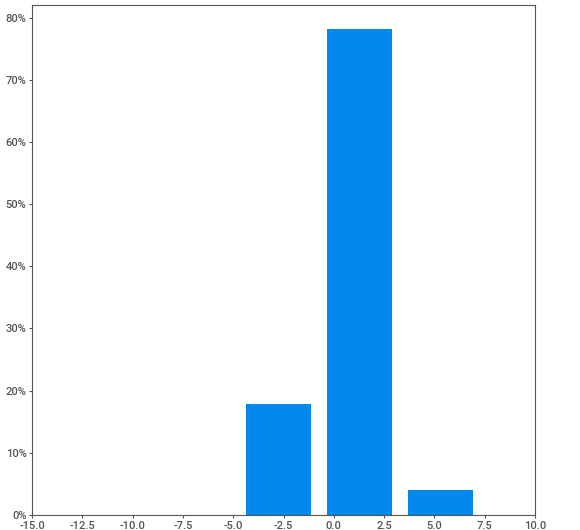
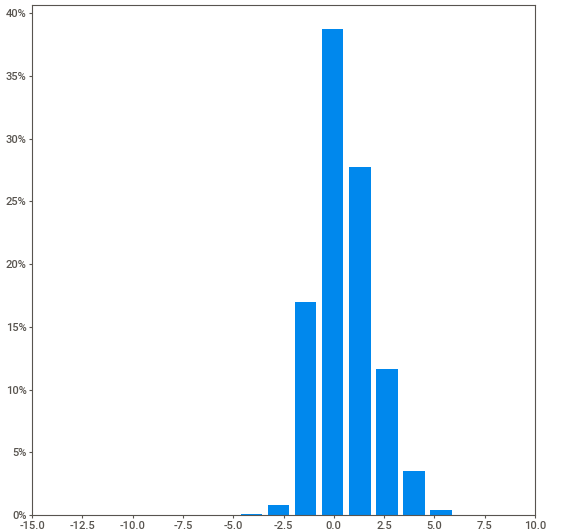
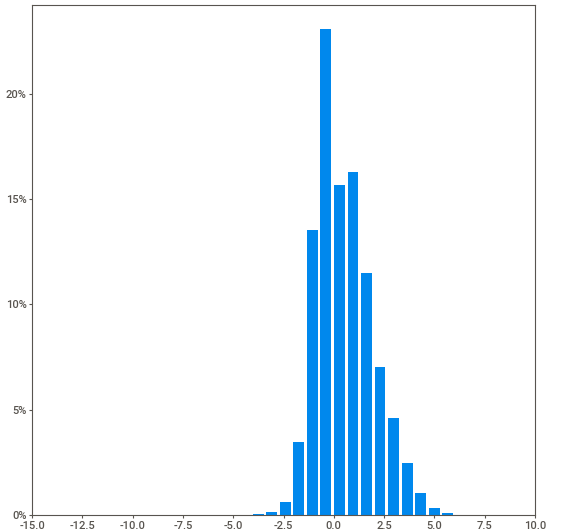
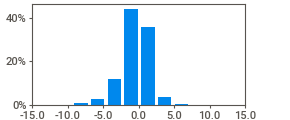
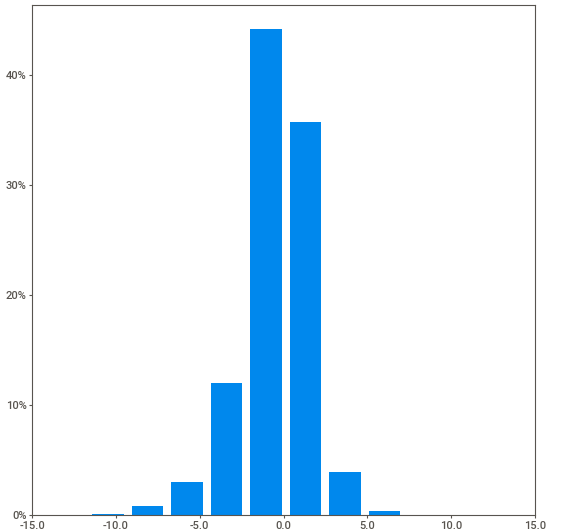
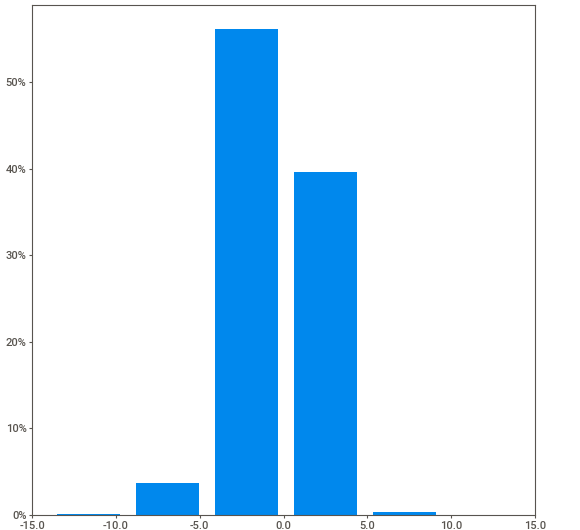
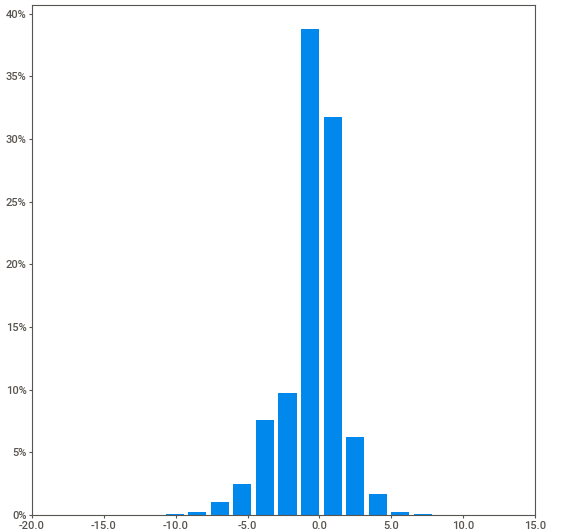
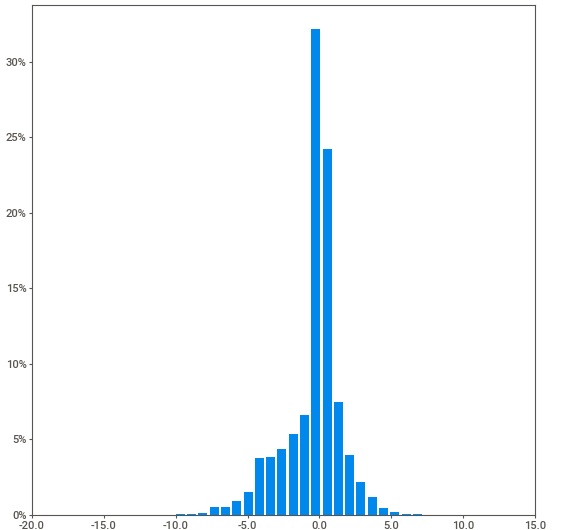
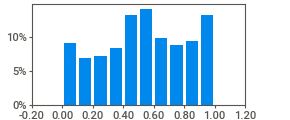
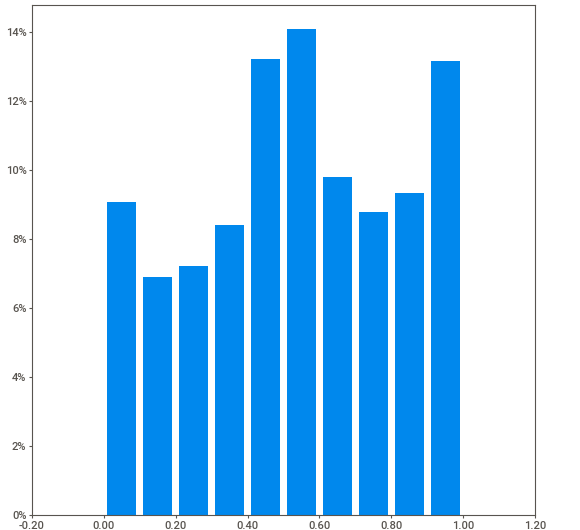
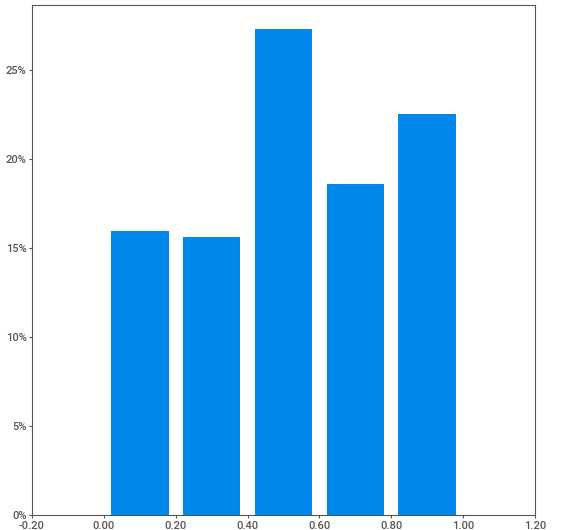
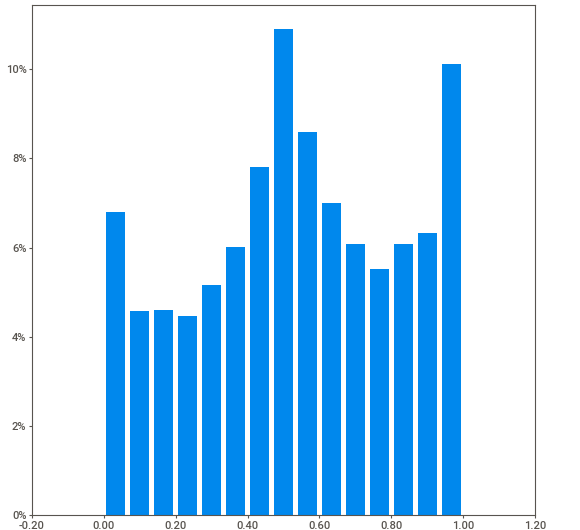
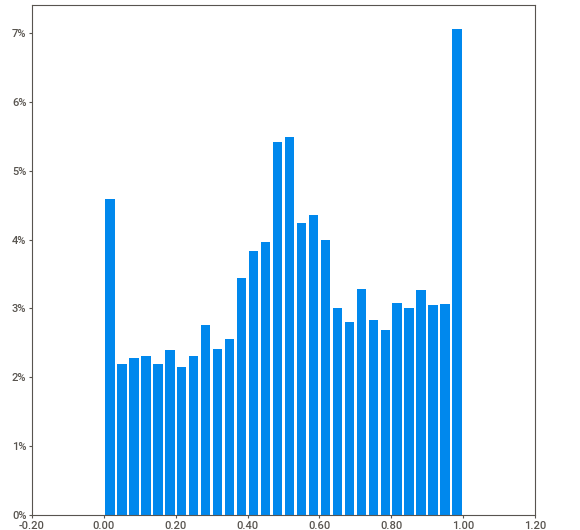
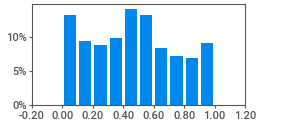
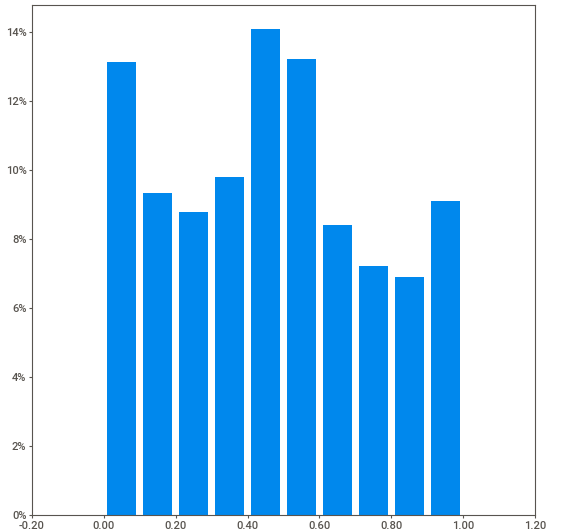
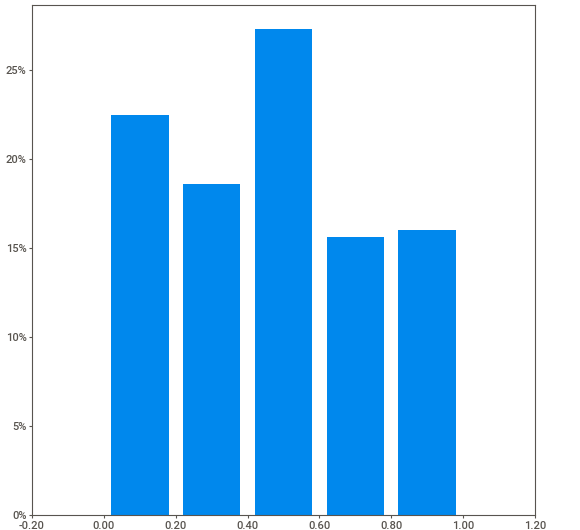
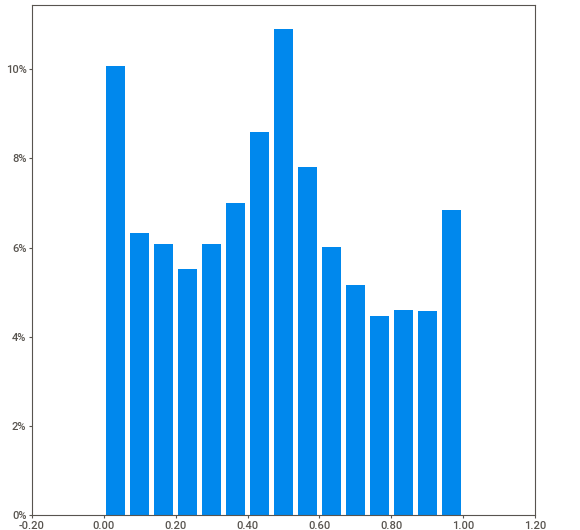
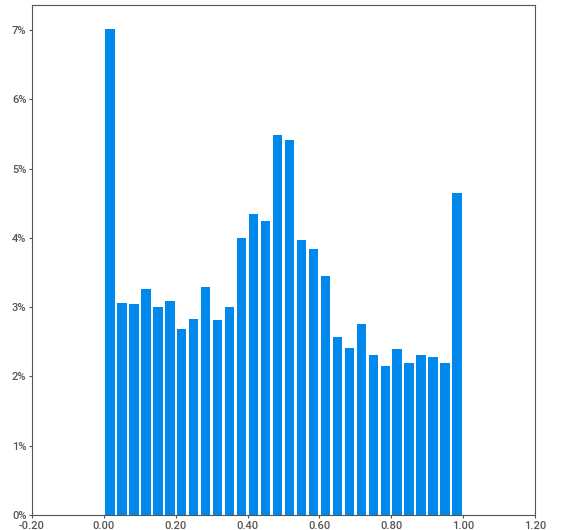
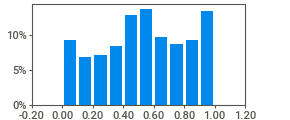
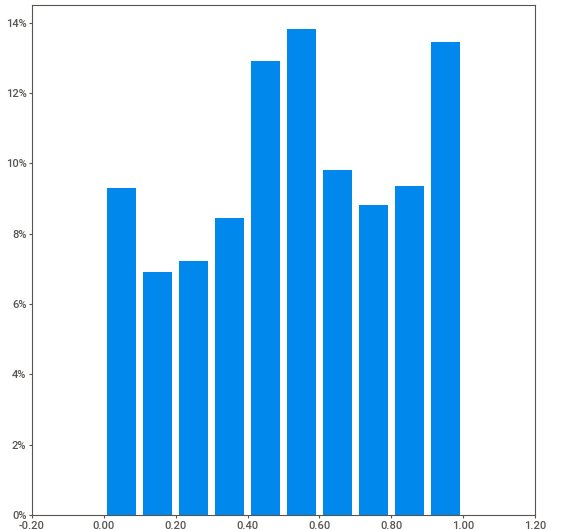
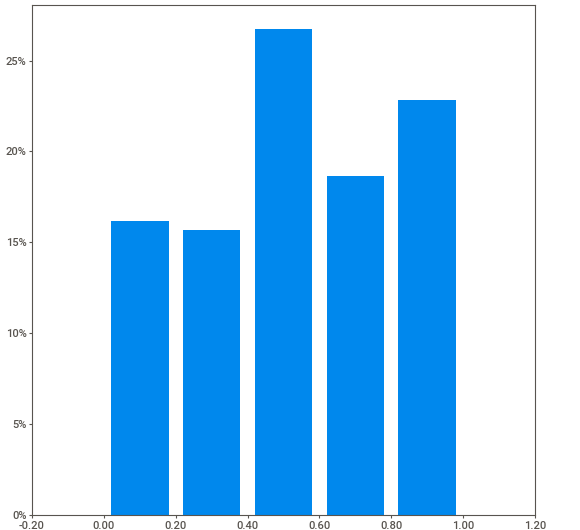
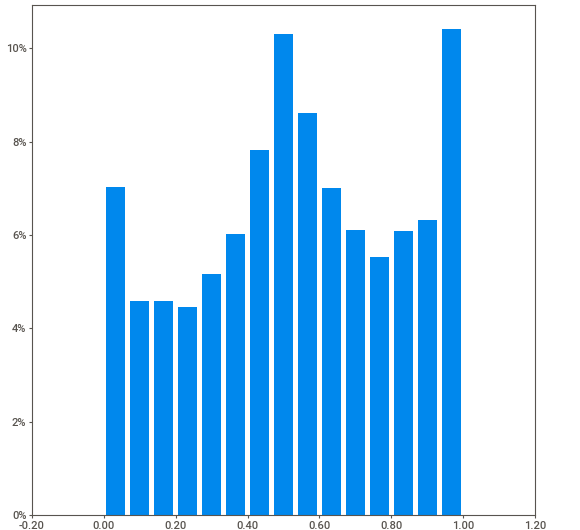
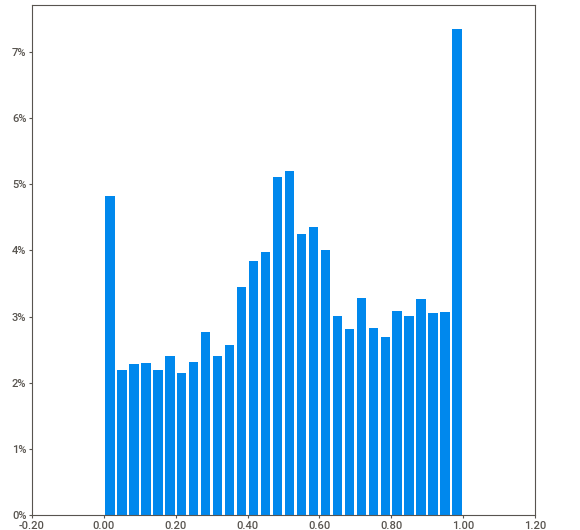
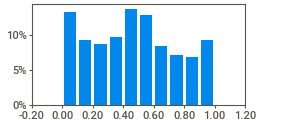
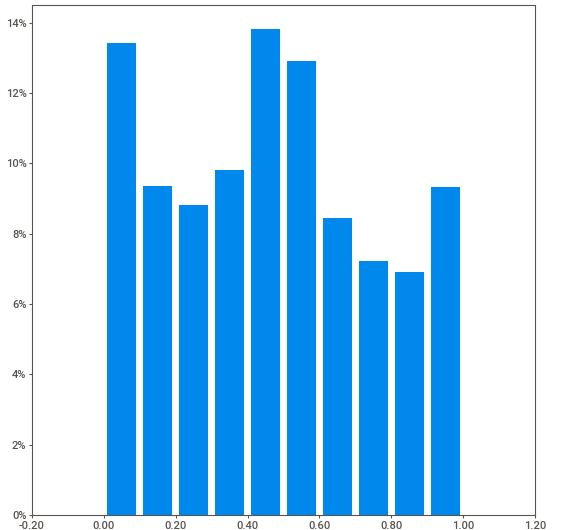
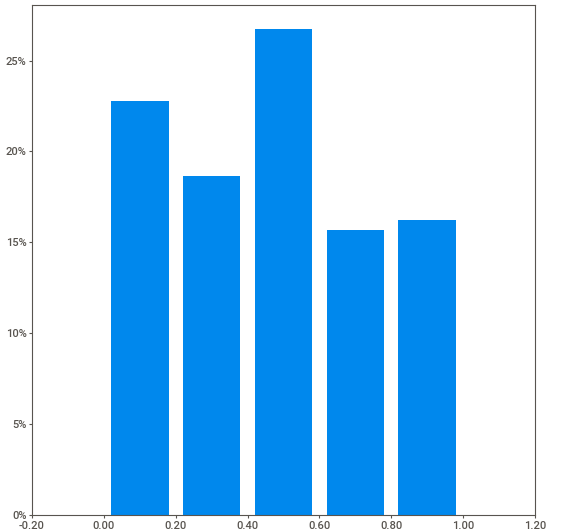
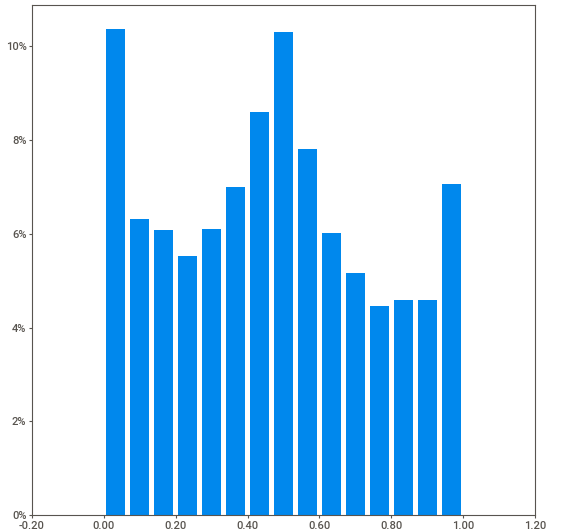
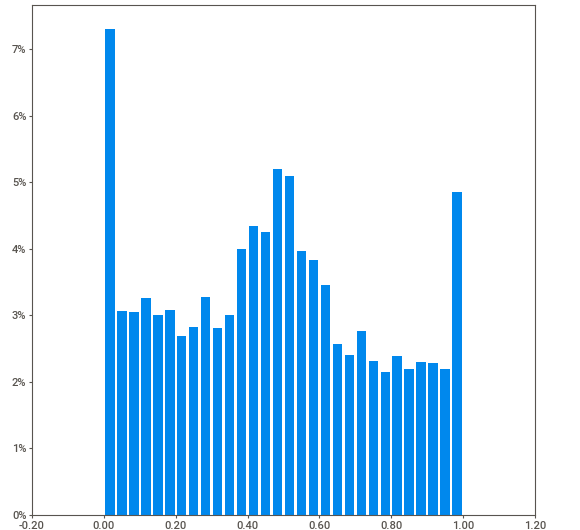
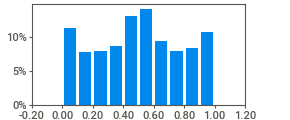
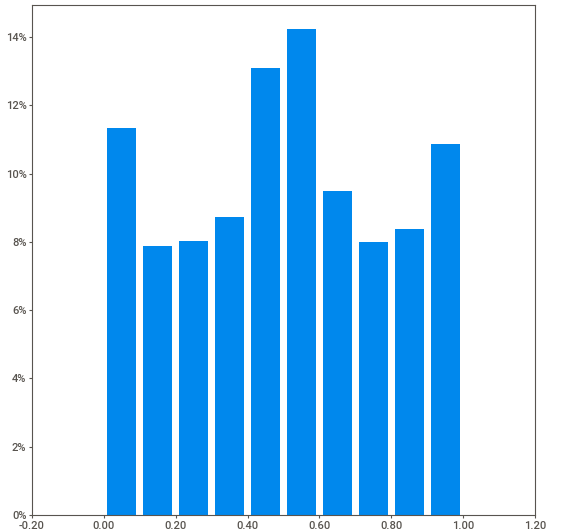
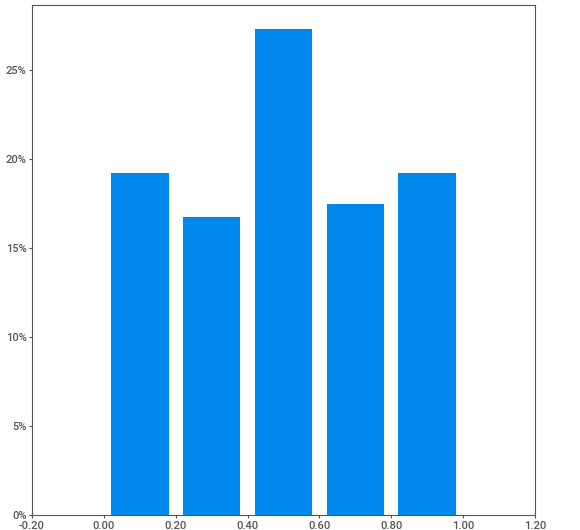
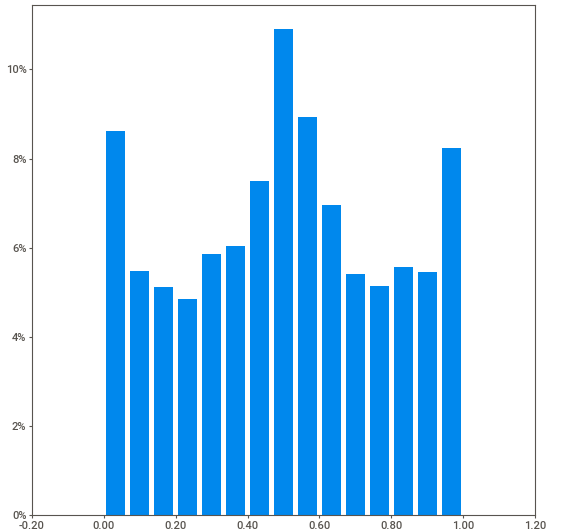
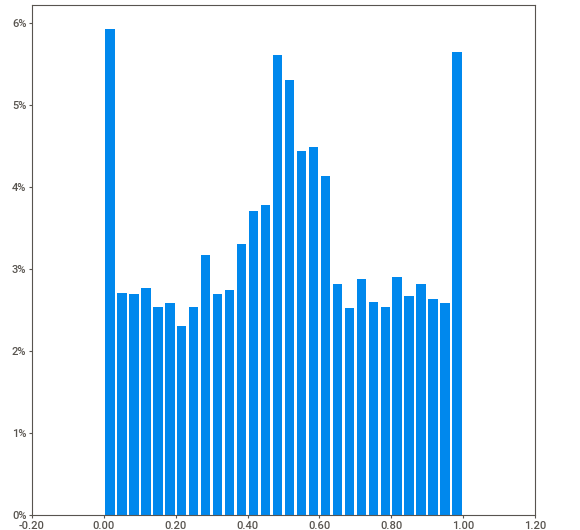
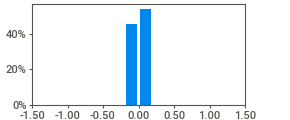
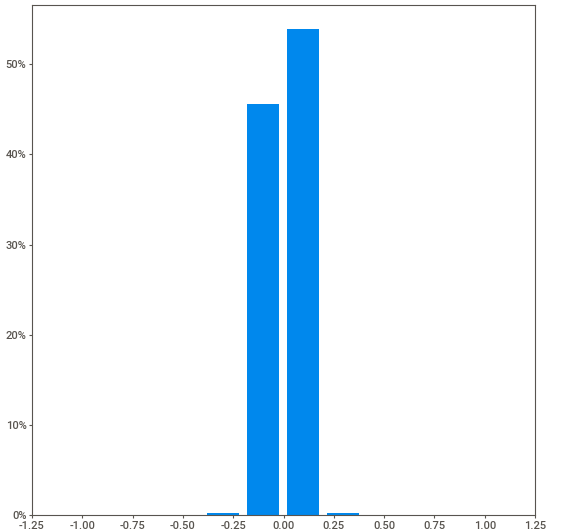
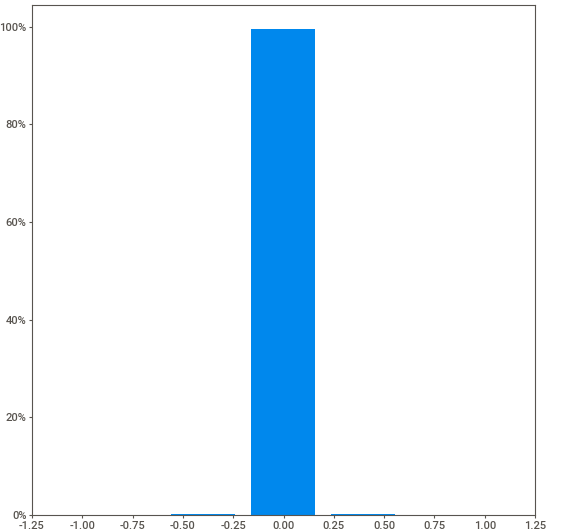
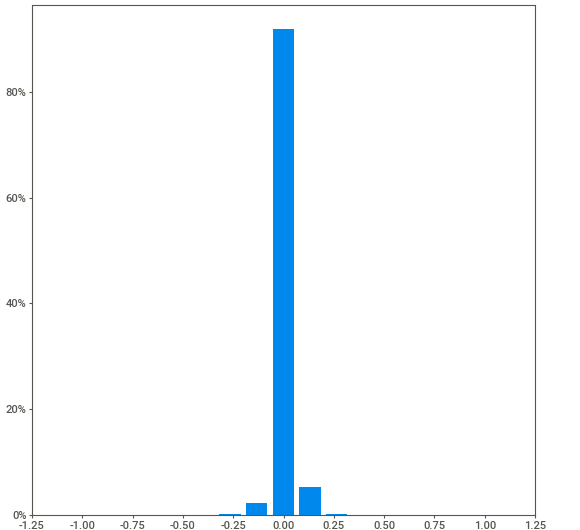
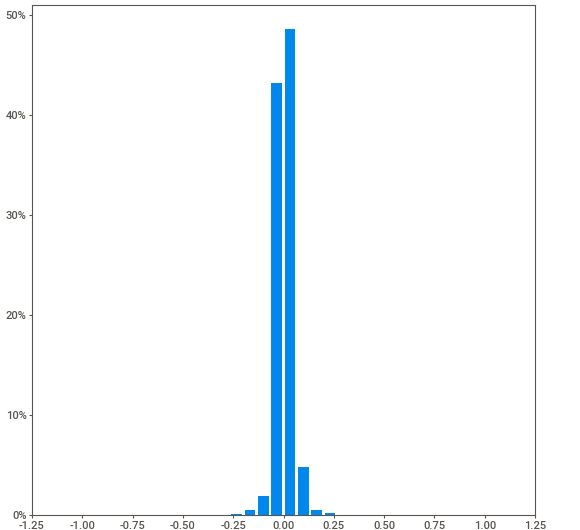
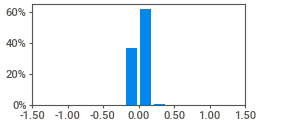
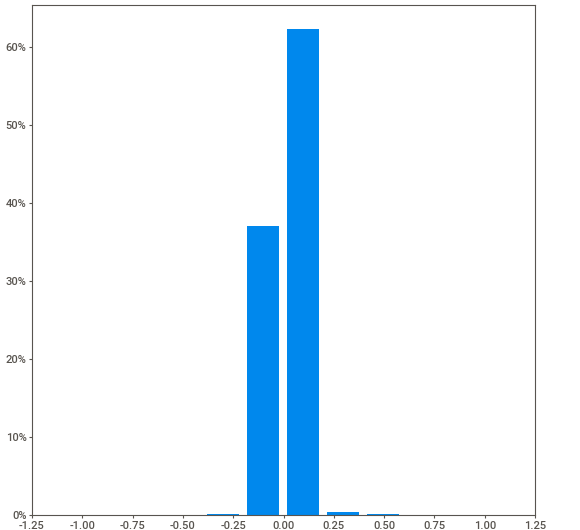
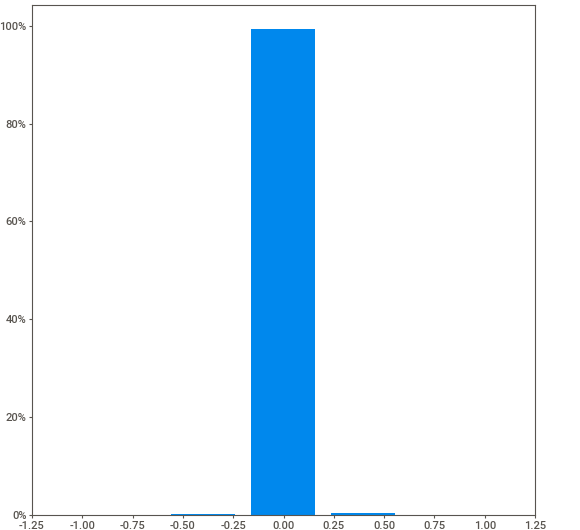
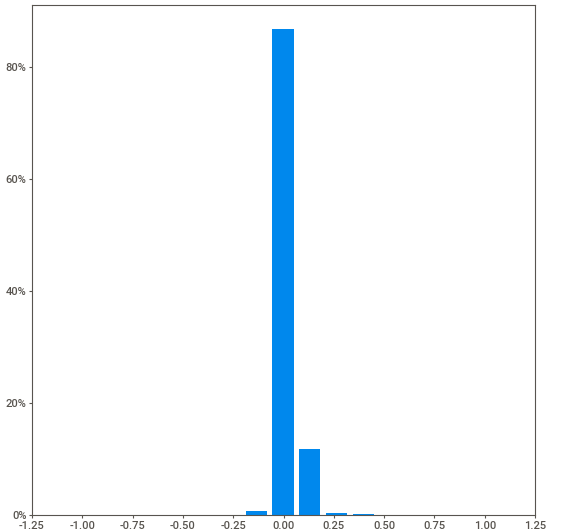
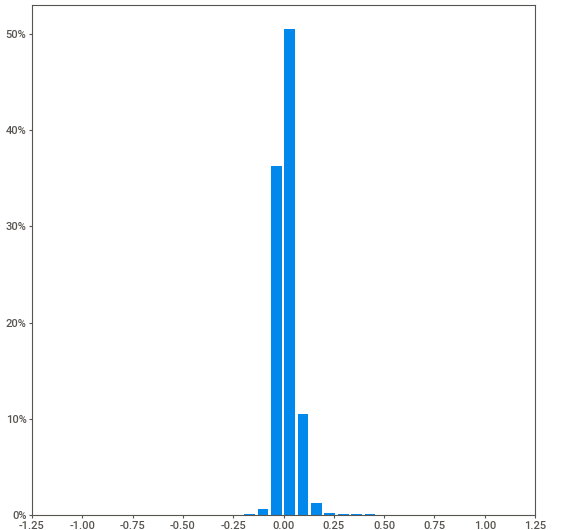
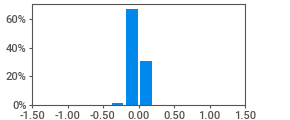
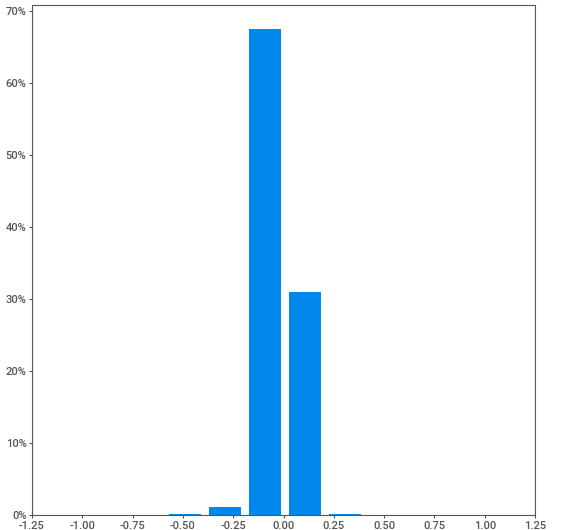
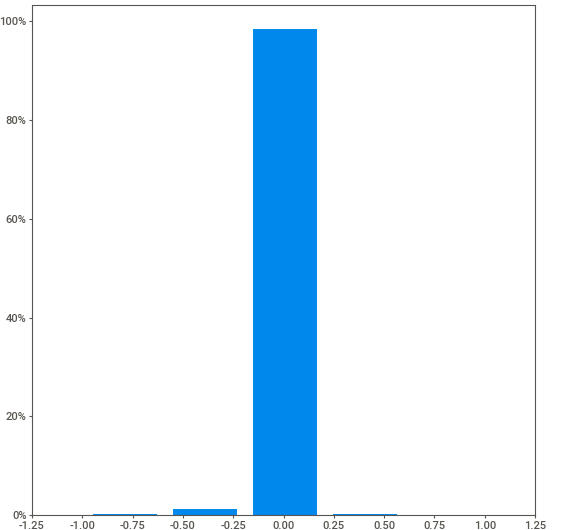
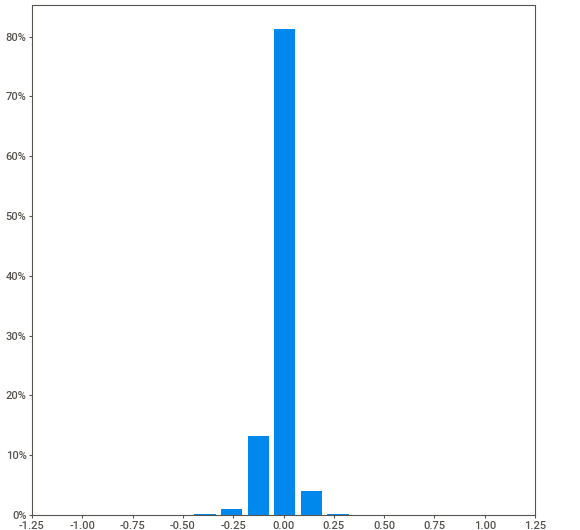
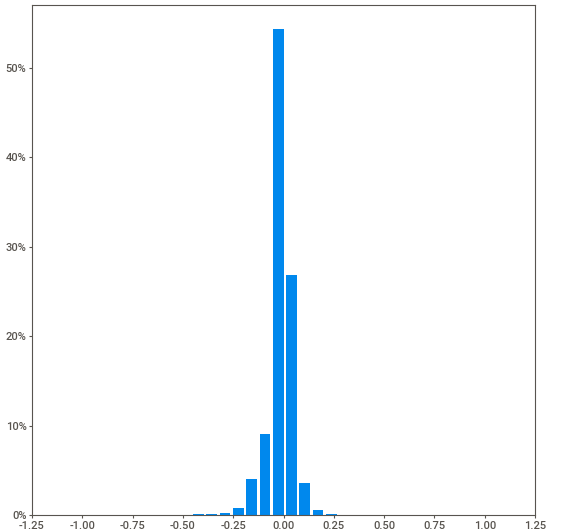
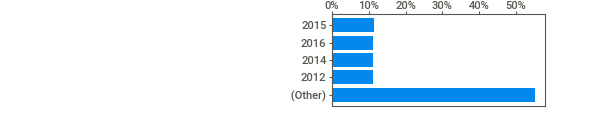
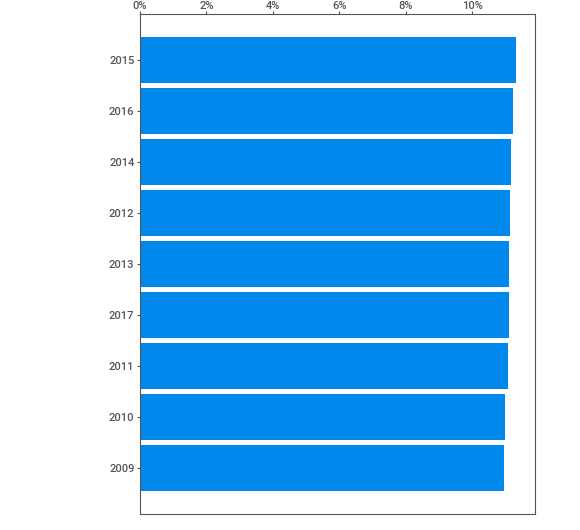
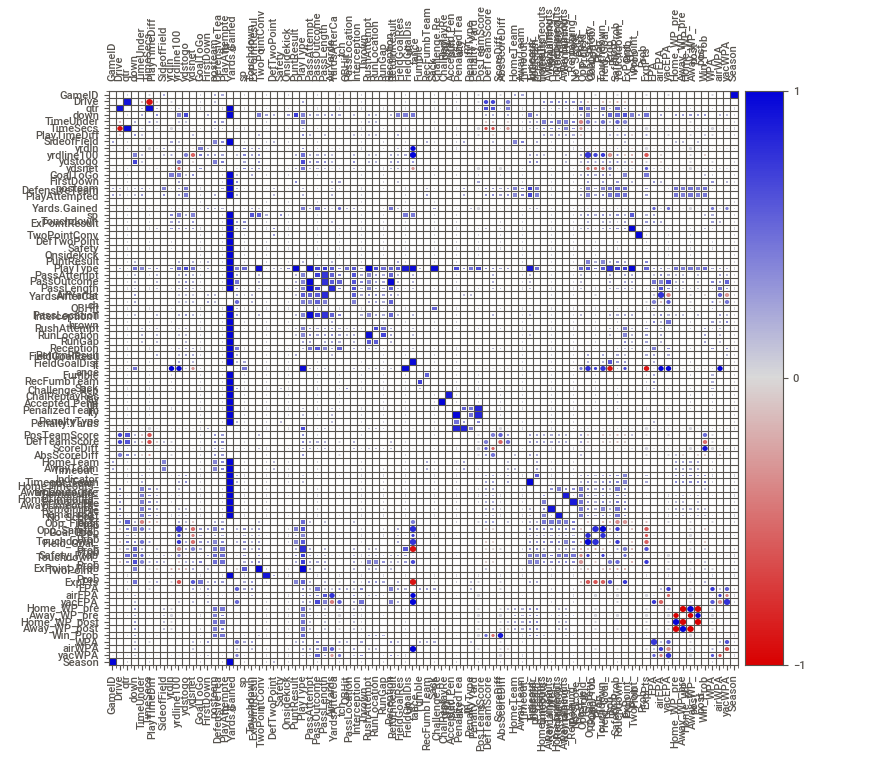
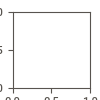

In [115]:
web = open('/content/drive/MyDrive/DS Mentorship/SWEETVIZ_REPORT.html').read()
display(HTML(web))

# Deep Dive Into Data

In [116]:
# The data has 407688 rows and 102 columns
nfl.shape

(407688, 102)

In [117]:
# So what is current dataset is about ?
# National Football League is a professional American football league , And the data we used here has all the details from year 2009 to 2017
# NFL game is against 2 teams of 11 players each (53 Players per team overall of 3 types offense , defense and special teams)
# In a 100 meter ground , If one team moves the ball to opponents end zone to make a touchdown ( 6 points ) , If ball goes over hoop 7 points
# Downs --> Series of plays where each team will try to move the ball to opponents touchdown
# To keep the ball offense must atleast move the ball 10 yards in every 4 plays
# Overall time 60 mins , with 15 mins each of quarter play , the team with most points wins the game
# we get the dataset using R package nflscrapR , Which is officially maintained by NFL

In [118]:
for col in list(nfl.columns):
  print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [119]:
# Date column in NFL mentions the date of game (Time or timezone not included)
# Also column data type is in object instead of datetime , 100% data present
nfl.Date

0         2009-09-10
1         2009-09-10
2         2009-09-10
3         2009-09-10
4         2009-09-10
             ...    
407683    2017-12-31
407684    2017-12-31
407685    2017-12-31
407686    2017-12-31
407687    2017-12-31
Name: Date, Length: 407688, dtype: object

In [120]:
# GameID is 10 digit integer that is unique to games , 100% data present

nfl.GameID

0         2009091000
1         2009091000
2         2009091000
3         2009091000
4         2009091000
             ...    
407683    2017123101
407684    2017123101
407685    2017123101
407686    2017123101
407687    2017123101
Name: GameID, Length: 407688, dtype: int64

In [121]:
# Drive --> What a team does with the football while it is in their possesion , 100% data present
# Values are between 1 and 35
# Drive is important feature to predict DefTeamScore and PosTeamScore

nfl.Drive

0          1
1          1
2          1
3          1
4          1
          ..
407683    29
407684    29
407685    29
407686    30
407687    30
Name: Drive, Length: 407688, dtype: int64

In [122]:
# The game is completed in 4 quarters (15 minutes each), So “5th Quarter” is to extend the game-day experience 
# by offering fans things to do and an opportunity to avoid traffic jams outside stadiums. 100% data present.
# qtr is important feature to predict PlayAttempted


nfl.qtr

0         1
1         1
2         1
3         1
4         1
         ..
407683    4
407684    4
407685    4
407686    4
407687    4
Name: qtr, Length: 407688, dtype: int64

In [123]:
# Downs --> Series of plays where each team will try to move the ball to opponents touchdown
# It has 1.0 , 2.0 , 3.0 and 4.0 as unique values , down provide information on PlayAttempted and PuntResult
# Down has high correlation with ydstogo and Touchdown_Prob
# 15% data missing
nfl.down

0         NaN
1         1.0
2         2.0
3         3.0
4         4.0
         ... 
407683    NaN
407684    3.0
407685    4.0
407686    1.0
407687    NaN
Name: down, Length: 407688, dtype: float64

In [124]:
# time has time in minutes:seconds , Missing data = <1%
# it differs from 00:00 to 15:00 , That is understandable because each quarter is 15 minutes
nfl.time

0         15:00
1         14:53
2         14:16
3         13:35
4         13:27
          ...  
407683    00:28
407684    00:28
407685    00:24
407686    00:14
407687    00:00
Name: time, Length: 407688, dtype: object

In [125]:
# Values are between 0 to 15 , Missing Data = <1%
# Gives more information on Safety_Prob column
nfl.TimeUnder

0         15
1         15
2         15
3         14
4         14
          ..
407683     1
407684     1
407685     1
407686     1
407687     0
Name: TimeUnder, Length: 407688, dtype: int64

In [126]:
# Overall game time is 60 min right ? this column provides time in seconds
# Missing data = < 1% , Some data is in negative format , We have to check the actual game time in TimeUnder and change it accordingly
# Have high negative correlation with Drive and high positive correlation with qtr
nfl.TimeSecs

0         3600.0
1         3593.0
2         3556.0
3         3515.0
4         3507.0
           ...  
407683      28.0
407684      28.0
407685      24.0
407686      14.0
407687       0.0
Name: TimeSecs, Length: 407688, dtype: float64

In [127]:
# Values are between 0 to 943 , Seems outliers are there in data because IQR is 32
# Missing data = < 1% ,
nfl.PlayTimeDiff

0          0.0
1          7.0
2         37.0
3         41.0
4          8.0
          ... 
407683     4.0
407684     0.0
407685     4.0
407686    10.0
407687    14.0
Name: PlayTimeDiff, Length: 407688, dtype: float64

In [128]:
# SideofField explains Team name , Example MIA here means Miami Dolphins
# It is in object data type , but actually it is categorical data
# SideofField provides info on PlayAttempted and has 0.2 correlation with yrdln

nfl.SideofField

0         TEN
1         PIT
2         PIT
3         PIT
4         PIT
         ... 
407683    BAL
407684    BAL
407685    BAL
407686    BAL
407687    BAL
Name: SideofField, Length: 407688, dtype: object

In [129]:
# Min : 1.0 , Max : 50 , In a 100 yard game field , this feature explains how much yardline crossed during play
# Has 1.0 correlation with FieldGoalDistance and 0.4 correlation with GoalToGo , Missing data = <1%
nfl.yrdln

0         30.0
1         42.0
2         47.0
3         44.0
4         44.0
          ... 
407683    32.0
407684    23.0
407685    23.0
407686    36.0
407687    36.0
Name: yrdln, Length: 407688, dtype: float64

In [130]:
# Min : 1.0 , Max : 99.0 , In a 100 yard game field , this feature explains how much yardline100 crossed during play
# Has 1.0 correlation with FieldGoalDistance and 0.46 correlation with PlayType , Missing data = <1%
nfl.yrdline100

0         30.0
1         58.0
2         53.0
3         56.0
4         56.0
          ... 
407683    32.0
407684    77.0
407685    77.0
407686    36.0
407687    36.0
Name: yrdline100, Length: 407688, dtype: float64

In [131]:
# this feature explains how much distance we have to go to reach Down
# Has high correlation with down and PlayType
nfl.ydstogo

0          0
1         10
2          5
3          8
4          8
          ..
407683     0
407684    14
407685    14
407686    10
407687     0
Name: ydstogo, Length: 407688, dtype: int64

In [132]:
# This feature explains net distance we need to reach to get a goal
# some data is -ve so need to check distance to go feature and change accordingly
# High +ve correlation with PlayType
nfl.ydsnet

0         0
1         5
2         2
3         2
4         2
         ..
407683   -4
407684   -4
407685    9
407686   -1
407687   -1
Name: ydsnet, Length: 407688, dtype: int64

In [133]:
# This feature explains if we got a goal or not , So it has either 0 or 1
nfl.GoalToGo

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
407683    0.0
407684    0.0
407685    0.0
407686    0.0
407687    0.0
Name: GoalToGo, Length: 407688, dtype: float64

In [134]:
# FirstDown means the first of four consecutive plays during which an offensive team must advance the ball 
# at least ten yards to retain possession of ball , this feature explains if offensive team got possesion of ball 
# 1 --> got possesion , 0 --> not
nfl.FirstDown

0         NaN
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
407683    0.0
407684    0.0
407685    1.0
407686    0.0
407687    0.0
Name: FirstDown, Length: 407688, dtype: float64

In [135]:
#  posteam explains Team postion name , Example MIA here means Miami Dolphins , Missing data = 6%
nfl.posteam

0         PIT
1         PIT
2         PIT
3         PIT
4         PIT
         ... 
407683    NaN
407684    BAL
407685    BAL
407686    CIN
407687    CIN
Name: posteam, Length: 407688, dtype: object

In [136]:
#  DefensiveTeam explains Defensive Team name , Example MIA here means Miami Dolphins , Missing data = 6%
nfl.DefensiveTeam

0         TEN
1         TEN
2         TEN
3         TEN
4         TEN
         ... 
407683    NaN
407684    CIN
407685    CIN
407686    BAL
407687    BAL
Name: DefensiveTeam, Length: 407688, dtype: object

In [137]:
# this feature is text description of that current row , It can be used as commentary / give us an idea of what happened during the time
nfl.desc

0         R.Bironas kicks 67 yards from TEN 30 to PIT 3....
1         (14:53) B.Roethlisberger pass short left to H....
2         (14:16) W.Parker right end to PIT 44 for -3 ya...
3         (13:35) (Shotgun) B.Roethlisberger pass incomp...
4         (13:27) (Punt formation) D.Sepulveda punts 54 ...
                                ...                        
407683                          Timeout #1 by BAL at 00:28.
407684    (:28) (Shotgun) J.Flacco pass incomplete short...
407685    (:24) (Shotgun) J.Flacco pass short middle to ...
407686        (:14) A.Dalton kneels to BAL 37 for -1 yards.
407687                                             END GAME
Name: desc, Length: 407688, dtype: object

In [138]:
# Explains if Play is attened by teams , all have 1 as value

nfl.PlayAttempted

0         1
1         1
2         1
3         1
4         1
         ..
407683    1
407684    1
407685    1
407686    1
407687    1
Name: PlayAttempted, Length: 407688, dtype: int64

In [139]:
# Explains how much yards the team gained / lost (mentioned in -ve values)
nfl['Yards.Gained']

0         39
1          5
2         -3
3          0
4          0
          ..
407683     0
407684     0
407685    13
407686    -1
407687     0
Name: Yards.Gained, Length: 407688, dtype: int64

In [140]:
# categorical column of either 0 or 1
nfl.sp

0         0
1         0
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    0
407686    0
407687    0
Name: sp, Length: 407688, dtype: int64

In [141]:
# If 1 means team made a touch down , 0 if not , Each normal touch down has 6 points
nfl.Touchdown

0         0
1         0
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    0
407686    0
407687    0
Name: Touchdown, Length: 407688, dtype: int64

In [142]:
# 4 categories of Made , missed , blocked , aborted on point result of NFL
# More than 98% data missing

nfl.ExPointResult

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
407683    NaN
407684    NaN
407685    NaN
407686    NaN
407687    NaN
Name: ExPointResult, Length: 407688, dtype: object

In [143]:
# Tells if a two point conversion is failure / success
# more than 99% data missing
nfl.TwoPointConv

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
407683    NaN
407684    NaN
407685    NaN
407686    NaN
407687    NaN
Name: TwoPointConv, Length: 407688, dtype: object

In [144]:
# Tells if a def two point is failure / success
# more than 99% data missing
nfl.DefTwoPoint

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
407683    NaN
407684    NaN
407685    NaN
407686    NaN
407687    NaN
Name: DefTwoPoint, Length: 407688, dtype: object

In [145]:
# If a player of the team which intercepts, catches, or recovers the ball commits a live-ball foul in the end zone, it is a safety.
# It's values are either 0 or 1 based on failure / success of Safety
nfl.Safety

0         0
1         0
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    0
407686    0
407687    0
Name: Safety, Length: 407688, dtype: int64

In [146]:
# tells about failure / success of on side kick in NFL (0--> failure , 1--> success)
nfl.Onsidekick

0         0
1         0
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    0
407686    0
407687    0
Name: Onsidekick, Length: 407688, dtype: int64

In [147]:
# Punt --> Whether ball is out of bounds or player carrying ball is out of bounds or player carrying ball is downed
# tells if punt is clean or blocked
# >95% missing data
nfl.PuntResult

0           NaN
1           NaN
2           NaN
3           NaN
4         Clean
          ...  
407683      NaN
407684      NaN
407685      NaN
407686      NaN
407687      NaN
Name: PuntResult, Length: 407688, dtype: object

In [148]:
  # explains type of play like run ,punt etc
  nfl.PlayType

0             Kickoff
1                Pass
2                 Run
3                Pass
4                Punt
             ...     
407683        Timeout
407684           Pass
407685           Pass
407686       QB Kneel
407687    End of Game
Name: PlayType, Length: 407688, dtype: object

In [149]:
# Tells name of passer who passes ball
nfl.Passer

0                      NaN
1         B.Roethlisberger
2                      NaN
3         B.Roethlisberger
4                      NaN
                ...       
407683                 NaN
407684            J.Flacco
407685            J.Flacco
407686                 NaN
407687                 NaN
Name: Passer, Length: 407688, dtype: object

In [150]:
# Tells ID of passer who passes ball
nfl.Passer_ID

0               None
1         00-0022924
2               None
3         00-0022924
4               None
             ...    
407683          None
407684    00-0026158
407685    00-0026158
407686          None
407687          None
Name: Passer_ID, Length: 407688, dtype: object

In [151]:
# Tells if a pass attempt is a success or failure
nfl.PassAttempt

0         0
1         1
2         0
3         1
4         0
         ..
407683    0
407684    1
407685    1
407686    0
407687    0
Name: PassAttempt, Length: 407688, dtype: int64

In [152]:
# Tells if a pass outcome is a complete or incomplete
nfl.PassOutcome

0                     NaN
1                Complete
2                     NaN
3         Incomplete Pass
4                     NaN
               ...       
407683                NaN
407684    Incomplete Pass
407685           Complete
407686                NaN
407687                NaN
Name: PassOutcome, Length: 407688, dtype: object

In [153]:
# Tells if Pass length is Short / deep
nfl.PassLength

0           NaN
1         Short
2           NaN
3          Deep
4           NaN
          ...  
407683      NaN
407684    Short
407685    Short
407686      NaN
407687      NaN
Name: PassLength, Length: 407688, dtype: object

In [154]:
# how many yards the football travels in the air
nfl.AirYards

0          0
1         -3
2          0
3         34
4          0
          ..
407683     0
407684    12
407685    10
407686     0
407687     0
Name: AirYards, Length: 407688, dtype: int64

In [155]:
# How much yards player move after catching ball
nfl.YardsAfterCatch

0         0
1         8
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    3
407686    0
407687    0
Name: YardsAfterCatch, Length: 407688, dtype: int64

In [156]:
# Tells if Quarterback is hit or not
nfl.QBHit

0         0
1         0
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    0
407686    0
407687    0
Name: QBHit, Length: 407688, dtype: int64

In [157]:
# if ball is getting passed to right / left / middle , >59% missing data
nfl.PassLocation

0            NaN
1           left
2            NaN
3          right
4            NaN
           ...  
407683       NaN
407684    middle
407685    middle
407686       NaN
407687       NaN
Name: PassLocation, Length: 407688, dtype: object

In [158]:
# If thrown ball is intercepted or not
nfl.InterceptionThrown

0         0
1         0
2         0
3         0
4         0
         ..
407683    0
407684    0
407685    0
407686    0
407687    0
Name: InterceptionThrown, Length: 407688, dtype: int64

In [159]:
# Who intercepted the ball ,  >99% Missing data
nfl.Interceptor

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
407683    NaN
407684    NaN
407685    NaN
407686    NaN
407687    NaN
Name: Interceptor, Length: 407688, dtype: object

In [160]:
# Player name who rushes to touch down
nfl.Rusher

0              NaN
1              NaN
2         W.Parker
3              NaN
4              NaN
            ...   
407683         NaN
407684         NaN
407685         NaN
407686         NaN
407687         NaN
Name: Rusher, Length: 407688, dtype: object

In [161]:
# Similarly there are totally 102 features , Now let me build a model based on correlations of data

In [162]:
# Predicting QBHit which tells if Quarterback is hit or not
qb_hit = nfl[nfl.QBHit == 1]

In [163]:
qb_not_hit = nfl[nfl.QBHit == 0]

In [164]:
qb_hit.shape

(21639, 102)

In [165]:
qb_not_hit = qb_not_hit.head(21639)

In [166]:
# Maing sure if hit and not hit have same number of values so it avoids bias

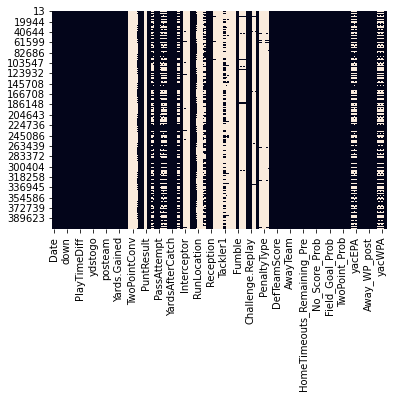

In [167]:
%matplotlib inline
plt.figure()
sns.heatmap(qb_hit.isnull(), cbar=False)
plt.show()

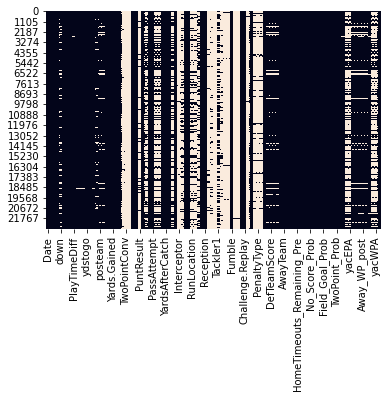

In [168]:
%matplotlib inline
plt.figure()
sns.heatmap(qb_not_hit.isnull(), cbar=False)
plt.show()

In [169]:
# Check percentage of missing data
missing_values = qb_hit.isnull().sum().sum()
total_cell = np.product(qb_hit.shape)

missing_percentage = (missing_values / total_cell) * 100
print('qb_hit missing percentage : ' , missing_percentage)

qb_hit missing percentage :  23.85725120493227


In [170]:
# Check percentage of missing data
missing_values = qb_not_hit.isnull().sum().sum()
total_cell = np.product(qb_not_hit.shape)

missing_percentage = (missing_values / total_cell) * 100
print('qb_not_hit missing percentage : ' , missing_percentage)

qb_not_hit missing percentage :  25.044513854342515


In [171]:
qb_not_hit.TwoPointConv.isnull().sum()

21610

In [172]:
# finding 50%
21610 * 50 / 100

10805.0

In [173]:
# Dropping columns from df where missing values exceeds 50% 

In [174]:
def drop_50(df):
  for column in df.columns:
    if df[column].isnull().sum() >= 10805:
      df = df.drop(column , axis = 1)
  
  return df

In [175]:
test = drop_50(qb_not_hit)

In [176]:
test.shape

(21639, 73)

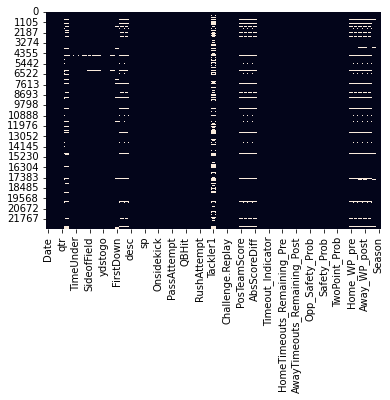

In [177]:
%matplotlib inline
plt.figure()
sns.heatmap(test.isnull(), cbar=False)
plt.show()

In [178]:
test_qb_not_hit = drop_50(qb_not_hit)
test_qb_hit = drop_50(qb_hit)

In [179]:
# Interpolate
qb_not = test_qb_not_hit.interpolate(method = 'linear' , limit_direction ='forward')
qb_hit = test_qb_hit.interpolate(method = 'linear' , limit_direction ='forward')

In [180]:
# Interpolate
qb_not = qb_not.ffill(axis = 1)
qb_hit = qb_hit.ffill(axis = 1)

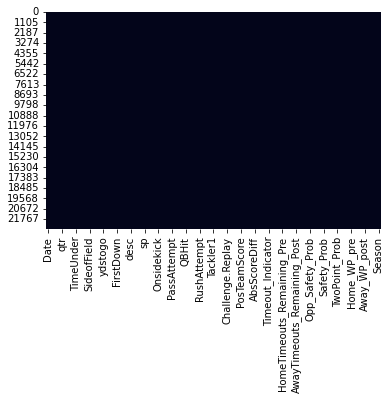

In [181]:
%matplotlib inline
plt.figure()
sns.heatmap(qb_not.isnull(), cbar=False)
plt.show()

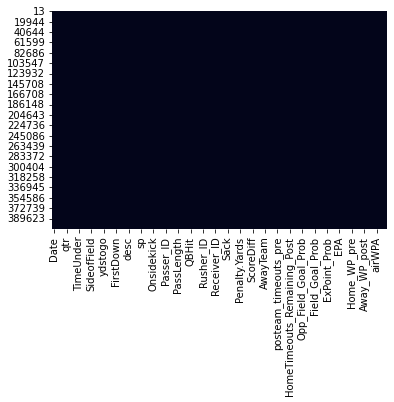

In [182]:
%matplotlib inline
plt.figure()
sns.heatmap(qb_hit.isnull(), cbar=False)
plt.show()

In [183]:
df = pd.concat([qb_not , qb_hit])
df.head()

Date      GameID Drive qtr down   time TimeUnder TimeSecs  \
0  2009-09-10  2009091000     1   1    1  15:00        15     3600   
1  2009-09-10  2009091000     1   1    1  14:53        15     3593   
2  2009-09-10  2009091000     1   1    2  14:16        15     3556   
3  2009-09-10  2009091000     1   1    3  13:35        14     3515   
4  2009-09-10  2009091000     1   1    4  13:27        14     3507   

  PlayTimeDiff SideofField  ... Season Passer PassOutcome PassLength  \
0            0         TEN  ...   2009    NaN         NaN        NaN   
1            7         PIT  ...   2009    NaN         NaN        NaN   
2           37         PIT  ...   2009    NaN         NaN        NaN   
3           41         PIT  ...   2009    NaN         NaN        NaN   
4            8         PIT  ...   2009    NaN         NaN        NaN   

  PassLocation Receiver airEPA yacEPA airWPA yacWPA  
0          NaN      NaN    NaN    NaN    NaN    NaN  
1          NaN      NaN    NaN    NaN    NaN    NaN  
2          NaN      NaN    NaN    NaN    NaN    NaN  
3          NaN      NaN    NaN    NaN    NaN    NaN  
4          NaN      NaN    NaN    NaN    NaN    NaN  

[5 rows x 82 columns]

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43278 entries, 0 to 407682
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         43278 non-null  object
 1   GameID                       43278 non-null  object
 2   Drive                        43278 non-null  object
 3   qtr                          43278 non-null  object
 4   down                         43278 non-null  object
 5   time                         43278 non-null  object
 6   TimeUnder                    43278 non-null  object
 7   TimeSecs                     43278 non-null  object
 8   PlayTimeDiff                 43278 non-null  object
 9   SideofField                  43278 non-null  object
 10  yrdln                        43278 non-null  object
 11  yrdline100                   43278 non-null  object
 12  ydstogo                      43278 non-null  object
 13  ydsnet                       4

In [185]:
df = drop_50(df)

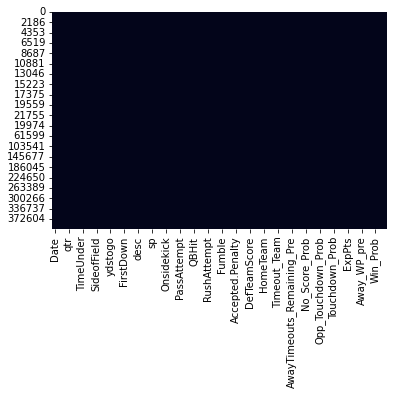

In [186]:
%matplotlib inline
plt.figure()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [187]:
df.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'Passer_ID',
       'PassAttempt', 'AirYards', 'YardsAfterCatch', 'QBHit',
       'InterceptionThrown', 'Rusher_ID', 'RushAttempt', 'Receiver_ID',
       'Reception', 'Fumble', 'Sack', 'Challenge.Replay', 'Accepted.Penalty',
       'Penalty.Yards', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff',
       'AbsScoreDiff', 'HomeTeam', 'AwayTeam', 'Timeout_Indicator',
       'Timeout_Team', 'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre',
       'AwayTimeouts_Remaining_Pre', 'HomeTimeouts_Remaining_Post',
       'AwayTimeouts_Remaining_Post', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob',
       'Safety

In [188]:
# Adding the columns which give more information about QBHit , Got column names from EDA

In [189]:
data = {
    'play_type' : df['PlayType'] ,
    'sack' : df['Sack'] ,
    'down' : df['down'] , 
    'qbhit' : df['QBHit']
}

In [190]:
feature_engineered_df = pd.concat(data , axis = 1)
feature_engineered_df.head()

play_type sack down qbhit
0   Kickoff    0    1     0
1      Pass    0    1     0
2       Run    0    2     0
3      Pass    0    3     0
4      Punt    0    4     0

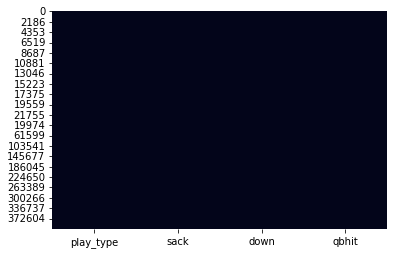

In [191]:
%matplotlib inline
plt.figure()
sns.heatmap(feature_engineered_df.isnull(), cbar=False)
plt.show()

In [192]:
feature_engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43278 entries, 0 to 407682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   play_type  43278 non-null  object
 1   sack       43278 non-null  object
 2   down       43278 non-null  object
 3   qbhit      43278 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [193]:
feature_engineered_df.play_type = feature_engineered_df.play_type.astype('category')

In [194]:
feature_engineered_df.sack = feature_engineered_df.sack.astype('int')

In [195]:
feature_engineered_df.down = feature_engineered_df.down.astype('category')

In [196]:
feature_engineered_df.qbhit = feature_engineered_df.qbhit.astype('category')

In [197]:
X = feature_engineered_df.drop('qbhit' , axis = 1)
X = pd.get_dummies(X)
X.head()

sack  play_type_End of Game  play_type_Extra Point  play_type_Field Goal  \
0     0                      0                      0                     0   
1     0                      0                      0                     0   
2     0                      0                      0                     0   
3     0                      0                      0                     0   
4     0                      0                      0                     0   

   play_type_Half End  play_type_Kickoff  play_type_No Play  play_type_Pass  \
0                   0                  1                  0               0   
1                   0                  0                  0               1   
2                   0                  0                  0               0   
3                   0                  0                  0               1   
4                   0                  0                  0               0   

   play_type_Punt  play_type_QB Kneel  ...  down_2.666666666666667  down_2.75  \
0               0                   0  ...                       0          0   
1               0                   0  ...                       0          0   
2               0                   0  ...                       0          0   
3               0                   0  ...                       0          0   
4               1                   0  ...                       0          0   

   down_3.0  down_3.25  down_3.333333333333333  down_3.3333333333333335  \
0         0          0                       0                        0   
1         0          0                       0                        0   
2         0          0                       0                        0   
3         1          0                       0                        0   
4         0          0                       0                        0   

   down_3.5  down_3.6666666666666665  down_3.75  down_4.0  
0         0                        0          0         0  
1         0                        0          0         0  
2         0                        0          0         0  
3         0                        0          0         0  
4         0                        0          0         1  

[5 rows x 49 columns]

In [198]:
y = feature_engineered_df.qbhit
y.head()

0    0
1    0
2    0
3    0
4    0
Name: qbhit, dtype: category
Categories (2, int64): [0, 1]

In [199]:
from sklearn.model_selection import train_test_split
# Splitting into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [200]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [201]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , y_pred))

[[4459 2674]
 [   4 7145]]


In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8124912477244084

In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      7133
           1       0.73      1.00      0.84      7149

    accuracy                           0.81     14282
   macro avg       0.86      0.81      0.81     14282
weighted avg       0.86      0.81      0.81     14282



In [204]:
# Classification model has 80% accuracy and other metrics also seem good

In [205]:
# Saving Classical ML Model
from joblib import dump
dump(model , 'TouchDownPredictionModel.joblib')

['TouchDownPredictionModel.joblib']